## Group Members

Group 35: Our Group is composed by:

  - Filipe Ferreira -20240741
  - Helena Duarte- 20240530
  - Iris Moreira-20240659
  - João Freire-20240528
  - Osmainy Raimundo-e20191506



## Metadata

- *Accident Date* - Injury date of the claim. 
- *Age at Injury* - Age of injured worker when the injury occurred.
- *Alternative Dispute Resolution* - Adjudication processes external to the Board.
- *Assembly Date* - The date the claim was first assembled.
- *Attorney/Representative* - Is the claim being represented by an Attorney?
- *Average Weekly Wage*  - The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits.
- *Birth Year* - The reported year of birth
- of the injured worker.
- *C-2 Date* - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- *C-3 Date* -  Date Form C-3 (Employee Claim Form) was received.
- *Carrier Name* - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
- *Carrier Type* - Type of primary insurance provider responsible for providing workers’ compensation coverage.
- *Claim Identifier* - Unique identifier for each claim, assigned by WCB
- *County of Injury* - Name of the New York County where the injury occurred.
- *COVID-19 Indicator* - Indication that the claim may be associated with COVID-19.
- *District Name* - Name of the WCB district office that oversees claims for that region or area of the state.
- *First Hearing Date* - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.
- *Gender* - The reported gender of the injured worker.
- *IME-4 Count* - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.
- *Industry Code* - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.
- *Industry Code Description* - 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- *Medical Fee Region* - Approximate region where the injured worker would receive medical service.
  
- *OIICS Nature of Injury Description* - The OIICS nature of injury codes & descriptions are available at bls.gov/iif/oiics_manual_2007.pemployees_train .
- *WCIO Cause of Injury Code* - The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pemployees_train .
- *WCIO Cause of Injury Description* - See description of field above.
- *WCIO Nature of Injury Code* -The WCIO nature of injury are available at https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?TreeType=BodyPart
- *WCIO Nature of Injury Description* - See description of field above.
- *WCIO Part Of Body Code* - The WCIO part of body codes & descriptions are available at https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?TreeType=BodyPart
- *WCIO Part Of Body Description* - See description of field above.
- *Zip Code* - The reported ZIP code of the injured worker’s home address.
- *Agreement Reached* - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.
- *WCB Decision* - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.
- <strong> *Claim Injury Type* - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity. </strong>




<div class="alert alert-block alert-info">

# Table of Contents
- [1. Importing the necessary libraries](#1)<br>
- [2. Data Exploration](#2)<br>
    - [2.1 Missing Values](#2.1) <br>
    - [2.2 In-depth Exploration](#2.2) <br>
- [3. Data Exporting](#3)


    
</div>

# Import the libraries

In [1]:
#Basic libraries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from itertools import combinations
from math import ceil

#Exploratory Data Analysis
import scipy.stats as stats
import pgeocode


#Data Pre-Processing
import calendar
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# encoders
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Extras
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [2]:
#Importing the train data into a variable employees_train
employees_train=pd.read_csv('../Data/employees_train_eda.csv', index_col="Claim Identifier")
#importing the test data into a variable employees_test
employees_test=pd.read_csv('../Data/employees_test_eda.csv', index_col="Claim Identifier")

### Changes Made in the EDA Notebook

In [3]:
employees_train["Accident Date"] = employees_train["Accident Date"].astype("datetime64[ms]")

employees_train["Age at Injury"] = pd.to_numeric(employees_train["Age at Injury"], errors="coerce").astype("Int64")

employees_train["Assembly Date"] = employees_train["Assembly Date"].astype("datetime64[ms]")

employees_train["Attorney/Representative"]= employees_train["Attorney/Representative"].astype("Int64")

employees_train["Birth Year"]  = pd.to_numeric(employees_train["Birth Year"], errors="coerce").astype("Int64")

employees_train["C-2 Date"] = employees_train["C-2 Date"].astype("datetime64[ms]")

employees_train["C-3 Date"] = employees_train["C-3 Date"].astype("datetime64[ms]")

employees_train["COVID-19 Indicator"]= employees_train["COVID-19 Indicator"].astype("Int64")

employees_train["First Hearing Date"] = employees_train["First Hearing Date"].astype("datetime64[ms]")

employees_train["IME-4 Count"]  = pd.to_numeric(employees_train["IME-4 Count"], errors="coerce").astype("Int64")

employees_train["Industry Code"] = employees_train["Industry Code"].astype("object")

employees_train["WCIO Cause of Injury Code"] = employees_train["WCIO Cause of Injury Code"].astype("object")

employees_train["WCIO Nature of Injury Code"] = employees_train["WCIO Nature of Injury Code"].astype("object")

employees_train["WCIO Part Of Body Code"] = employees_train["WCIO Part Of Body Code"].astype("object")

employees_train["Zip Code"] = employees_train["Zip Code"].astype("string")

employees_train["Number of Dependents"] = employees_train["Number of Dependents"].astype("Int64")

In [4]:
employees_test["Accident Date"] = employees_test["Accident Date"].astype("datetime64[ms]")

employees_test["Age at Injury"] = pd.to_numeric(employees_test["Age at Injury"], errors="coerce").astype("Int64")

employees_test["Assembly Date"] = employees_test["Assembly Date"].astype("datetime64[ms]")

employees_test["Attorney/Representative"]= employees_test["Attorney/Representative"].astype("Int64")

employees_test["Birth Year"]  = pd.to_numeric(employees_test["Birth Year"], errors="coerce").astype("Int64")

employees_test["C-2 Date"] = employees_test["C-2 Date"].astype("datetime64[ms]")

employees_test["C-3 Date"] = employees_test["C-3 Date"].astype("datetime64[ms]")


employees_test["COVID-19 Indicator"]= employees_test["COVID-19 Indicator"].astype("Int64")

employees_test["First Hearing Date"] = employees_test["First Hearing Date"].astype("datetime64[ms]")

employees_test["IME-4 Count"]  = pd.to_numeric(employees_test["IME-4 Count"], errors="coerce").astype("Int64")

employees_test["Industry Code"] = employees_test["Industry Code"].astype("object")

employees_test["WCIO Cause of Injury Code"] = employees_test["WCIO Cause of Injury Code"].astype("object")

employees_test["WCIO Nature of Injury Code"] = employees_test["WCIO Nature of Injury Code"].astype("object")

employees_test["WCIO Part Of Body Code"] = employees_test["WCIO Part Of Body Code"].astype("object")

employees_test["Zip Code"] = employees_test["Zip Code"].astype("string")

employees_test["Number of Dependents"] = employees_test["Number of Dependents"].astype("Int64")

# Data Cleaning and Pre-Processing

In [5]:
def overview(data):
    column = []
    dtypes = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in data.columns:
        column.append(item) # feature name
        dtypes.append(data[item].dtype) # data type
        unique.append(len(data[item].unique())) # how many unique values in the feature
        missing.append(data[item].isna().sum()) # amount of missing values
        pc_missing.append(round((data[item].isna().sum() / len(data[item])) * 100, 2)) # percentage of missing values
    
    result = pd.DataFrame({
        'Column': column, 
        'Type': dtypes,
        'Unique': unique,
        'Missing': missing, 
        'Percentage Missing': pc_missing
    })
    
    return result

In [6]:
overview(employees_train)

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],5540,3689,0.64
1,Age at Injury,Int64,108,0,0.00
2,Alternative Dispute Resolution,object,3,0,0.00
3,Assembly Date,datetime64[ms],897,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,120025,28651,4.99
6,Birth Year,Int64,108,29078,5.07
7,C-2 Date,datetime64[ms],2476,14560,2.54
8,C-3 Date,datetime64[ms],1649,386781,67.38
9,Carrier Name,object,2046,0,0.00


## Splitting the data

In [7]:
X = employees_train.drop(['Claim Injury Type'], axis=1)
target = employees_train[['Claim Injury Type']]

In [8]:
X_train, X_val, target_train, target_val= train_test_split(X,target, test_size=0.3,
                                                 random_state=42,
                                                 stratify=target,
                                                 shuffle=True) 

In [9]:
X_train_original = X_train.copy()

In [10]:
metric_feats = ["Age at Injury", "Average Weekly Wage", "Birth Year", "Number of Dependents"]

## Substitute 0 at 'birth year' and 'age at injury' with nan

* There are claims where “Age at Injury” is “0”. 
* This is the case when the necessary information needed for this calculation is missing from the case, as said on New York's Compensation Board.

In [11]:
X_train.loc[:, 'Birth Year'] = X_train['Birth Year'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

In [12]:
X_train.loc[:, 'Age at Injury'] = X_train['Age at Injury'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

In [13]:
overview(X_train)

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],4605,2587,0.64
1,Age at Injury,Int64,105,3811,0.95
2,Alternative Dispute Resolution,object,3,0,0.00
3,Assembly Date,datetime64[ms],891,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,93455,20066,4.99
6,Birth Year,Int64,106,37855,9.42
7,C-2 Date,datetime64[ms],2141,10187,2.54
8,C-3 Date,datetime64[ms],1607,271096,67.47
9,Carrier Name,object,1969,0,0.00


**Substituting in the Validation Data**

In [14]:
X_val.loc[:, 'Birth Year'] = X_val['Birth Year'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

In [15]:
X_val.loc[:, 'Age at Injury'] = X_val['Age at Injury'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

**Substituting in the Test Data**

In [16]:
employees_test.loc[:, 'Birth Year'] = employees_test['Birth Year'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

In [17]:
employees_test.loc[:, 'Age at Injury'] = employees_test['Age at Injury'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

## Outliers Treatment

In [18]:
outlier_percentages = {}

# We know that low outliers are below Q 1 − 1.5 ⋅ IQR ‍ and high outliers are above Q 3 + 1.5 ⋅ IQR 
for column in metric_feats:
    if pd.api.types.is_numeric_dtype(X_train[column]):
        #Defining Q1 and Q3 to then find IQR 
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1
        #Getting the outliers below the first quantile and above the second quantile
        outliers = X_train[(X_train[column] < (Q1 - 1.5 * IQR)) | (X_train[column] > (Q3 + 1.5 * IQR))]
        #Getting the percentage of the outliers
        percentage_outliers = (len(outliers) / len(X_train)) * 100
        outlier_percentages[column] = percentage_outliers

#Printing the results and counting the number of columns per the percentage higher or lower than 5.
nr_col_lower_5=0
nr_col_higher_5=0
print("Percentage of outliers per column using IQR:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: \033[1;35m{percentage:.2f}%\033[0m")
    if percentage <5:
        nr_col_lower_5+=1
    if percentage >5:
        nr_col_higher_5+=1

#Printing the number of columns who have a percentage lower than 5% and then higher than 5%. 
# We chose 5% becasue it was the percentage advised during classes
print(f"From the columns, \033[1;33m{nr_col_lower_5}\033[0m have a percentage lower than 5%")
print(f"From the columns, \033[1;33m{nr_col_higher_5}\033[0m have a percentage higher than 5%")

Percentage of outliers per column using IQR:
Age at Injury: 0.04%
Average Weekly Wage: 3.86%
Birth Year: 0.05%
Number of Dependents: 0.00%
From the columns, 4 have a percentage lower than 5%
From the columns, 0 have a percentage higher than 5%


### Visualization through boxplots and histograms

In [19]:
def stats_analysis(df, columns):
    
    result = []
    
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        result.append({"Column": col,"Lower Bound": lower_bound,
                         "Min": df[col].min(),"Q1": q1,"Median": df[col].median(),
                         "IQR": iqr,"Q3": q3,"Upper Bound": upper_bound,"Max": df[col].max(),})  

    return pd.DataFrame(result)

def compute_lims(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_lim = q1 - (1.5 * iqr)
    upper_lim = q3 + (1.5 * iqr)
    return lower_lim, upper_lim

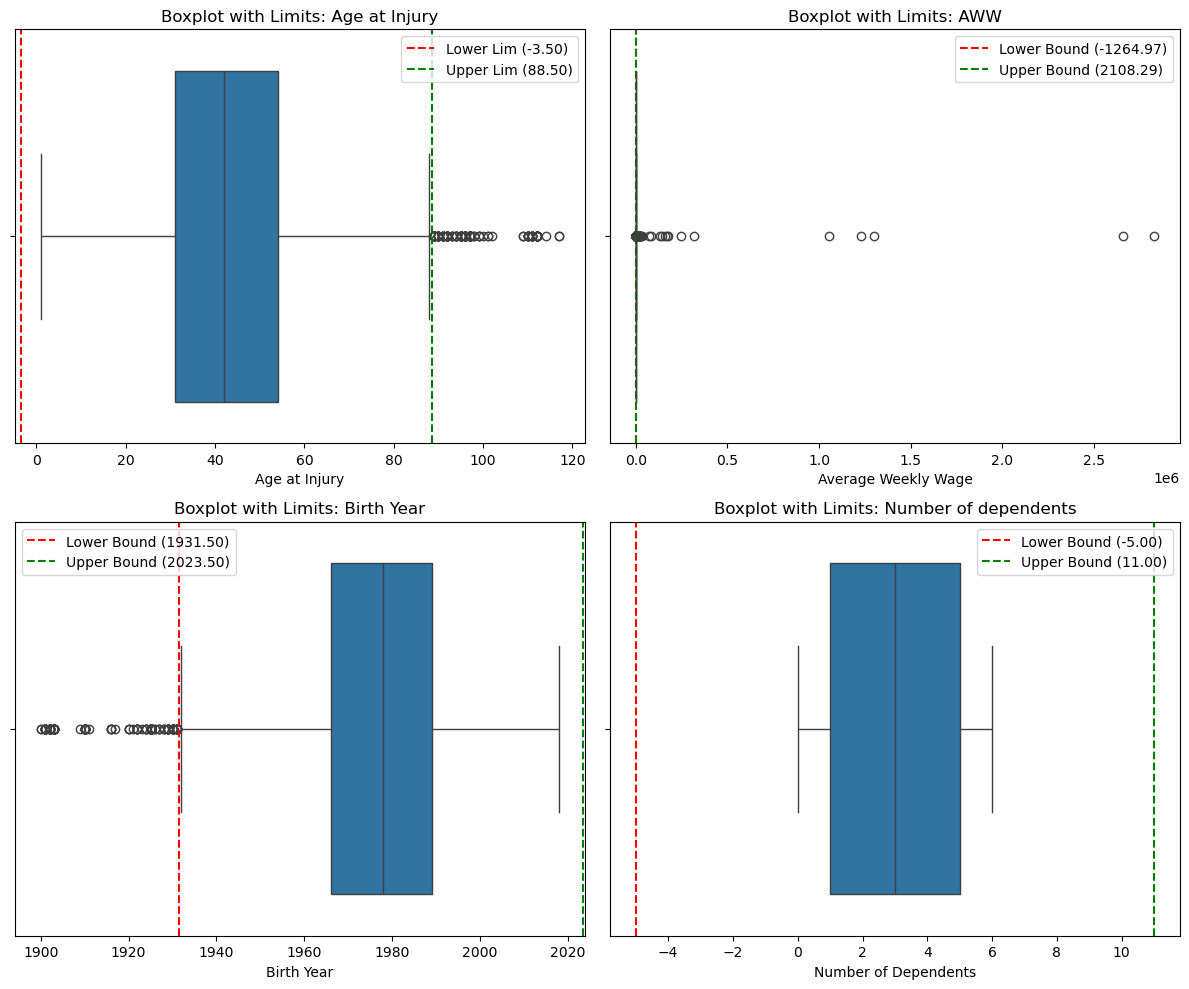

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

col_1 = "Age at Injury"
lower_lim_1, upper_bound_1 = compute_lims(X_train, col_1)
sns.boxplot(X_train, x= col_1, ax=axes[0, 0])
axes[0, 0].axvline(lower_lim_1, color='red', linestyle='--', label=f'Lower Lim ({lower_lim_1:.2f})')
axes[0, 0].axvline(upper_bound_1, color='green', linestyle='--', label=f'Upper Lim ({upper_bound_1:.2f})')
axes[0, 0].set_title("Boxplot with Limits: Age at Injury")
axes[0, 0].legend()


col_2 = "Average Weekly Wage"
lower_lim_2, upper_bound_2 = compute_lims(X_train, col_2)
sns.boxplot(X_train,  x= col_2, ax=axes[0, 1])
axes[0, 1].axvline(lower_lim_2, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_2:.2f})')
axes[0, 1].axvline(upper_bound_2, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_2:.2f})')
axes[0, 1].set_title("Boxplot with Limits: AWW")
axes[0, 1].legend()


col_3 = "Birth Year"
lower_lim_3, upper_bound_3 = compute_lims(X_train, col_3)
sns.boxplot(X_train, x=col_3, ax=axes[1, 0])
axes[1, 0].axvline(lower_lim_3, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_3:.2f})')
axes[1, 0].axvline(upper_bound_3, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_3:.2f})')
axes[1, 0].set_title("Boxplot with Limits: Birth Year")
axes[1, 0].legend()


col_4 = "Number of Dependents"
lower_lim_4, upper_bound_4 = compute_lims(X_train, col_4)
sns.boxplot(X_train, x= col_4, ax=axes[1, 1])
axes[1, 1].axvline(lower_lim_4, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_4:.2f})')
axes[1, 1].axvline(upper_bound_4, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_4:.2f})')
axes[1, 1].set_title("Boxplot with Limits: Number of dependents")
axes[1, 1].legend()

plt.savefig('outliers.png')
plt.tight_layout()
plt.show()

**`Age at Injury`**

In [21]:
pd.DataFrame(X_train["Age at Injury"].describe(percentiles=[0.05,0.95,0.99,0.995,0.999])).T

,count,mean,std,min,5%,50%,95%,99%,99.5%,99.9%,max
Age at Injury,398007.0,42.503257,13.721553,1.0,22.0,42.0,64.0,71.0,75.0,82.0,117.0


Since the upper bound is close to the 99.9% , we decided to remove by the highest value, which is the upper bound,

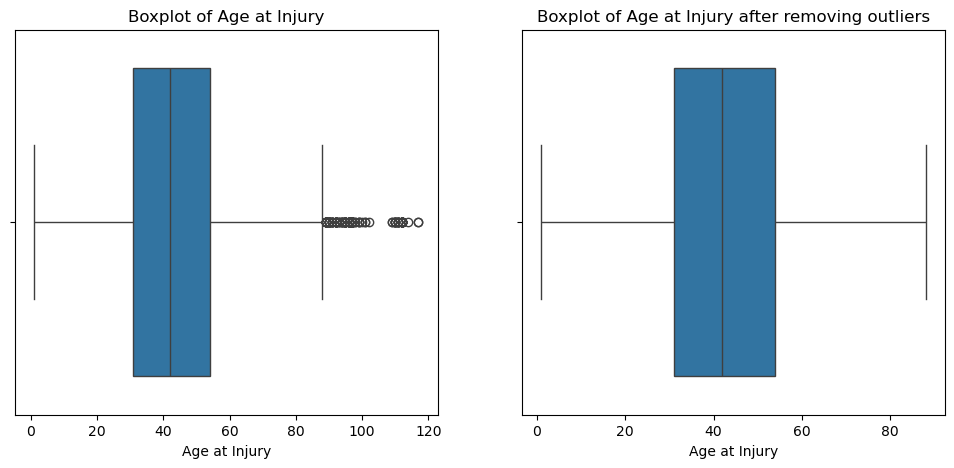

In [22]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.boxplot(X_train, x="Age at Injury", ax=axes[0])
axes[0].set_title("Boxplot of Age at Injury")

sns.boxplot(X_train[X_train["Age at Injury"] < 88.5], x="Age at Injury", ax=axes[1])
axes[1].set_title("Boxplot of Age at Injury after removing outliers")


plt.show()

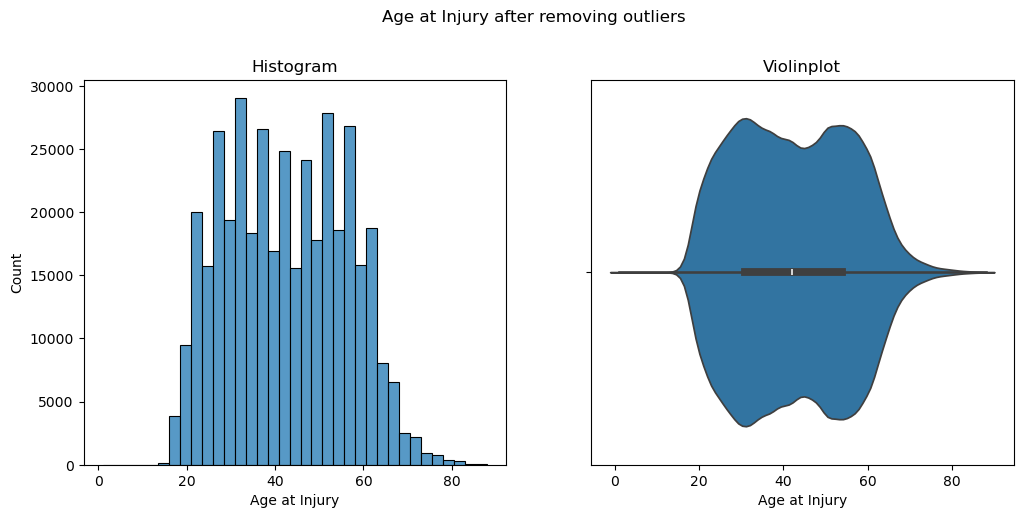

In [23]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(X_train[X_train["Age at Injury"] < 88.5], x="Age at Injury", bins=35, ax=axes[0])
axes[0].set_title("Histogram")

sns.violinplot(X_train[X_train["Age at Injury"] < 88.5], x="Age at Injury", ax=axes[1])
axes[1].set_title("Violinplot")

plt.suptitle("Age at Injury after removing outliers", y=1.02)
plt.show()

**`Average Weekly Wage`**

In [24]:
pd.DataFrame(X_train["Average Weekly Wage"].describe(percentiles=[0.05,0.95,0.99,0.995,0.999]).round(2)).T

,count,mean,std,min,5%,50%,95%,99%,99.5%,99.9%,max
Average Weekly Wage,381752.0,497.94,7216.08,0.0,0.0,0.0,1980.51,2962.41,3467.84,4752.25,2828079.0


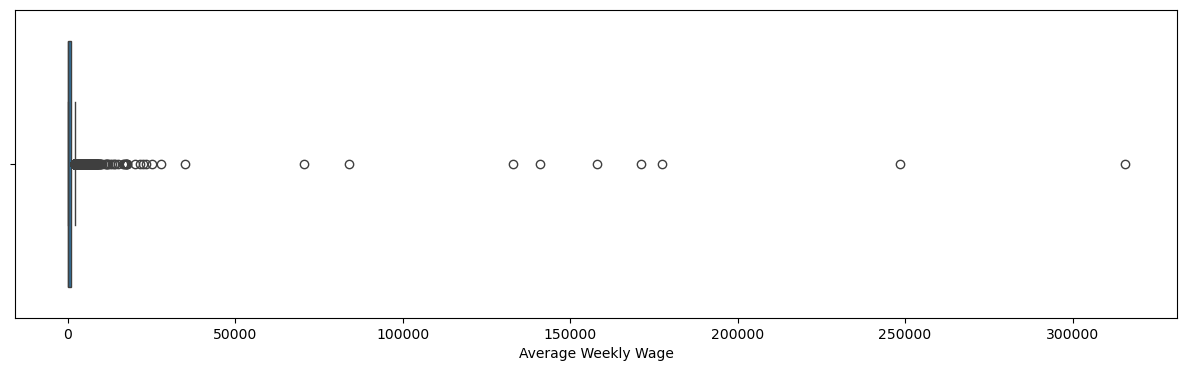

In [25]:
fig,axes=plt.subplots(figsize=(15,4))
sns.boxplot(X_train[X_train["Average Weekly Wage"] < 5e5], x="Average Weekly Wage")
plt.show()

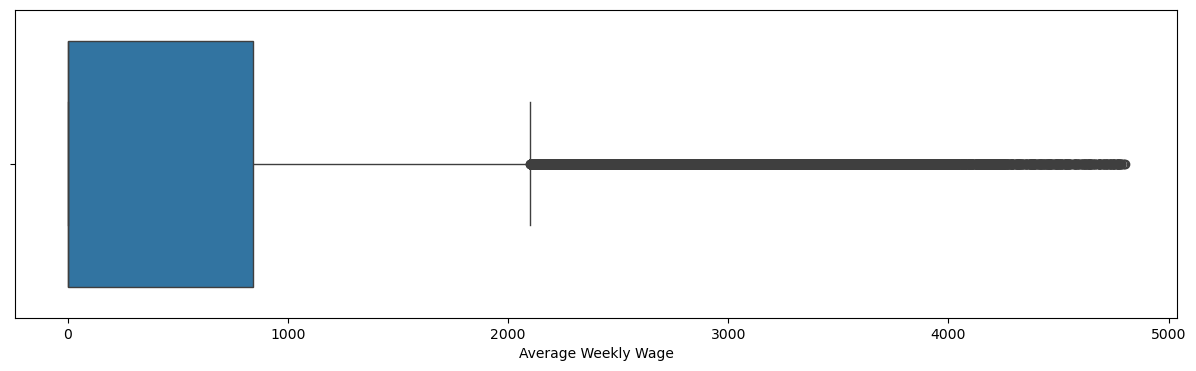

In [26]:
fig,axes=plt.subplots(figsize=(15,4))
sns.boxplot(X_train[X_train["Average Weekly Wage"] < 4800], x="Average Weekly Wage")
plt.show()

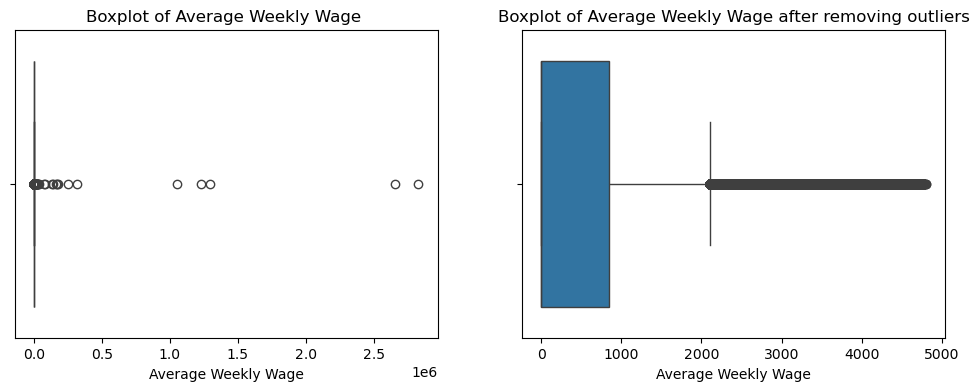

In [27]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

sns.boxplot(X_train, x= "Average Weekly Wage", ax=axes[0])
axes[0].set_title("Boxplot of Average Weekly Wage ")


sns.boxplot(X_train[(X_train["Average Weekly Wage"] < 4800)],  x= "Average Weekly Wage", ax=axes[1])
axes[1].set_title("Boxplot of Average Weekly Wage after removing outliers")


plt.show()

In [28]:
#outliers statistics
pd.DataFrame(X_train[X_train["Average Weekly Wage"] > 4800]["Average Weekly Wage"].describe()).T

,count,mean,std,min,25%,50%,75%,max
Average Weekly Wage,359.0,35740.887688,231761.673724,4802.09,5000.0,5362.4,6584.27,2828079.0


**`Birth Year`**

In [29]:
pd.DataFrame(X_train["Birth Year"].describe(percentiles=[0.001,0.01,0.05,0.1])).T

,count,mean,std,min,0.1%,1%,5%,10%,50%,max
Birth Year,363963.0,1977.80884,13.845447,1900.0,1937.0,1949.0,1956.0,1960.0,1978.0,2018.0


In [30]:
stats_analysis(X_train,["Birth Year"])

,Column,Lower Bound,Min,Q1,Median,IQR,Q3,Upper Bound,Max
0,Birth Year,1931.5,1900,1966,1978.0,23,1989,2023.5,2018


Since the lower bound is close to the 0.1% , we decided to remove by the lowest value, which is the lower bound.

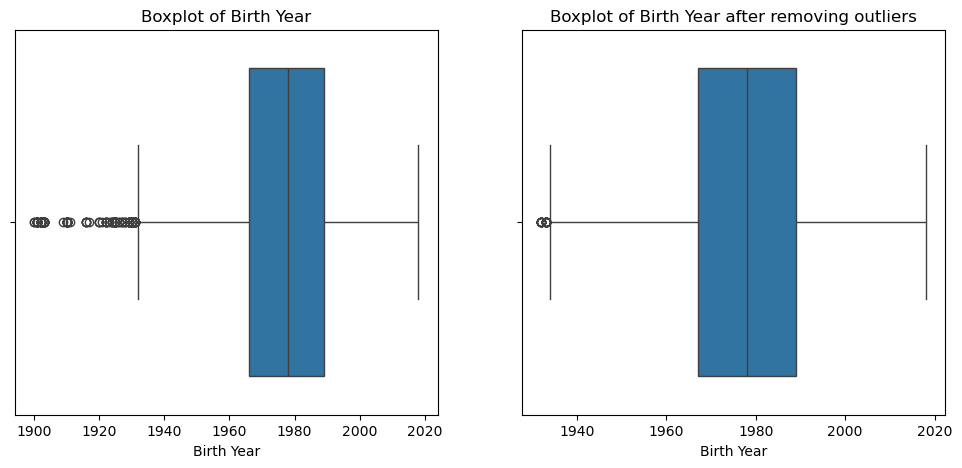

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.boxplot(X_train, x="Birth Year", ax=axes[0])
axes[0].set_title("Boxplot of Birth Year")

sns.boxplot(X_train[X_train["Birth Year"] > 1931.5], x="Birth Year", ax=axes[1])
axes[1].set_title("Boxplot of Birth Year after removing outliers")


plt.show()

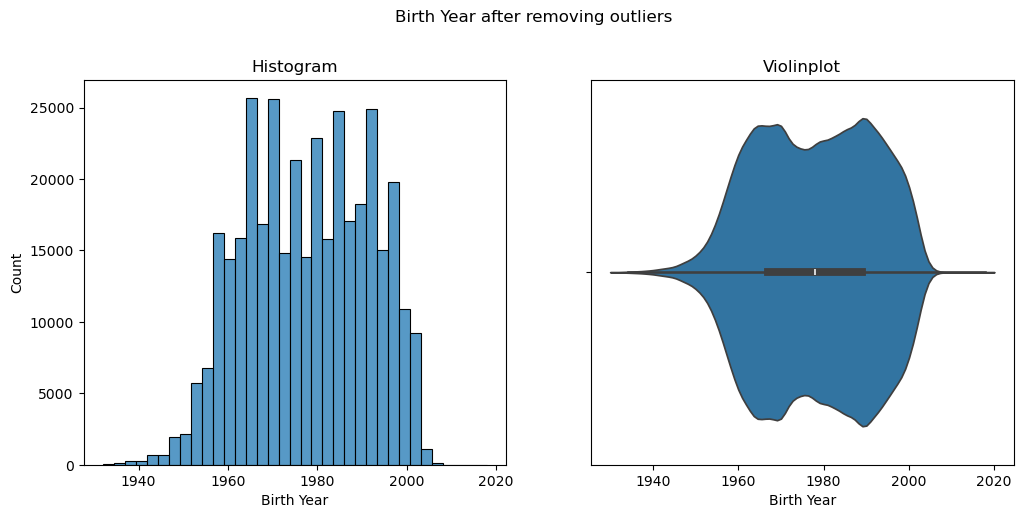

In [32]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(X_train[X_train["Birth Year"] > 1931.5], x="Birth Year", bins=35, ax=axes[0])
axes[0].set_title("Histogram")

sns.violinplot(X_train[X_train["Birth Year"] > 1931.5], x="Birth Year", ax=axes[1])
axes[1].set_title("Violinplot")

plt.suptitle("Birth Year after removing outliers", y=1.02)
plt.show()

**`Number of dependents`**<br>
By the IQR and previous EDA, we conclude this variable does not have outliers.

In [33]:
len(X_train[(X_train['Age at Injury'] > 88.5) | (X_train['Average Weekly Wage'] > 4800) |(X_train['Birth Year']<1931.5)])/len(X_train)*100

0.1478281211891951

In [34]:
overview(X_train[(X_train['Age at Injury'] > 88.5) | (X_train['Average Weekly Wage'] > 4800) |(X_train['Birth Year']<1931.5)])

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],451,0,0.00
1,Age at Injury,Int64,81,68,11.45
2,Alternative Dispute Resolution,object,1,0,0.00
3,Assembly Date,datetime64[ms],408,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,385,7,1.18
6,Birth Year,Int64,75,61,10.27
7,C-2 Date,datetime64[ms],413,2,0.34
8,C-3 Date,datetime64[ms],194,365,61.45
9,Carrier Name,object,130,0,0.00


### Removing outliers

In [35]:
X_train = X_train[(X_train['Age at Injury'] < 88.5) | (X_train['Age at Injury'].isna())]


In [36]:
round(len(X_train)/len(X_train_original)*100,2)

99.96

In [37]:
X_train = X_train[(X_train['Average Weekly Wage'] < 4800) | (X_train['Average Weekly Wage'].isna())]


In [38]:
round(len(X_train)/len(X_train_original)*100,2)

99.87

In [39]:
X_train =  X_train[(X_train['Birth Year'] > 1931.5) | (X_train['Birth Year'].isna())]

In [40]:
round(len(X_train)/len(X_train_original)*100,2)

99.85

In [41]:
len(X_train)

401222

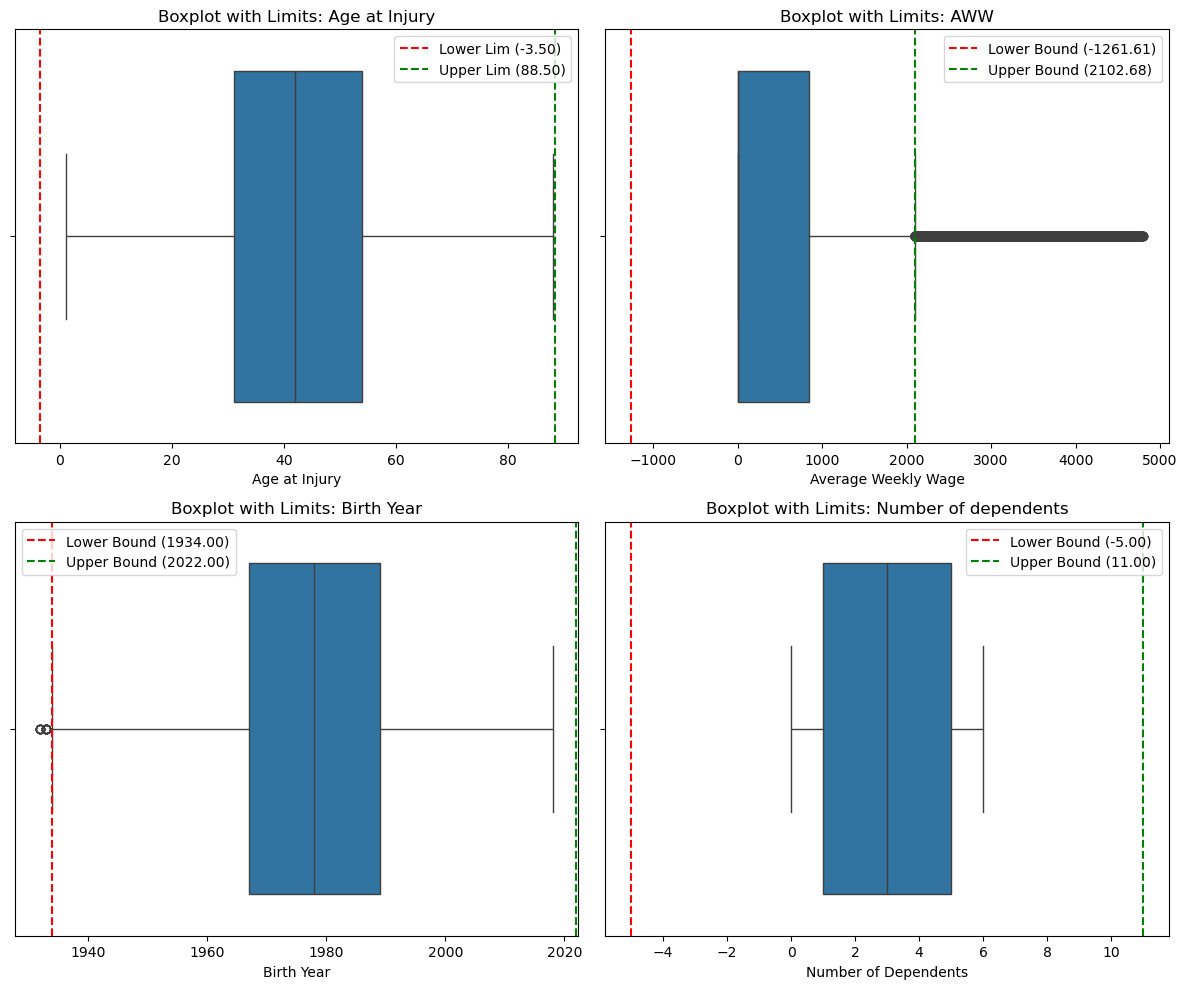

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

col_1 = "Age at Injury"
lower_lim_1, upper_bound_1 = compute_lims(X_train, col_1)
sns.boxplot(X_train, x= col_1, ax=axes[0, 0])
axes[0, 0].axvline(lower_lim_1, color='red', linestyle='--', label=f'Lower Lim ({lower_lim_1:.2f})')
axes[0, 0].axvline(upper_bound_1, color='green', linestyle='--', label=f'Upper Lim ({upper_bound_1:.2f})')
axes[0, 0].set_title("Boxplot with Limits: Age at Injury")
axes[0, 0].legend()


col_2 = "Average Weekly Wage"
lower_lim_2, upper_bound_2 = compute_lims(X_train, col_2)
sns.boxplot(X_train,  x= col_2, ax=axes[0, 1])
axes[0, 1].axvline(lower_lim_2, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_2:.2f})')
axes[0, 1].axvline(upper_bound_2, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_2:.2f})')
axes[0, 1].set_title("Boxplot with Limits: AWW")
axes[0, 1].legend()


col_3 = "Birth Year"
lower_lim_3, upper_bound_3 = compute_lims(X_train, col_3)
sns.boxplot(X_train, x=col_3, ax=axes[1, 0])
axes[1, 0].axvline(lower_lim_3, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_3:.2f})')
axes[1, 0].axvline(upper_bound_3, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_3:.2f})')
axes[1, 0].set_title("Boxplot with Limits: Birth Year")
axes[1, 0].legend()


col_4 = "Number of Dependents"
lower_lim_4, upper_bound_4 = compute_lims(X_train, col_4)
sns.boxplot(X_train, x= col_4, ax=axes[1, 1])
axes[1, 1].axvline(lower_lim_4, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_4:.2f})')
axes[1, 1].axvline(upper_bound_4, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_4:.2f})')
axes[1, 1].set_title("Boxplot with Limits: Number of dependents")
axes[1, 1].legend()

plt.savefig('outliers_depois.png')
plt.tight_layout()
plt.show()

Aligning the target to the filtered X_train after outlier removal, to avoid having different number of rows.

In [43]:
target_train = target_train.loc[X_train.index]

## Treatment of Missing Values

In [44]:
overview(X_train)

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],4585,2587,0.64
1,Age at Injury,Int64,85,3743,0.93
2,Alternative Dispute Resolution,object,3,0,0.00
3,Assembly Date,datetime64[ms],891,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,93087,20059,5.00
6,Birth Year,Int64,85,37794,9.42
7,C-2 Date,datetime64[ms],2140,10185,2.54
8,C-3 Date,datetime64[ms],1606,270730,67.48
9,Carrier Name,object,1966,0,0.00


### Accident Date and C-2 Date
Imputation based on the median difference between the accident date and assembly date and C-2 date and Assembly date, since these timelines should not differ much from case to case.

In [45]:
#Calculating the difference of the dates we want to fill with Assembly date
treat_NaT = X_train[['Accident Date', 'C-2 Date', 'Assembly Date']].copy()
treat_NaT['diff_Accid_AD'] = treat_NaT['Assembly Date'] - treat_NaT['Accident Date']
treat_NaT['diff_C2_AD'] = treat_NaT['Assembly Date'] - treat_NaT['C-2 Date']
print('Median:\n', treat_NaT[['diff_Accid_AD', 'diff_C2_AD']].median(axis=0))
print('\nMean:\n', treat_NaT[['diff_Accid_AD', 'diff_C2_AD']].mean(axis=0))
print('\nMode:\n', treat_NaT[['diff_Accid_AD', 'diff_C2_AD']].mode(axis=0))

Median:
 diff_Accid_AD   10 days
diff_C2_AD       0 days
dtype: timedelta64[ms]

Mean:
 diff_Accid_AD   81 days 16:08:56.286000
diff_C2_AD       3 days 22:31:25.908000
dtype: timedelta64[ms]

Mode:
   diff_Accid_AD diff_C2_AD
0        6 days     0 days


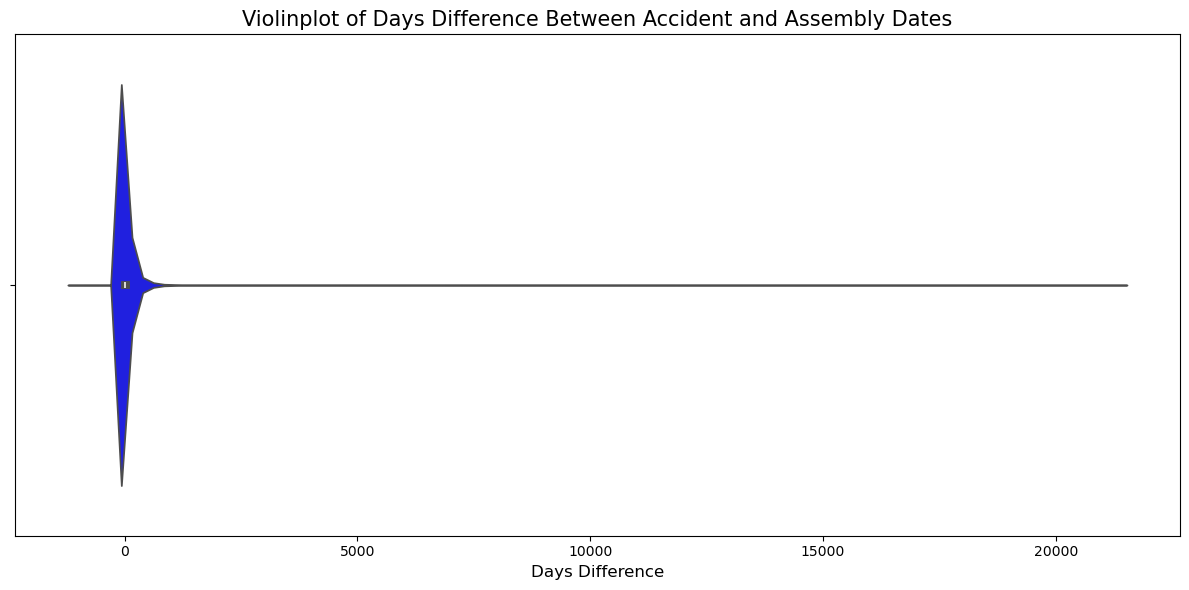

In [46]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=treat_NaT['diff_Accid_AD'].dt.days, color='blue')
plt.title('Violinplot of Days Difference Between Accident and Assembly Dates', fontsize=15)
plt.xlabel('Days Difference', fontsize=12)
plt.tight_layout()
plt.show()

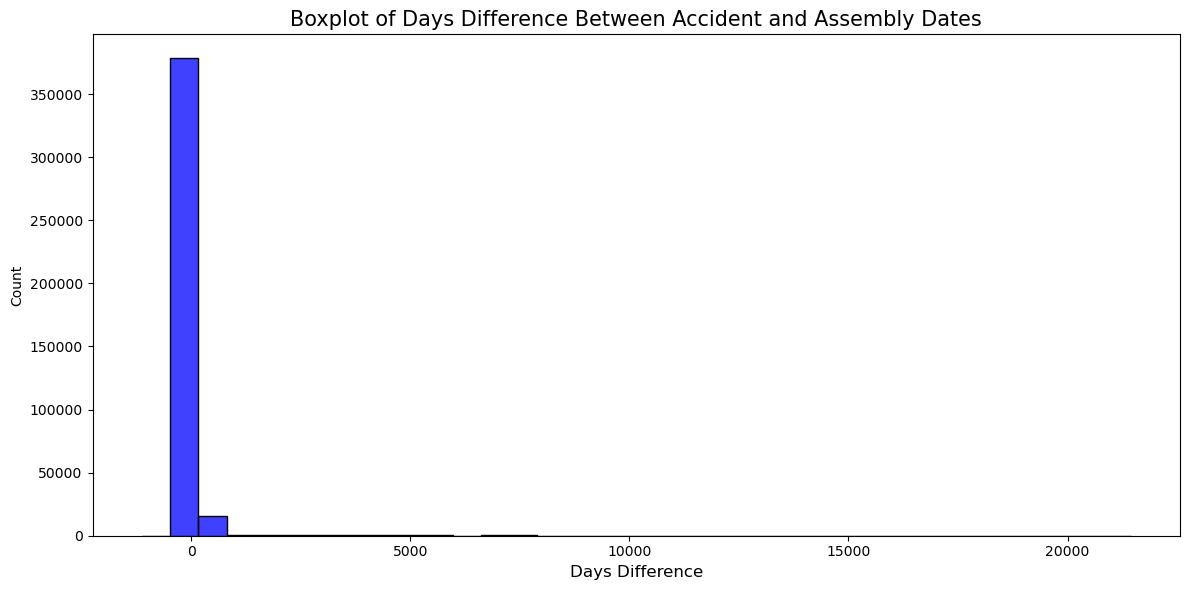

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(x=treat_NaT['diff_Accid_AD'].dt.days, color='blue', bins=35)
plt.title('Boxplot of Days Difference Between Accident and Assembly Dates', fontsize=15)
plt.xlabel('Days Difference', fontsize=12)
plt.tight_layout()
plt.show()

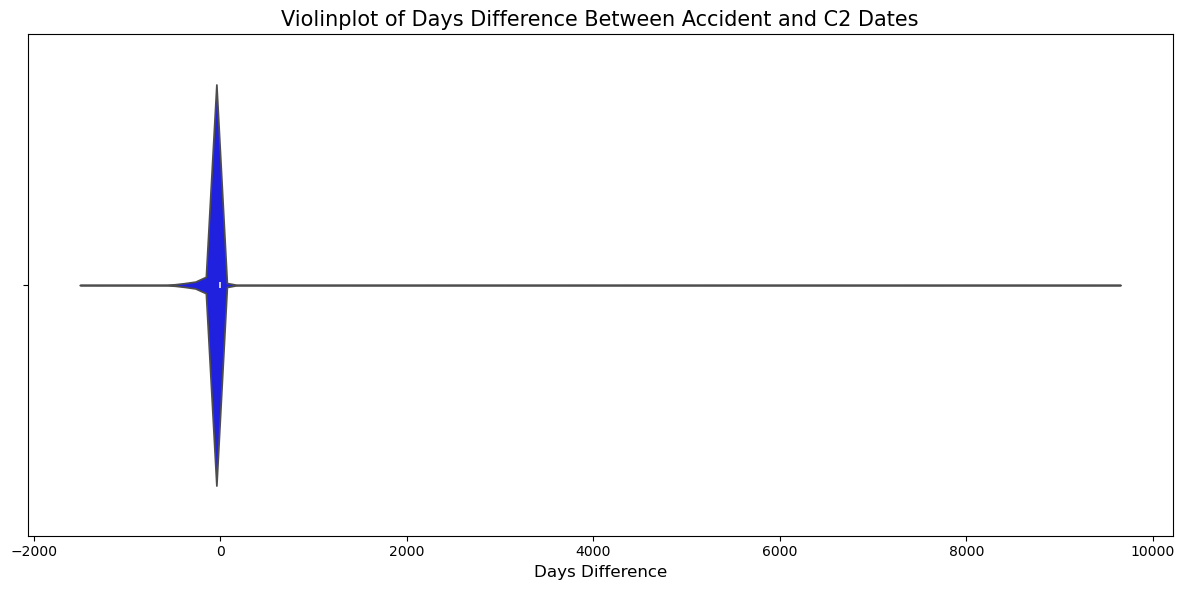

In [48]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=treat_NaT['diff_C2_AD'].dt.days, color='blue')
plt.title('Violinplot of Days Difference Between Accident and C2 Dates', fontsize=15)
plt.xlabel('Days Difference', fontsize=12)
plt.tight_layout()
plt.show()

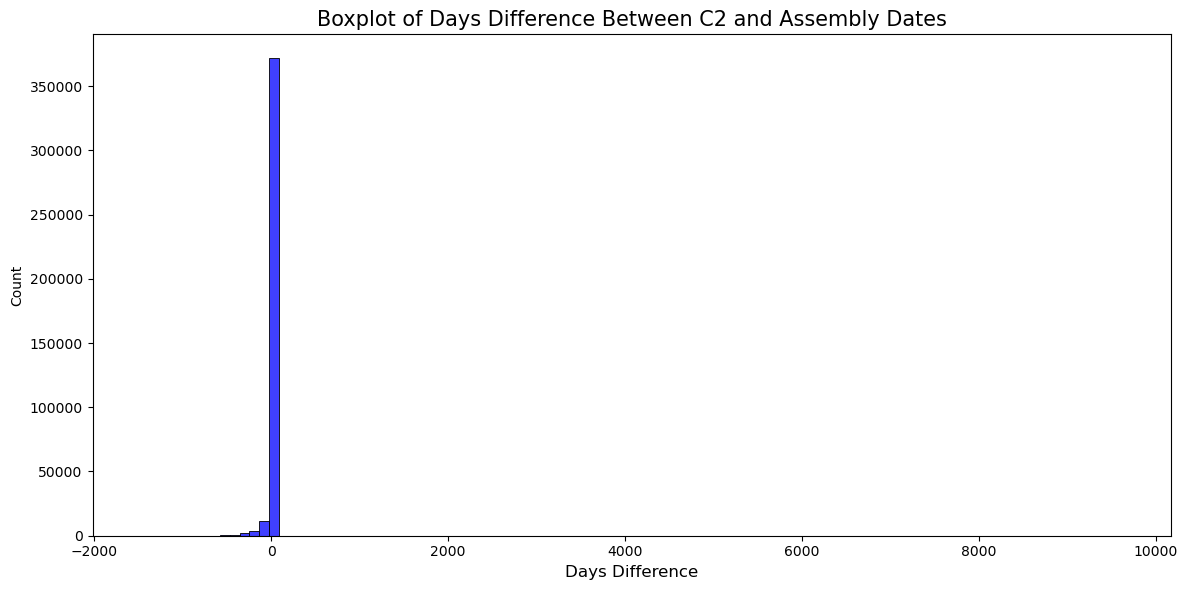

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(x=treat_NaT['diff_C2_AD'].dt.days, color='blue', bins=100)
plt.title('Boxplot of Days Difference Between C2 and Assembly Dates', fontsize=15)
plt.xlabel('Days Difference', fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
treat_NaT[treat_NaT['diff_Accid_AD'].dt.days<0]['diff_Accid_AD'].describe()

count                         1019
mean     -73 days +04:56:45.692000
std       107 days 18:06:27.961000
min           -1127 days +00:00:00
25%             -83 days +00:00:00
50%             -33 days +00:00:00
75%             -14 days +00:00:00
max              -1 days +00:00:00
Name: diff_Accid_AD, dtype: object

In [51]:
treat_NaT['diff_C2_AD'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99,0.995])

count                      391037
mean       3 days 22:31:25.908000
std      260 days 20:16:50.327000
min          -1466 days +00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%               0 days 00:00:00
90%               1 days 00:00:00
95%               2 days 00:00:00
99%               3 days 00:00:00
99.5%             7 days 00:00:00
max            9614 days 00:00:00
Name: diff_C2_AD, dtype: object

**`Filling missing values of 'Accident Date' and 'C2-Date' on the training data`**

In [52]:
X_train.loc[X_train['Accident Date'].isna(), 'Accident Date'] = X_train['Assembly Date']-treat_NaT['diff_Accid_AD'].median(axis=0)
X_train.loc[X_train['C-2 Date'].isna(), 'C-2 Date'] = X_train['Assembly Date']-treat_NaT['diff_C2_AD'].median(axis=0)
X_train[['Accident Date', 'C-2 Date', 'Assembly Date']].isna().sum()

Accident Date    0
C-2 Date         0
Assembly Date    0
dtype: int64

**`Filling Missing values of 'Accident Date' and 'C2-Date' on the validation and test data`**

In [53]:
X_val.loc[X_val['Accident Date'].isna(), 'Accident Date'] = X_val['Assembly Date']-treat_NaT['diff_Accid_AD'].median(axis=0)
X_val.loc[X_val['C-2 Date'].isna(), 'C-2 Date'] = X_val['Assembly Date']-treat_NaT['diff_C2_AD'].median(axis=0)
print(X_val[['Accident Date', 'C-2 Date', 'Assembly Date']].isna().sum())


Accident Date    0
C-2 Date         0
Assembly Date    0
dtype: int64


In [54]:
employees_test.loc[employees_test['Accident Date'].isna(), 'Accident Date'] = employees_test['Assembly Date']-treat_NaT['diff_Accid_AD'].median(axis=0)
employees_test.loc[employees_test['C-2 Date'].isna(), 'C-2 Date'] = employees_test['Assembly Date']-treat_NaT['diff_C2_AD'].median(axis=0)
print(employees_test[['Accident Date', 'C-2 Date', 'Assembly Date']].isna().sum())

Accident Date    0
C-2 Date         0
Assembly Date    0
dtype: int64


### Age at Injury, Birth Year

**`Filling missing values of 'Birth Year' on the training data`**

In [55]:
input_BY = X_train[(X_train['Accident Date'].notna()) & (X_train['Age at Injury'].notna()) & (X_train['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_train.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_train['Birth Year'].isna().sum())

Missing values left in "Birth Year": 1504


**`Filling missing values of 'Age at Injury' on the training data`**

In [56]:
input_Age = X_train[(X_train['Accident Date'].notna()) & (X_train['Birth Year'].notna()) & (X_train['Age at Injury'].isna())]
input_Age['Age at Injury'] = (input_Age['Accident Date'].dt.year) - input_Age['Birth Year']
X_train.loc[input_Age.index, 'Age at Injury'] = input_Age['Age at Injury']
print('Missing values left in "Age at Injury":', X_train['Age at Injury'].isna().sum())

Missing values left in "Age at Injury": 1504


To do the same for accident date, it would only be possible to input the year, and not the month or the day. So we settled for the strategy above.

**`Filling Missing values of 'Birth Year' and 'Age at Injury' on the validation and test data`**

In [57]:
input_BY = X_val[(X_val['Accident Date'].notna()) & (X_val['Age at Injury'].notna()) & (X_val['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_val.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_train['Birth Year'].isna().sum())

input_Age = X_val[(X_val['Accident Date'].notna()) & (X_val['Birth Year'].notna()) & (X_val['Age at Injury'].isna())]
input_Age['Age at Injury'] = (input_Age['Accident Date'].dt.year) - input_Age['Birth Year']
X_val.loc[input_Age.index, 'Age at Injury'] = input_Age['Age at Injury']
print('Missing values left in "Age at Injury":', X_train['Age at Injury'].isna().sum())

Missing values left in "Birth Year": 1504
Missing values left in "Age at Injury": 1504


In [58]:
input_BY = employees_test[(employees_test['Accident Date'].notna()) & (employees_test['Age at Injury'].notna()) & (employees_test['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
employees_test.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_train['Birth Year'].isna().sum())

input_Age = employees_test[(employees_test['Accident Date'].notna()) & (employees_test['Birth Year'].notna()) & (employees_test['Age at Injury'].isna())]
input_Age['Age at Injury'] = (input_Age['Accident Date'].dt.year) - input_Age['Birth Year']
employees_test.loc[input_Age.index, 'Age at Injury'] = input_Age['Age at Injury']
print('Missing values left in "Age at Injury":', X_train['Age at Injury'].isna().sum())

Missing values left in "Birth Year": 1504
Missing values left in "Age at Injury": 1504


In [59]:
overview(X_train[X_train['Age at Injury'].isna() & X_train['Birth Year'].isna()])

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],938,0,0.00
1,Age at Injury,Int64,1,1504,100.00
2,Alternative Dispute Resolution,object,2,0,0.00
3,Assembly Date,datetime64[ms],621,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,151,94,6.25
6,Birth Year,Int64,1,1504,100.00
7,C-2 Date,datetime64[ms],658,0,0.00
8,C-3 Date,datetime64[ms],396,953,63.36
9,Carrier Name,object,272,0,0.00


**Conclusion:**
These rows only represent 0.37% of the training data, we will imput the median.

In [60]:
print('Percentage of rows that have missing values on these columns:', ((X_train[X_train['Age at Injury'].isna() & X_train['Birth Year'].isna()].shape[0])/len(X_train['Birth Year']))*100)

Percentage of rows that have missing values on these columns: 0.3748548185293927


**`Filling missing values of 'Age at Injury' and 'Birth Year' on the training data by median`**

In [61]:
X_train["Age at Injury"].fillna(X_train['Age at Injury'].median(), inplace=True)
print('Missing values left in "Age at Injury":', X_train['Age at Injury'].isna().sum())

input_BY = X_train[(X_train['Accident Date'].notna()) & (X_train['Age at Injury'].notna()) & (X_train['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_train.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_train['Birth Year'].isna().sum())

Missing values left in "Age at Injury": 0
Missing values left in "Birth Year": 0


**`Filling missing values of 'Age at Injury' and 'Birth Year' on the validation and test data by median`**

In [62]:
X_val["Age at Injury"].fillna(X_train['Age at Injury'].median(), inplace=True)
print('Missing values left in "Age at Injury":', X_val['Age at Injury'].isna().sum())

input_BY = X_val[(X_val['Accident Date'].notna()) & (X_val['Age at Injury'].notna()) & (X_val['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_val.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_val['Birth Year'].isna().sum())

Missing values left in "Age at Injury": 0
Missing values left in "Birth Year": 0


In [63]:
employees_test["Age at Injury"].fillna(X_train['Age at Injury'].median(), inplace=True)
print('Missing values left in "Age at Injury":', employees_test['Age at Injury'].isna().sum())

input_BY = employees_test[(employees_test['Accident Date'].notna()) & (employees_test['Age at Injury'].notna()) & (employees_test['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
employees_test.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', employees_test['Birth Year'].isna().sum())

Missing values left in "Age at Injury": 0
Missing values left in "Birth Year": 0


### Industry Code and Industry Description

As the `Industry Code` is a categorical variable and it did not show any relation with other variables, the missing values are going to be replaced by 'UNKNOWN'. 

`Industry Description` gives the same information as Industry Code, so we will also impute the missing value by "UNKNOWN"

-------


**Industry Code Vs WCIOs Codes** <br>
Theoretically, different industries would be more prone to certain types of injurys occured.<br>
However, it didn't show any relevant relationship between them, by recorring to Cramér's V association. <br>

In [64]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


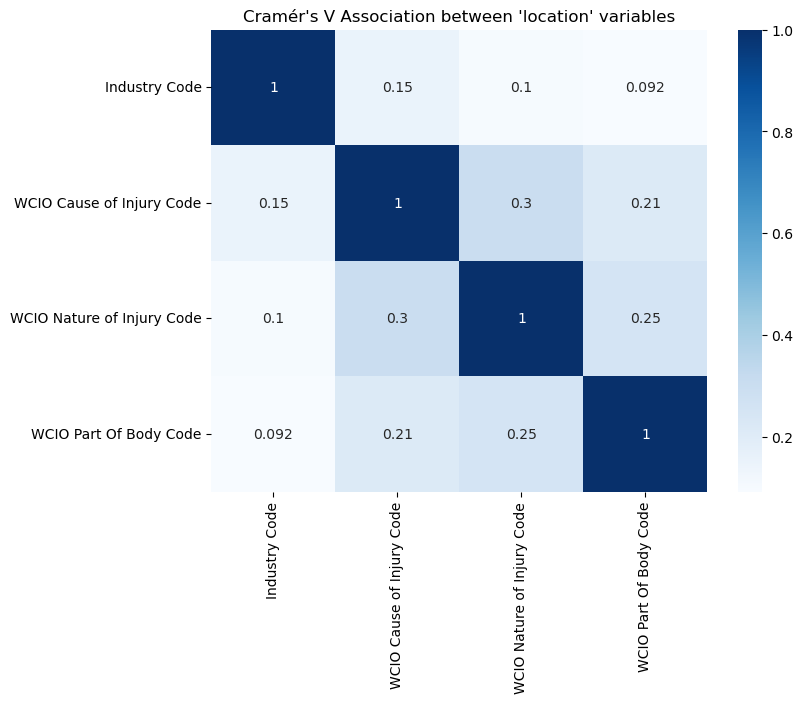

In [65]:
variables = ['Industry Code', 'WCIO Cause of Injury Code',
             'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

results = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            results.loc[var1, var2] = cramers_v(X_train[var1], X_train[var2])
        else:
            results.loc[var1, var2] = 1  #perfect association with itself

#Heatmap of Cramér's V
results = results.astype(float)
plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap="Blues", cbar=True)
plt.title("Cramér's V Association between 'location' variables")
plt.show()

**Industry Code Vs Carrier Type** <br>
*Does it make sense to input industry codes based on the carrier type?* <br>
We visualize this variables against each other to see if there's a relation for someone with the same industry to have the same primary insurance provider, however, we can observe that each carrier type is very distributed across many industries.<br>Conclusion, we will not be imputing Industry code based on Carrier Type.

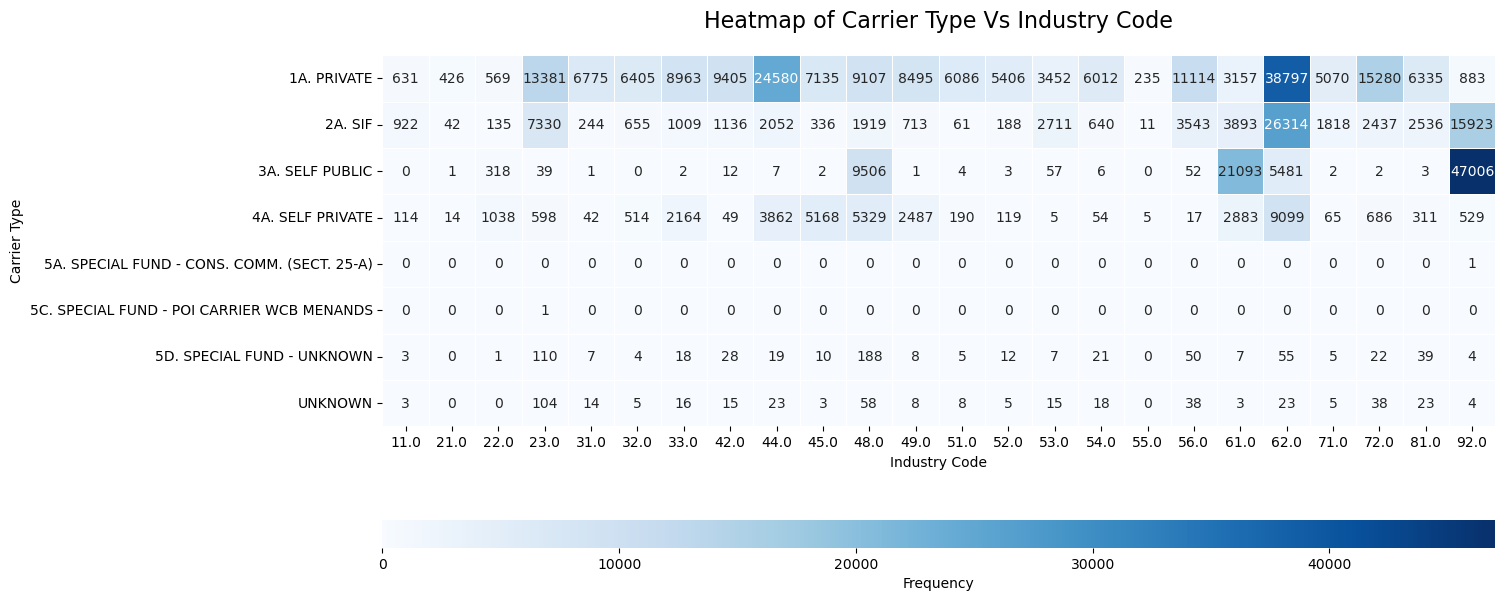

In [66]:
crosstab = pd.crosstab(X_train['Carrier Type'], X_train['Industry Code'])

plt.figure(figsize=(15, 7))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frequency', 'orientation': 'horizontal', 'aspect': 40}, linewidths=0.5, square=True)
plt.ylabel('Carrier Type')
plt.xlabel('Industry Code')
plt.title('Heatmap of Carrier Type Vs Industry Code', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

**Industry Code Vs Average Weekly Wage** <br>
We look at the different ranges of Weekly Wage since it may be related to a certain industry. Nonetheless, the variances of weekly wage for each industry code very high. <br>
Conclusion: We will not imput based on AWW.

In [67]:
X_t = X_train[X_train['Average Weekly Wage']>0]

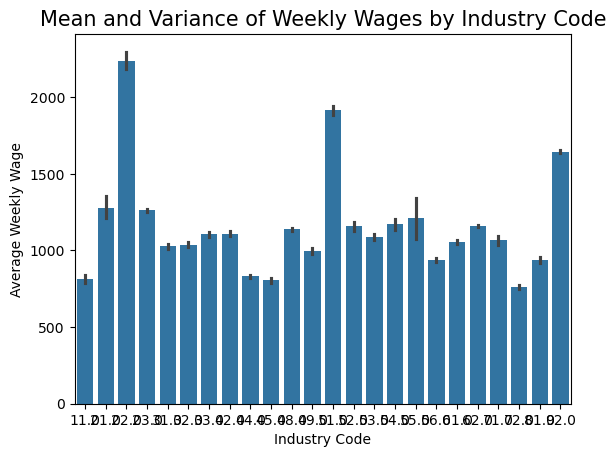

In [68]:
sns.barplot(data=X_t, x='Industry Code', y='Average Weekly Wage')
plt.title('Mean and Variance of Weekly Wages by Industry Code', fontsize=15)
plt.show()

In [69]:
(X_t.groupby('Industry Code')['Average Weekly Wage'].agg(['median'])).T

Industry Code,11.0,21.0,22.0,23.0,31.0,32.0,33.0,42.0,44.0,45.0,48.0,49.0,51.0,52.0,53.0,54.0,55.0,56.0,61.0,62.0,71.0,72.0,81.0,92.0
median,756.52,1162.59,2124.0,1082.71,962.515,947.92,993.27,991.71,720.0,716.95,1183.06,817.73,1957.73,994.23,1027.44,960.765,1250.0,802.71,897.58,997.65,919.18,640.75,818.51,1530.625


Variances of weekly wage for each industry code:

In [70]:
round(X_t.groupby('Industry Code')['Average Weekly Wage'].agg(['var']).T, 1)

Industry Code,11.0,21.0,22.0,23.0,31.0,32.0,33.0,42.0,44.0,45.0,48.0,49.0,51.0,52.0,53.0,54.0,55.0,56.0,61.0,62.0,71.0,72.0,81.0,92.0
var,151893.8,283237.2,762362.2,427437.2,227924.1,221044.5,278550.4,288916.8,231009.8,187529.4,478279.5,341768.9,557648.7,442642.6,269801.7,584712.2,296622.5,259853.5,396615.1,395398.7,497696.7,209199.4,270868.0,545904.1


**`Filling missing values of 'Industry Code' and 'Industry Code Description' on the training data`**

In [71]:
X_train['Industry Code'] = X_train['Industry Code'].fillna('UNKNOWN')
X_train['Industry Code Description'] = X_train['Industry Code Description'].fillna('UNKNOWN')

**`Filling missing values of 'Industry Code' and 'Industry Code Description' on validation and test data`**

In [72]:
X_val['Industry Code'] = X_val['Industry Code'].fillna('UNKNOWN')
X_val['Industry Code Description'] = X_val['Industry Code Description'].fillna('UNKNOWN')

In [73]:
employees_test['Industry Code'] = employees_test['Industry Code'].fillna('UNKNOWN')
employees_test['Industry Code Description'] = employees_test['Industry Code Description'].fillna('UNKNOWN')

### Average Weekly Wage

For the Imputation of the AWW, we had two methods, and we decided to first try one method, which was the imputation by the median of AWW by Gender and INudstry Code, and see the scores of the models, and then we decided to change this method and impute by 0, this second method, increased the scores of the models.

In [74]:
X_train[X_train["Average Weekly Wage"] > 0]['Average Weekly Wage'].median()

1068.37

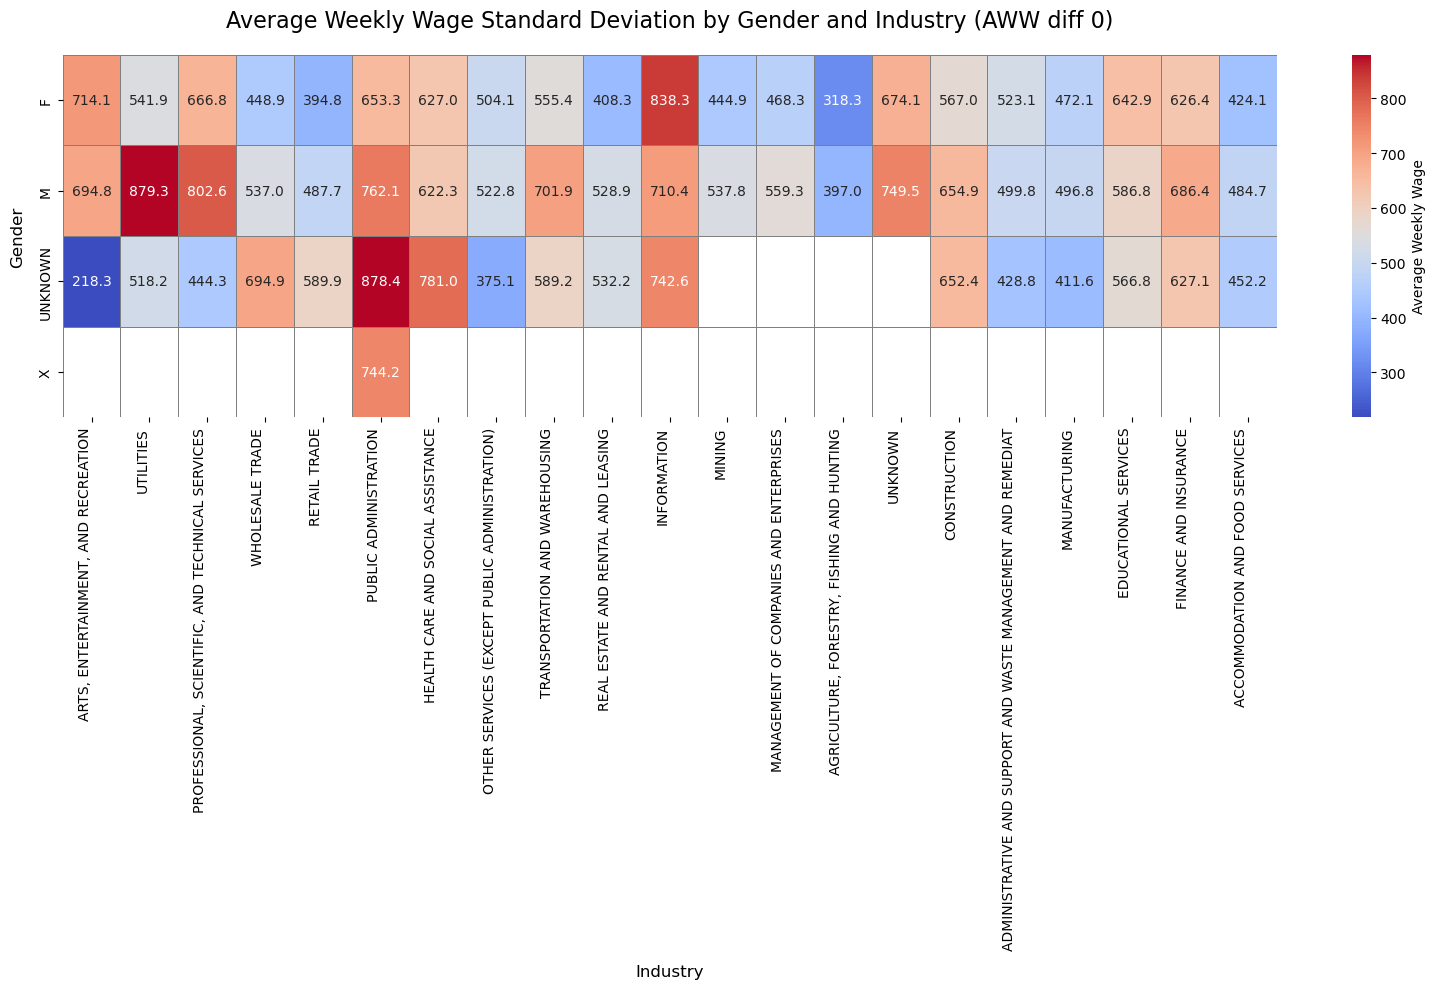

In [75]:
df_gender_industry_wage_std = X_train[X_train["Average Weekly Wage"] > 0].groupby(['Gender', 'Industry Code Description'])['Average Weekly Wage'].std().unstack()

sorted_industries = df_gender_industry_wage_std.std().sort_values(ascending=False).index
df_gender_industry_wage_std = df_gender_industry_wage_std[sorted_industries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    df_gender_industry_wage_std, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={'label': 'Average Weekly Wage'}
)

# Improve chart aesthetics
plt.title('Average Weekly Wage Standard Deviation by Gender and Industry (AWW diff 0)', fontsize=16, pad=20)
plt.xlabel('Industry', fontsize=12, labelpad=10)
plt.ylabel('Gender', fontsize=12, labelpad=10)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

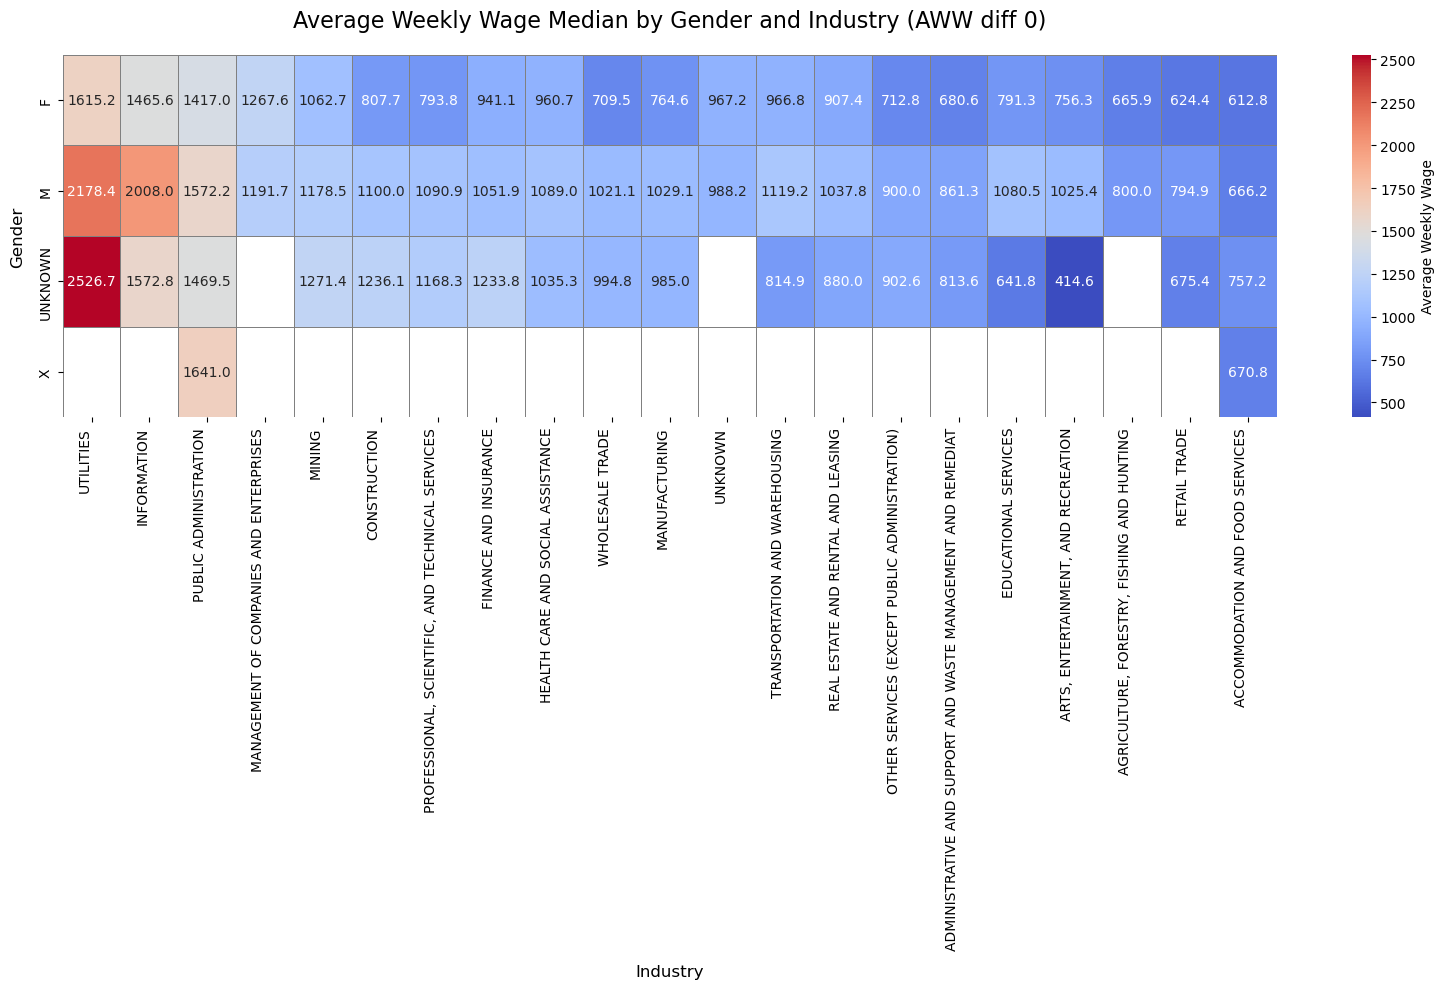

In [76]:
df_gender_industry_wage = X_train[X_train["Average Weekly Wage"] > 0].groupby(['Gender', 'Industry Code Description'])['Average Weekly Wage'].median().unstack()

sorted_industries = df_gender_industry_wage.median().sort_values(ascending=False).index
df_gender_industry_wage = df_gender_industry_wage[sorted_industries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    df_gender_industry_wage, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={'label': 'Average Weekly Wage'}
)

# Improve chart aesthetics
plt.title('Average Weekly Wage Median by Gender and Industry (AWW diff 0)', fontsize=16, pad=20)
plt.xlabel('Industry', fontsize=12, labelpad=10)
plt.ylabel('Gender', fontsize=12, labelpad=10)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

**`Filling missing values of 'Average Weekly Wage' on the training dataset`**

In [77]:
#Filling the missing vlaues by 0
X_train['Average Weekly Wage'].fillna(0, inplace=True)

**`Filling missing values of 'Average Weekly Wage' on the validation dataset`**

In [78]:
X_val['Average Weekly Wage'].fillna(0, inplace=True)

**`Filling missing values of 'Average Weekly Wage' on the test dataset`**

In [79]:
employees_test['Average Weekly Wage'].fillna(0, inplace=True)

### WCIOs Codes and WCIOs Descriptions
`WCIOs Codes` are not correlated with each other. We put it against other codes, because, for example, the cause of injury could be related to a part of body injured, however, this does not happen. <br> Conclusion: We will replace the missing values as 'UNKNOWN'. 


`WCIOs Descriptions` give the same information as the respective Codes, so we will also be gilling the missing vlaues by "Unknown"

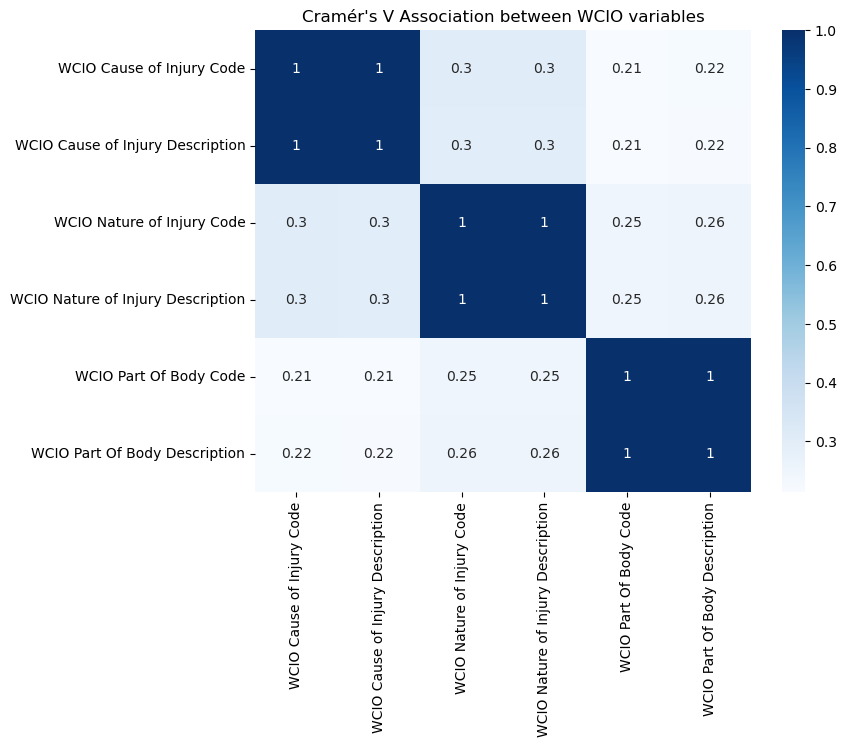

In [80]:
variables = ['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
             'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
             'WCIO Part Of Body Code', 'WCIO Part Of Body Description']

results = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            results.loc[var1, var2] = cramers_v(X_train[var1], X_train[var2])
        else:
            results.loc[var1, var2] = 1  #perfect association with itself

#Heatmap of Cramér's V
results = results.astype(float)
plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap="Blues", cbar=True)
plt.title("Cramér's V Association between WCIO variables")
plt.show()

**`Filling missing values of WCIO Codes and WCIO Descriptions on the training data`**

In [81]:
X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].fillna('UNKNOWN')
X_train['WCIO Cause of Injury Description'] = X_train['WCIO Cause of Injury Description'].fillna('UNKNOWN')

In [82]:
X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].fillna('UNKNOWN')
X_train['WCIO Nature of Injury Description'] = X_train['WCIO Nature of Injury Description'].fillna('UNKNOWN')

In [83]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].fillna('UNKNOWN')
X_train['WCIO Part Of Body Description'] = X_train['WCIO Part Of Body Description'].fillna('UNKNOWN')

In [84]:
X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
             'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
             'WCIO Part Of Body Code', 'WCIO Part Of Body Description']].isna().sum()

WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
dtype: int64

**`Filling missing values of WCIO Codes and WCIO Descriptions on the validation data`**

In [85]:
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].fillna('UNKNOWN')
X_val['WCIO Cause of Injury Description'] = X_val['WCIO Cause of Injury Description'].fillna('UNKNOWN')

In [86]:
X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].fillna('UNKNOWN')
X_val['WCIO Nature of Injury Description'] = X_val['WCIO Nature of Injury Description'].fillna('UNKNOWN')

In [87]:
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].fillna('UNKNOWN')
X_val['WCIO Part Of Body Description'] = X_val['WCIO Part Of Body Description'].fillna('UNKNOWN')

In [88]:
X_val[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
             'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
             'WCIO Part Of Body Code', 'WCIO Part Of Body Description']].isna().sum()

WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
dtype: int64

**`Filling missing values of WCIO Codes and WCIO Descriptions on the test data`**

In [89]:
employees_test['WCIO Cause of Injury Code'] = employees_test['WCIO Cause of Injury Code'].fillna('UNKNOWN')
employees_test['WCIO Cause of Injury Description'] = employees_test['WCIO Cause of Injury Description'].fillna('UNKNOWN')

In [90]:
employees_test['WCIO Nature of Injury Code'] = employees_test['WCIO Nature of Injury Code'].fillna('UNKNOWN')
employees_test['WCIO Nature of Injury Description'] = employees_test['WCIO Nature of Injury Description'].fillna('UNKNOWN')

In [91]:
employees_test['WCIO Part Of Body Code'] = employees_test['WCIO Part Of Body Code'].fillna('UNKNOWN')
employees_test['WCIO Part Of Body Description'] = employees_test['WCIO Part Of Body Description'].fillna('UNKNOWN')

In [92]:
employees_test[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
             'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
             'WCIO Part Of Body Code', 'WCIO Part Of Body Description']].isna().sum()

WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
dtype: int64

### Zip Codes 

As there is a high number of unique values, it is very specific and as Medical Fee Region is more broad (4 regions plus unknown) and it has 100% of correlation with Zip Code (following Cramér's V association), we will probably not use this column, but for now the missing values are going to be replaced by 'UNKNOWN'.

In [93]:
variables = ['Zip Code', 'Medical Fee Region']

results = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            results.loc[var1, var2] = cramers_v(X_train[var1], X_train[var2])
        else:
            results.loc[var1, var2] = 1  #perfect association with itself

results

,Zip Code,Medical Fee Region
Zip Code,1,1.0
Medical Fee Region,1.0,1


**`Filling missing values of Zip Codes on the training data`**

In [94]:
X_train["Zip Code"].fillna("UNKNOWN", inplace = True)

**`Filling missing values of Zip Codes on the validation and test data`**

In [95]:
X_val["Zip Code"].fillna("UNKNOWN", inplace = True)

In [96]:
employees_test["Zip Code"].fillna("UNKNOWN", inplace = True)

### C-3 Date

In [97]:
X_train['C-3 Date']= X_train['C-3 Date'].notnull().astype(int)
X_val['C-3 Date']= X_val['C-3 Date'].notnull().astype(int)
employees_test['C-3 Date']= employees_test['C-3 Date'].notnull().astype(int)

### First Hearing Date

In [98]:
X_train['First Hearing Date'] = X_train['First Hearing Date'].notnull().astype(int)
X_val['First Hearing Date'] = X_val['First Hearing Date'].notnull().astype(int)
employees_test['First Hearing Date'] = employees_test['First Hearing Date'].notnull().astype(int)

### IME-4 Count

In [99]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].notnull().astype(int)
X_val['IME-4 Count'] = X_val['IME-4 Count'].notnull().astype(int)
employees_test['IME-4 Count'] = employees_test['IME-4 Count'].notnull().astype(int)

# New Features and Aggregations

### Rename columns: C-3 Date, First Hearing Date and IME-4 Count

In [100]:
X_train.rename(columns={'C-3 Date': 'has_c3_date','First Hearing Date':'has_first_hearing_date',
                        'IME-4 Count':"has_ime"}, inplace=True)

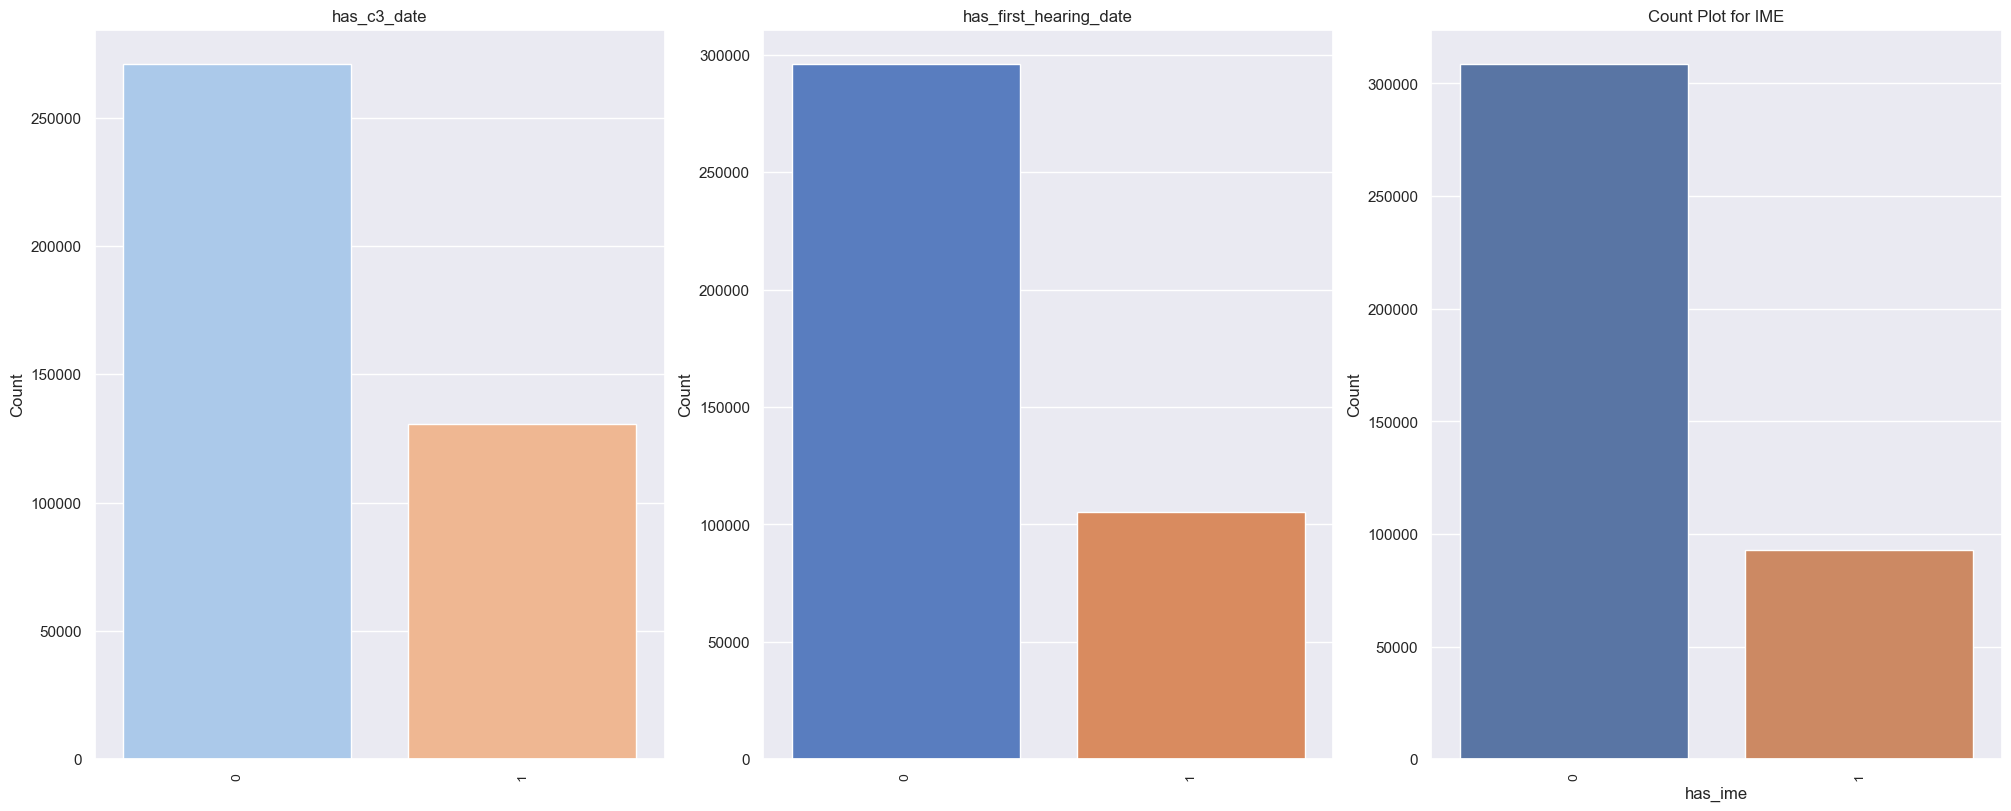

In [101]:

sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 3, figsize=(20, 8), constrained_layout=True)

# Plot for has_c3_date
sns.countplot(
    data=X_train,
    x="has_c3_date",
    ax=axes[0],
    order=X_train["has_c3_date"].value_counts(ascending=False).index.unique(),
    palette="pastel"
)
axes[0].set_title("has_c3_date")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=90, labelsize="small")

# Plot for has_first_hearing_date
sns.countplot(
    data=X_train,
    x="has_first_hearing_date",
    ax=axes[1],
    order=X_train["has_first_hearing_date"].value_counts(ascending=False).index.unique(),
    palette="muted"
)
axes[1].set_title("has_first_hearing_date")
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=90, labelsize="small")

# Plot for ime
sns.countplot(
    data=X_train,
    x="has_ime",
    ax=axes[2],
    order=X_train["has_ime"].value_counts(ascending=False).index.unique(),
    palette="deep"
)
axes[2].set_title("Count Plot for IME")
axes[2].set_xlabel("has_ime")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis="x", rotation=90, labelsize="small")

plt.show()


In [102]:
X_val.rename(columns={'C-3 Date': 'has_c3_date','First Hearing Date':'has_first_hearing_date',
                        'IME-4 Count':"has_ime"}, inplace=True)

In [103]:
employees_test.rename(columns={'C-3 Date': 'has_c3_date','First Hearing Date':'has_first_hearing_date',
                        'IME-4 Count':"has_ime"}, inplace=True)

### Aggregation of WCIO Variables

For this section, we are going to create Aggregate WCIO columns into each category, in order to reduce the number of unique values in the description columns. This aggregation will be based on the WCIO Injury Description Table(2024): 

https://www.wcio.org/injury-description-tables

**`WCIO PART OF BODY`**

- Code 1: 10-19 ----->Head
- Code 2: 20-26 ----->Neck
- Code 3: 30-39 ----->Upper Extremities
- Code 4: 40-49 60-63 ----> Trunk
- Code 5: 50-58 -----> Lower Extremities
- Code 6: 64-66 , -9,90,91,99 ---->Multiple Body Parts

In [104]:
#Creating variables that divide the part of body code into the categories above 
p_code_1= list(range(10,20))
p_code_2= list(range(20,27))
p_code_3= list(range(30,40))
p_code_4= list(range(40, 50)) + list(range(60,64))
p_code_5= list(range(50,59))
p_code_6= list(range(64, 67)) + [-9,90,91,99] #added -9 to "Multiple body parts" becasue the description said "Multiple"

def body_part_categories(code):
    if pd.isna(code):  
        return "Unknown"
    elif code in p_code_1:
        return "Head"
    elif code in p_code_2:
        return "Neck"
    elif code in p_code_3:
        return "Upper Extremities"
    elif code in p_code_4:
        return "Trunk"
    elif code in p_code_5:
        return "Lower Extremities"
    elif code in p_code_6: 
        return "Multiple Body Parts"
    else: #Setting any other value as "Unknown", this will help identify any value that may have not been put into a category
        return "Unknown"


    Applying the function on the Train Data

In [105]:
#Creating the new column of the categories using the WCIO Part of Body Code
X_train['WCIO Part of Body Description Category'] = X_train['WCIO Part Of Body Code'].apply(body_part_categories) 


    Applying the fucntion on the Validation Data

In [106]:
#Creating the new column of the categories using the WCIO Part of Body Code
X_val['WCIO Part of Body Description Category'] = X_val['WCIO Part Of Body Code'].apply(body_part_categories) 


    Applying the function on Test Data

In [107]:
#Creating the new column of the categories using the WCIO Part of Body Code
employees_test['WCIO Part of Body Description Category'] = employees_test['WCIO Part Of Body Code'].apply(body_part_categories) 


Checking if the columns correspond to each other and if there was any error in the classification


In [108]:
# Checking the WCIO Part of Body Code, Description, and Category
part_of_body = X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'WCIO Part of Body Description Category']]

unique_part_of_body = part_of_body.drop_duplicates()

unique_part_of_body['WCIO Part Of Body Code'] = unique_part_of_body['WCIO Part Of Body Code'].astype(str)

unique_part_of_body = unique_part_of_body.sort_values(by='WCIO Part Of Body Code', ascending=True)

unique_part_of_body.set_index('WCIO Part Of Body Code', inplace=True)

unique_part_of_body




,WCIO Part Of Body Description,WCIO Part of Body Description Category
WCIO Part Of Body Code,,
-9.0,MULTIPLE,Multiple Body Parts
10.0,MULTIPLE HEAD INJURY,Head
11.0,SKULL,Head
12.0,BRAIN,Head
13.0,EAR(S),Head
14.0,EYE(S),Head
15.0,NOSE,Head
16.0,TEETH,Head
17.0,MOUTH,Head


**Visual Analysis**

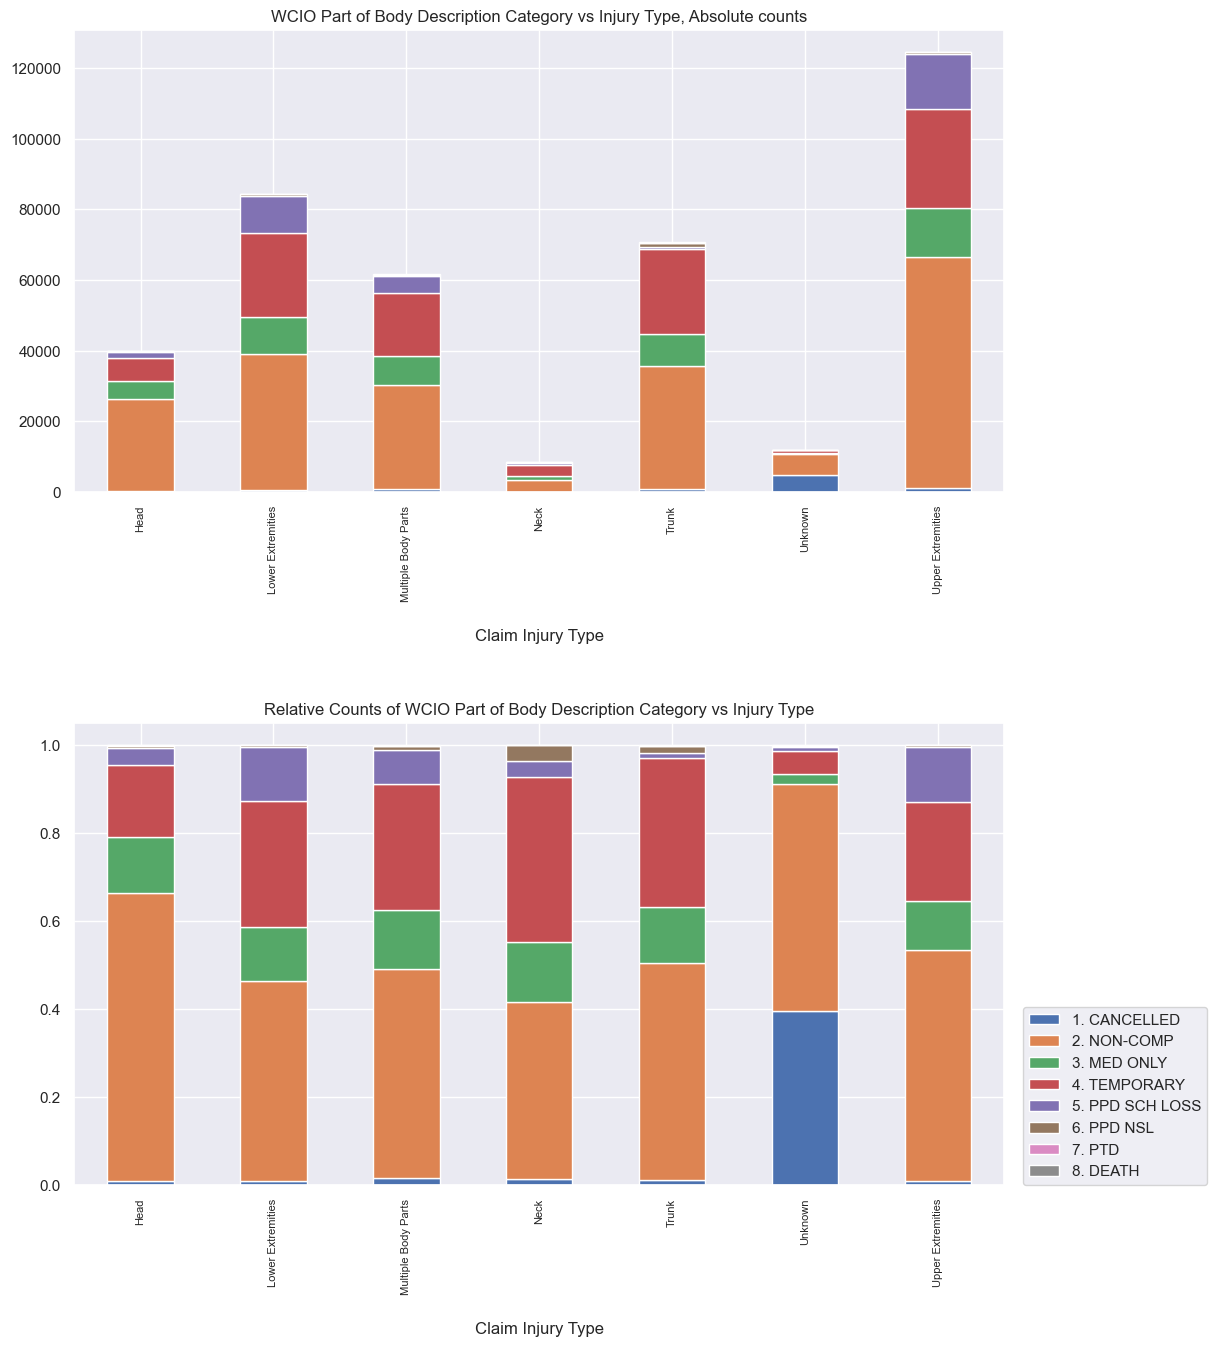

In [109]:
fig, axes = plt.subplots(2, 1, figsize=(12, 15))

cat1 = 'WCIO Part of Body Description Category'
cat2 = 'Claim Injury Type'

#absolute counts
catpc_df = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Part of Body Description Category vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False)  # Hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

#relative counts
catpc_df2 = X_train.join(target_train).groupby([cat1, cat2])[cat2].size() / X_train.join(target_train).groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Part of Body Description Category vs Injury Type")
axes[1].legend(loc=(1.02, 0))  # Reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type", labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.savefig('WCIO_BODY.png')
plt.subplots_adjust(hspace=0.5)
plt.show()

- From the graphs above, we can observe that the category with the highest entries is Upper Extremities.
- The "Unkown" category has the most "Cancelled" claim injury type.

**`WCIO Nature of Injury`**

**Source:** https://www.dir.ca.gov/dwc/WCIS/Nature_Of_Injury.pdf

- Code 1: 01-04 07, 10, 13, 16, 19, 22, 25, 28, 30-32, 34, 36, 37, 40-43, 46, 47, 49, 52-55, 58,59 ----->Specific Injury
- Code 2: 60-80 ----->Occupational Disease or Cumulative Injury
- Code 3: 90-91 ----->Multiple Injuries


In [110]:
#Creating variables that divide the nature of injury code into the categories above 
n_code_1=[1, 2, 3, 4, 7, 10, 13, 16, 19, 22, 25, 28, 30, 31, 32, 34, 36, 37,38, 40, 41, 42, 43, 46, 47, 49, 52, 53, 54, 55, 58, 59]
n_code_2=list(range(60, 84))
n_code_3=[90,91]

def nature_categories(code):
    if pd.isna(code): #Again, setting the missing values as Unknown
        return "Unknown"
    elif code in n_code_1:
        return "Specific Injury"
    elif code in n_code_2:
        return "Occupational Disease or Cumulative Injury"
    elif code in n_code_3:
        return "Multiple Injuries"
    else:
        return "Unknown"

    Applying the fucntion on Training data

In [111]:
#Creating the new column of the categories using the WCIO Nature of Injury Code
X_train['WCIO Nature of Injury Description Category'] = X_train['WCIO Nature of Injury Code'].apply(nature_categories)


    Applying the function on Validation data

In [112]:
X_val['WCIO Nature of Injury Description Category'] = X_val['WCIO Nature of Injury Code'].apply(nature_categories)


    Applying the function on test data

In [113]:
employees_test['WCIO Nature of Injury Description Category'] = employees_test['WCIO Nature of Injury Code'].apply(nature_categories)


Checking if the columns correspond to each other and if there was any error in the classification


In [114]:
nature_of_injury = X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Nature of Injury Description Category']]

unique_nature_of_injury = nature_of_injury.drop_duplicates()

unique_nature_of_injury['WCIO Nature of Injury Code'] = unique_nature_of_injury['WCIO Nature of Injury Code'].astype(str)

unique_nature_of_injury = unique_nature_of_injury.sort_values(by='WCIO Nature of Injury Code', ascending=True)

unique_nature_of_injury.set_index('WCIO Nature of Injury Code', inplace=True)

unique_nature_of_injury



,WCIO Nature of Injury Description,WCIO Nature of Injury Description Category
WCIO Nature of Injury Code,,
1.0,NO PHYSICAL INJURY,Specific Injury
10.0,CONTUSION,Specific Injury
13.0,CRUSHING,Specific Injury
16.0,DISLOCATION,Specific Injury
19.0,ELECTRIC SHOCK,Specific Injury
2.0,AMPUTATION,Specific Injury
22.0,ENUCLEATION,Specific Injury
25.0,FOREIGN BODY,Specific Injury
28.0,FRACTURE,Specific Injury


**Visual Analysis**

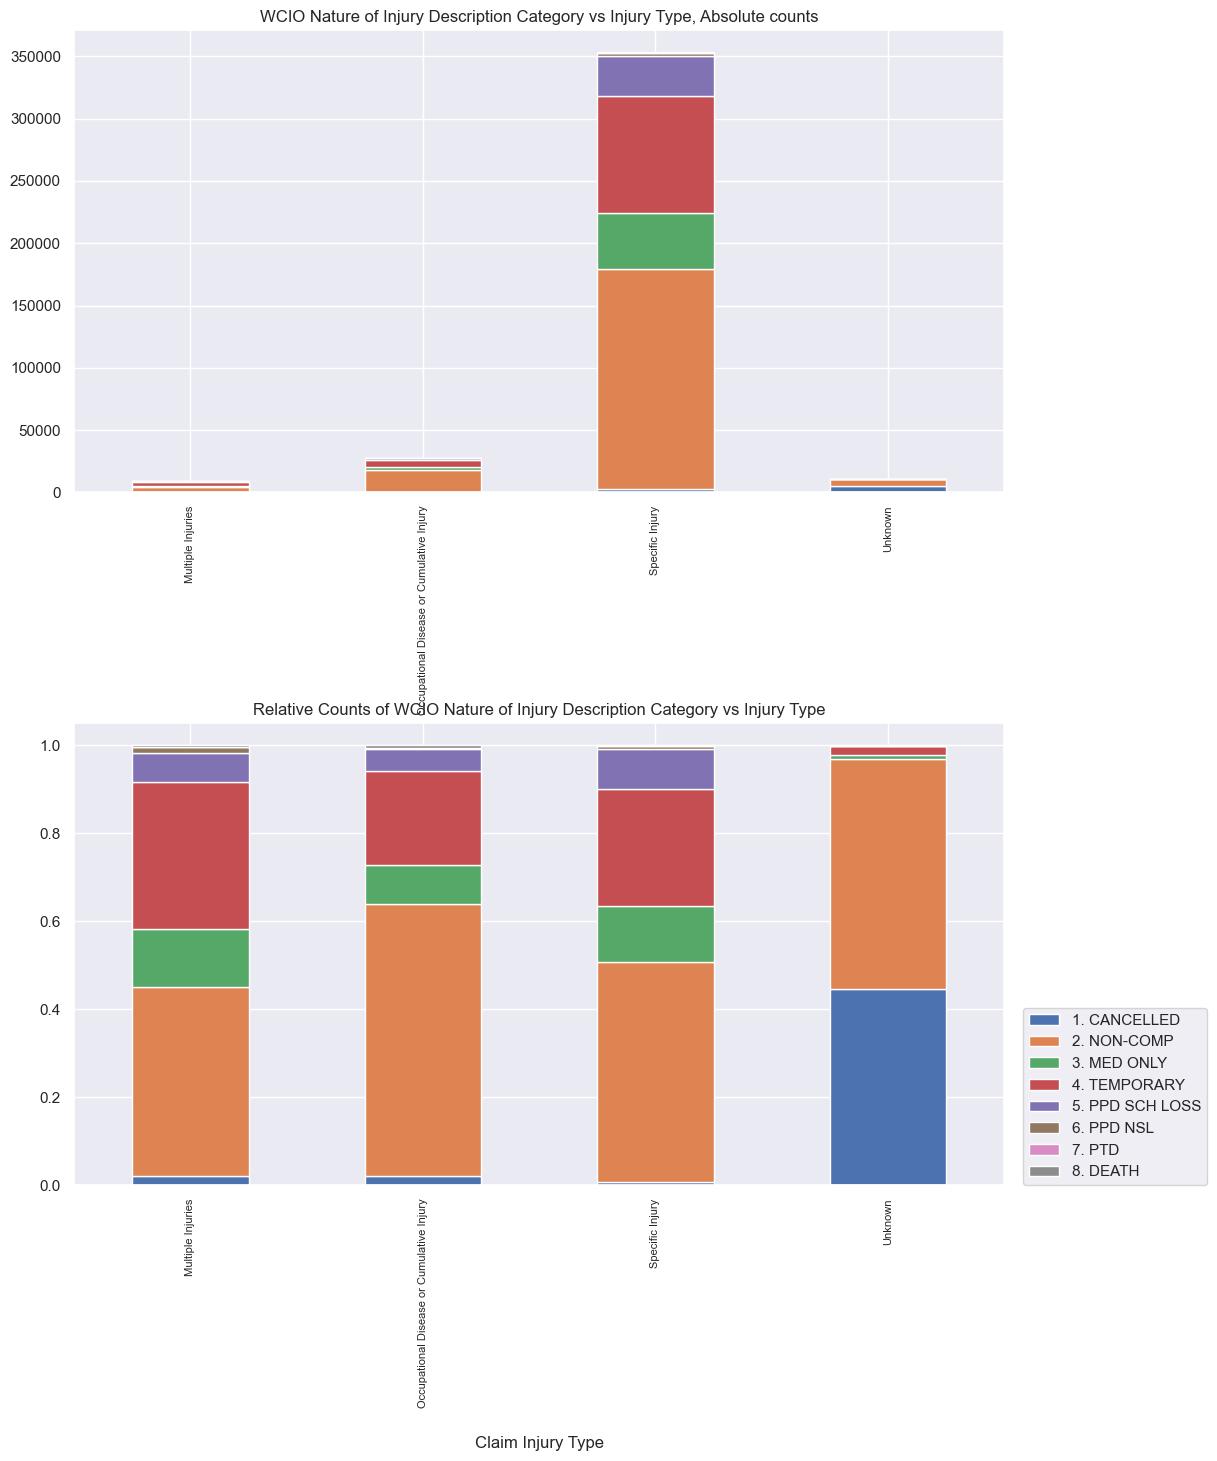

In [115]:
fig, axes = plt.subplots(2, 1, figsize=(12, 15))

cat1 = 'WCIO Nature of Injury Description Category'
cat2 = 'Claim Injury Type'

#absolute counts
catpc_df = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Nature of Injury Description Category vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False)  
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

#relative counts
catpc_df2 = X_train.join(target_train).groupby([cat1, cat2])[cat2].size() / X_train.join(target_train).groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Nature of Injury Description Category vs Injury Type")
axes[1].legend(loc=(1.02, 0))  # Reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type", labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)
plt.savefig('WCIO_NATURE.png')
plt.subplots_adjust(hspace=0.5)
plt.show()

- The most common Nature of Injury is "Specific Injury"
- The "Unkown" category has the most "Cancelled" claim injury type in the WCIO Nature of Injury

**`WCIO Cause of Injury`**

**Source:** https://www.dir.ca.gov/dwc/WCIS/Cause_Of_Injury.pdf

- Code 1: 01-09, 11, 14, 84 ----->Burn or Scald - Heat or Cold Exposures - Contact With
 
- Code 2: 10, 12, 13, 20 ----->Caught In, Under or Between 

- Code 3: 15-19 ----->Cut, Puncture, Scrape Injured By

- Code 4: 25-33 ----> Fall, Slip or Trip Injury

- Code 5: 40, 41, 45-48, 50 -----> Motor Vehicle

- Code 6: 52-61, 97 ---->Strain or Injury By

- Code 7: 65-70 ---->Striking Against or Stepping On (Applies to cases in which the injury was produced by
the impact created by the person, rather than by the source.)

- Code 8: 74-81, 85, 86 ----> Struck or Injured By (Applies to cases in which the injury was produced by the impact created by the source of injury, rather than by the injured person.)

- Code 9: 94-95 ---->Rubbed or Abraded By

- Code 10: 82,83, 87-91, 93, 96, 98, 99 ---->Miscellaneous Causes



In [116]:
#Creating variables that divide the Cause of Injury into the categories above 
c_code_1 = list(range(1, 10)) + [11, 14, 84]
c_code_2 = [10, 12, 13, 20]
c_code_3 = list(range(15,20))
c_code_4 = list(range(25, 34))
c_code_5 = [40, 41] + list(range(45, 49)) + [50]
c_code_6 = list(range(52, 62)) + [97]
c_code_7 = list(range(65, 71))
c_code_8 = list(range(74, 82)) + [85, 86]
c_code_9 = [94, 95]
c_code_10 = [82,83] + list(range(87, 92)) + [93, 96, 98, 99]


def cause_categories(code):
    if pd.isna(code): 
        return "Unknown" #Setting the missing values as "Unknown"
    elif code in c_code_1:
        return "Burn or Scald - Heat or Cold Exposures - Contact With"
    elif code in c_code_2:
        return "Caught In, Under or Between "
    elif code in c_code_3:
        return "Cut, Puncture, Scrape Injured By"
    elif code in c_code_4:
        return "Fall, Slip or Trip Injury"
    elif code in c_code_5:
        return "Motor Vehicle"
    elif code in c_code_6:
        return "Strain or Injury By"
    elif code in c_code_7:
        return "Striking Against or Stepping On"
    elif code in c_code_8:
        return "Struck or Injured By"
    elif code in c_code_9:
        return "Rubbed or Abraded By"
    elif code in c_code_10:
        return "Miscellaneous Causes"
    else:
        return "Unknown"

    Applying the function on train data

In [117]:
X_train['WCIO Cause of Injury Description Category'] = X_train['WCIO Cause of Injury Code'].apply(cause_categories)


    Applying the fucntion on Validation data

In [118]:
X_val['WCIO Cause of Injury Description Category'] = X_val['WCIO Cause of Injury Code'].apply(cause_categories)


    Applying the fucntion on test data

In [119]:
employees_test['WCIO Cause of Injury Description Category'] = employees_test['WCIO Cause of Injury Code'].apply(cause_categories)


Checking if the columns correspond to each other and if there was any error in the classification


In [120]:
cause_of_injury = X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Cause of Injury Description Category']]

unique_cause_of_injury = cause_of_injury.drop_duplicates()

unique_cause_of_injury['WCIO Cause of Injury Code'] = unique_cause_of_injury['WCIO Cause of Injury Code'].astype(str)

unique_cause_of_injury = unique_cause_of_injury.sort_values(by='WCIO Cause of Injury Code', ascending=True)

unique_cause_of_injury.set_index('WCIO Cause of Injury Code', inplace=True)

unique_cause_of_injury


,WCIO Cause of Injury Description,WCIO Cause of Injury Description Category
WCIO Cause of Injury Code,,
1.0,CHEMICALS,Burn or Scald - Heat or Cold Exposures - Conta...
10.0,MACHINE OR MACHINERY,"Caught In, Under or Between"
11.0,COLD OBJECTS OR SUBSTANCES,Burn or Scald - Heat or Cold Exposures - Conta...
12.0,OBJECT HANDLED,"Caught In, Under or Between"
13.0,"CAUGHT IN, UNDER OR BETWEEN, NOC","Caught In, Under or Between"
14.0,ABNORMAL AIR PRESSURE,Burn or Scald - Heat or Cold Exposures - Conta...
15.0,BROKEN GLASS,"Cut, Puncture, Scrape Injured By"
16.0,"HAND TOOL, UTENSIL; NOT POWERED","Cut, Puncture, Scrape Injured By"
17.0,OBJECT BEING LIFTED OR HANDLED,"Cut, Puncture, Scrape Injured By"


**Visual Analysis**

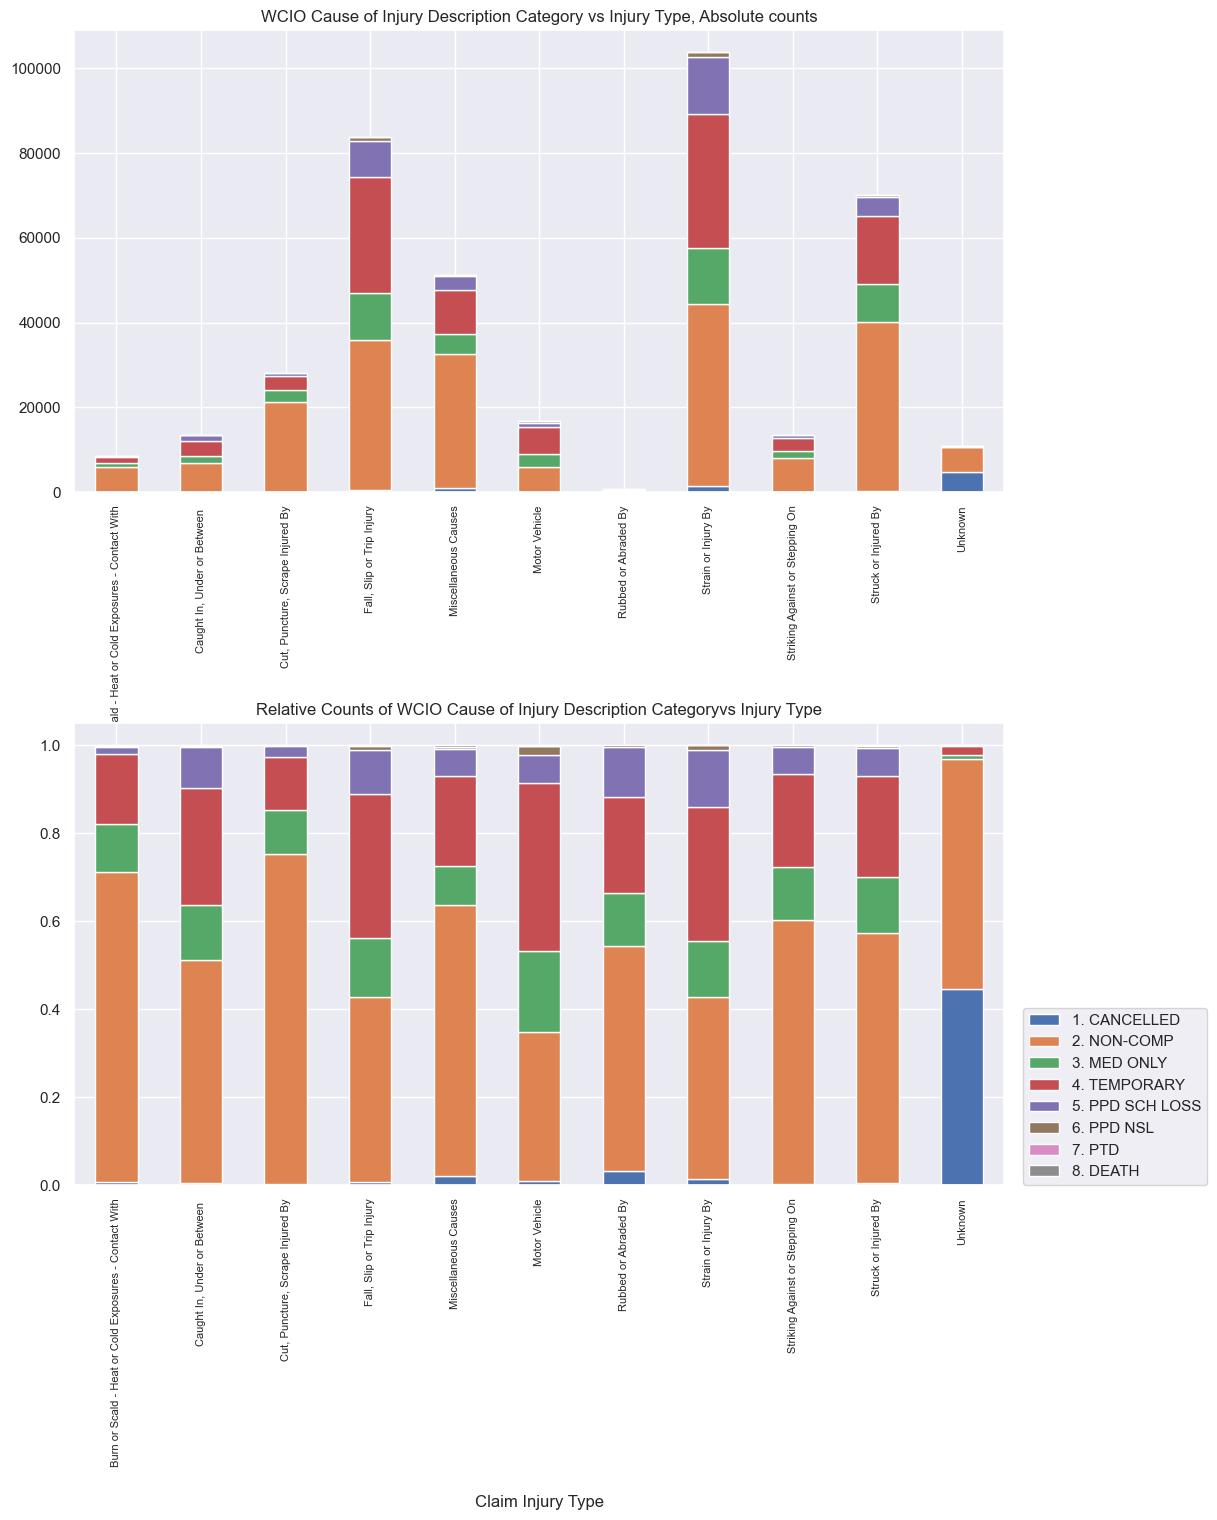

In [121]:
fig, axes = plt.subplots(2, 1, figsize=(12, 15))

cat1 = 'WCIO Cause of Injury Description Category'
cat2 = 'Claim Injury Type'

#absolute counts
catpc_df = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Cause of Injury Description Category vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False)  # Hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

#relative counts
catpc_df2 = X_train.join(target_train).groupby([cat1, cat2])[cat2].size() / X_train.join(target_train).groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Cause of Injury Description Categoryvs Injury Type")
axes[1].legend(loc=(1.02, 0))  # Reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type", labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)
plt.savefig('WCIO_CAUSE.png')
plt.subplots_adjust(hspace=0.5)
plt.show()

- The most common category is the Strain or Injury, followed by the Fall, Slip or Trip Injury
-  The "Unkown" category has the most "Cancelled" claim injury type for the Cause of Injury 

### Days Between Assembly and Accident Date
- *Days Between* :  How many days between he date the claim was first assembled and the injury date

In [122]:
X_train['Diff_days_assembly_accident'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

In [123]:
round(X_train[X_train['Diff_days_assembly_accident']<0].shape[0]/X_train.shape[0]*100, 2)

0.25

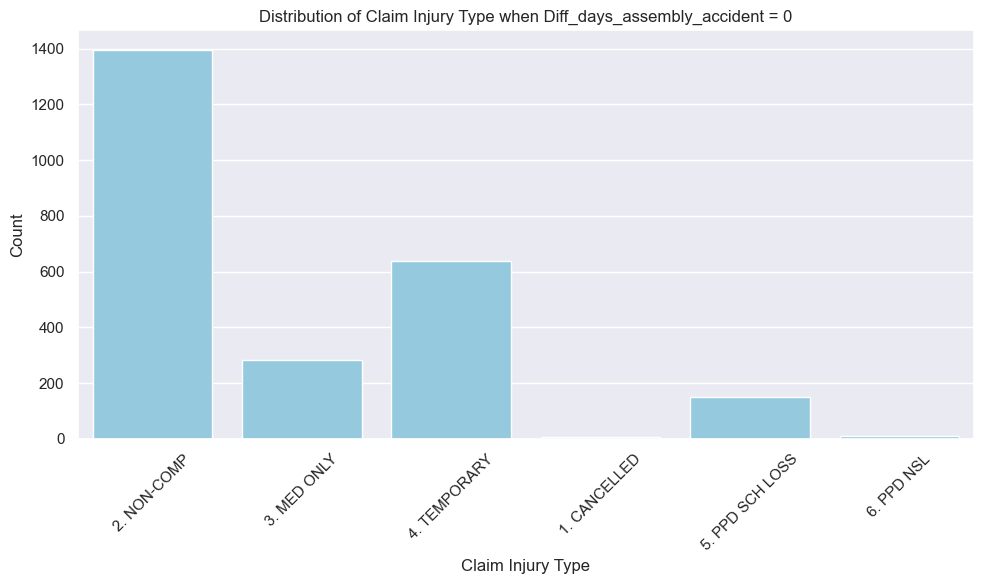

In [124]:

# Diff_days_assembly_accident equal to 0
diff_days_equal_zero = X_train.join(target_train)[X_train.join(target_train)['Diff_days_assembly_accident'] == 0]

fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=diff_days_equal_zero, x='Claim Injury Type', color='skyblue', ax=ax)
ax.set_title('Distribution of Claim Injury Type when Diff_days_assembly_accident = 0')
ax.set_xlabel('Claim Injury Type')
ax.set_ylabel('Count')
ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

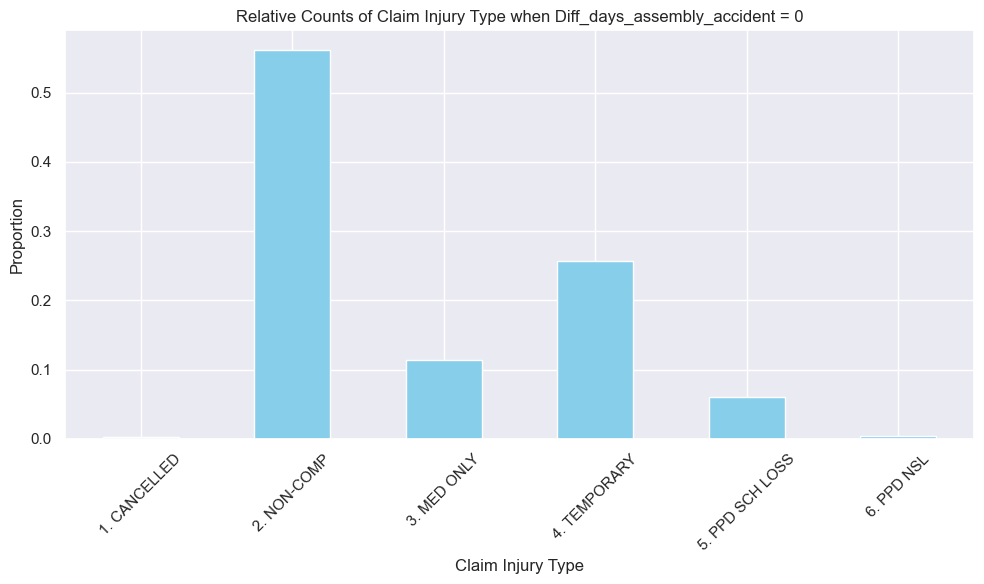

In [125]:
diff_days_equal_zero = X_train.join(target_train)[X_train.join(target_train)['Diff_days_assembly_accident'] == 0]

size= diff_days_equal_zero.groupby('Claim Injury Type').size()

diff_days_zero_relative = size / size.sum()

fig, ax = plt.subplots(figsize=(10, 6))
diff_days_zero_relative.plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Relative Counts of Claim Injury Type when Diff_days_assembly_accident = 0')
ax.set_xlabel('Claim Injury Type')
ax.set_ylabel('Proportion')
ax.tick_params(axis='x', labelrotation=45)
plt.savefig('diff_assembly_equalto0.png')

plt.tight_layout()
plt.show()

More than 50% of the Diff_Days_assembly_accident equal to zero, represent the "2. NON-Comp" claim Injury type

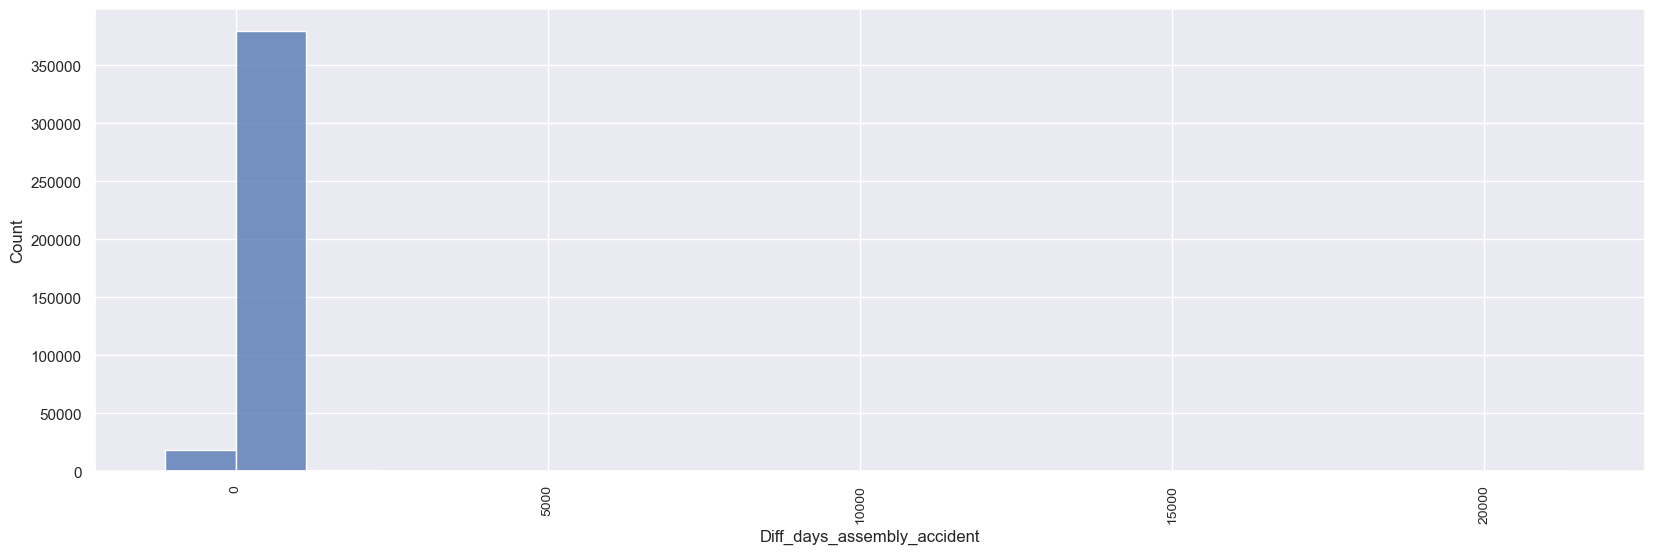

In [126]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.histplot(data=X_train, x="Diff_days_assembly_accident", bins=20)
plt.xticks(rotation=90, fontsize="small")
plt.show()

In [127]:
X_train['Diff_days_assembly_accident'].min()

-1127

In [128]:
X_train['Diff_days_assembly_accident'].max()

21439

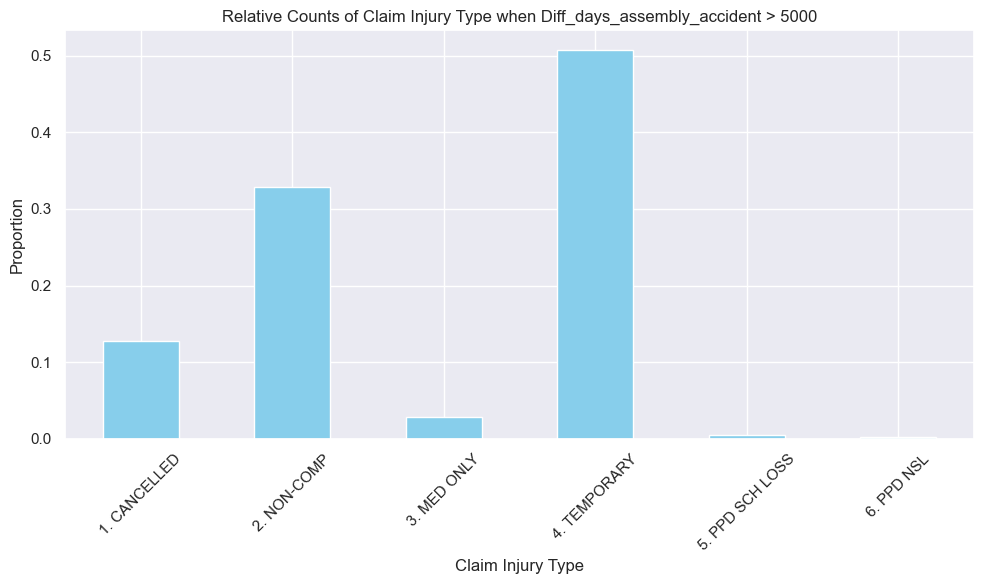

In [129]:
diff_days_equal_zero = X_train.join(target_train)[X_train.join(target_train)['Diff_days_assembly_accident'] > 5000]

size= diff_days_equal_zero.groupby('Claim Injury Type').size()

diff_days_zero_relative = size / size.sum()

fig, ax = plt.subplots(figsize=(10, 6))
diff_days_zero_relative.plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Relative Counts of Claim Injury Type when Diff_days_assembly_accident > 5000')
ax.set_xlabel('Claim Injury Type')
ax.set_ylabel('Proportion')
ax.tick_params(axis='x', labelrotation=45)
plt.savefig('diff_assembly_bigger_5000.png')

plt.tight_layout()
plt.show()

Around 50% of when the Diff_days_assembly_accident is higher than 5000, represents the "4. TEMPORARY" claim injury type.

In [130]:
X_train[X_train['Diff_days_assembly_accident'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,has_c3_date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,has_first_hearing_date,Gender,has_ime,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,WCIO Part of Body Description Category,WCIO Nature of Injury Description Category,WCIO Cause of Injury Description Category,Diff_days_assembly_accident
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6129914,2023-02-22,40,N,2022-11-10,1,0.00,1982,2022-11-15,1,STATE INSURANCE FUND,2A. SIF,QUEENS,0,STATEWIDE,1,M,1,23.0,CONSTRUCTION,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,-9.0,MULTIPLE,11414,6,Multiple Body Parts,Specific Injury,Strain or Injury By,-104
5409997,2020-02-03,55,N,2020-01-23,1,2524.06,1964,2020-10-25,1,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,NASSAU,0,NYC,1,M,1,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,32.0,ELBOW,UNKNOWN,2,Upper Extremities,Occupational Disease or Cumulative Injury,Strain or Injury By,-11
5617069,2021-02-17,57,N,2020-12-14,1,2800.00,1963,2021-05-18,1,ACE AMERICAN INSURANCE CO.,1A. PRIVATE,NASSAU,0,NYC,1,M,1,23.0,CONSTRUCTION,IV,98.0,"CUMULATIVE, NOC",52.0,STRAIN OR TEAR,35.0,HAND,11003,3,Upper Extremities,Specific Injury,Miscellaneous Causes,-65
5543432,2020-11-01,63,N,2020-08-24,1,2420.46,1957,2020-08-27,1,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,KINGS,0,NYC,1,M,1,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),11208,3,Head,Specific Injury,Miscellaneous Causes,-69
5863339,2022-01-31,64,N,2021-11-22,1,1550.08,1957,2021-12-01,1,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,NASSAU,0,NYC,1,M,0,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),11801,4,Head,Specific Injury,Miscellaneous Causes,-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845776,2021-12-13,56,N,2021-10-29,1,0.00,1965,2021-11-04,1,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,SUFFOLK,0,NYC,1,M,1,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",51.0,HIP,11762,6,Lower Extremities,Occupational Disease or Cumulative Injury,Miscellaneous Causes,-45
5435976,2020-04-15,56,N,2020-02-24,1,2683.00,1963,2021-08-13,1,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,ORANGE,0,ALBANY,1,M,1,92.0,PUBLIC ADMINISTRATION,III,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",35.0,HAND,10969,0,Upper Extremities,Occupational Disease or Cumulative Injury,Strain or Injury By,-51
5748910,2021-07-07,57,N,2021-06-21,1,3131.52,1964,2021-06-21,0,NATIONAL GRID USA,4A. SELF PRIVATE,HERKIMER,0,SYRACUSE,1,M,1,22.0,UTILITIES,I,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,30.0,MULTIPLE UPPER EXTREMITIES,13340.0,3,Upper Extremities,Specific Injury,Strain or Injury By,-16


In [131]:
negative_days=X_train[X_train['Diff_days_assembly_accident'] < 0].shape[0]
print(f"There are claims where the `Accident Date` happened after the `Assembly Date`, only \033[1;36m{negative_days}\033[1;0m rows")

There are claims where the `Accident Date` happened after the `Assembly Date`, only 1019 rows


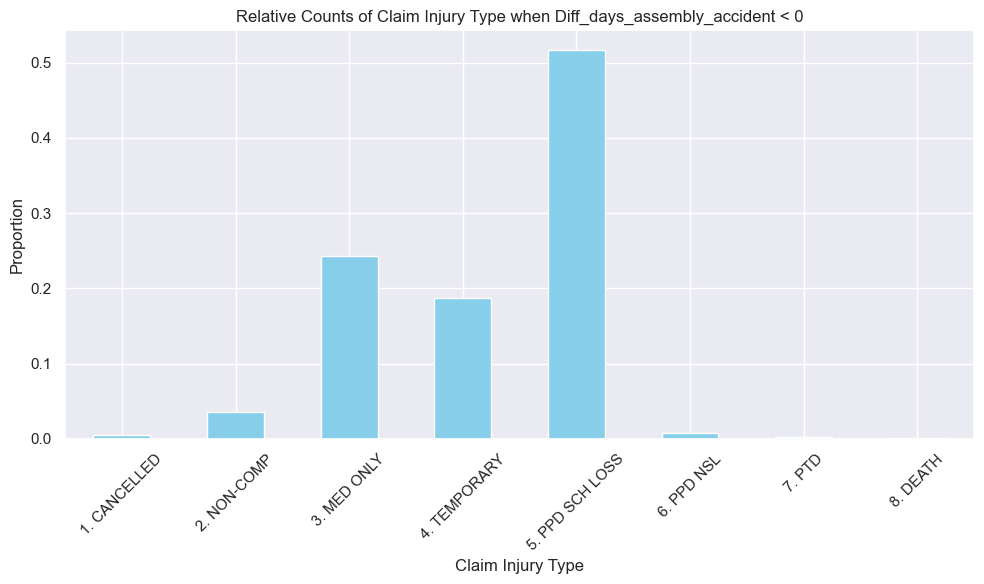

In [132]:
diff_days_equal_zero = X_train.join(target_train)[X_train.join(target_train)['Diff_days_assembly_accident'] < 0]

size= diff_days_equal_zero.groupby('Claim Injury Type').size()

diff_days_zero_relative = size / size.sum()

fig, ax = plt.subplots(figsize=(10, 6))
diff_days_zero_relative.plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Relative Counts of Claim Injury Type when Diff_days_assembly_accident < 0')
ax.set_xlabel('Claim Injury Type')
ax.set_ylabel('Proportion')
ax.tick_params(axis='x', labelrotation=45)
plt.savefig('diff_assembly_smaller0.png')

plt.tight_layout()
plt.show()

Around 50% of when Diff_days_assembly_accident is lower than 0, represent the claim injury type "5. PPD SCH LOSS"

In [133]:
X_train[X_train['Diff_days_assembly_accident'] < 0]["Attorney/Representative"].value_counts(normalize=True)*100

Attorney/Representative
1    91.85476
0     8.14524
Name: proportion, dtype: Float64

    Val Data

In [134]:
X_val['Diff_days_assembly_accident'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

    Test Data

In [135]:
employees_test['Diff_days_assembly_accident'] = (employees_test['Assembly Date'] - employees_test['Accident Date']).dt.days

### Average Weekly Wage Log

Since Average Weekly Wage is very skewed, getting the Average Weekly Wage log will allow us to better visualize the feature

**Average Weekly Wage- Train Data**

In [136]:
X_train.loc[:,'Average Weekly Wage log'] = np.log1p(X_train['Average Weekly Wage'])

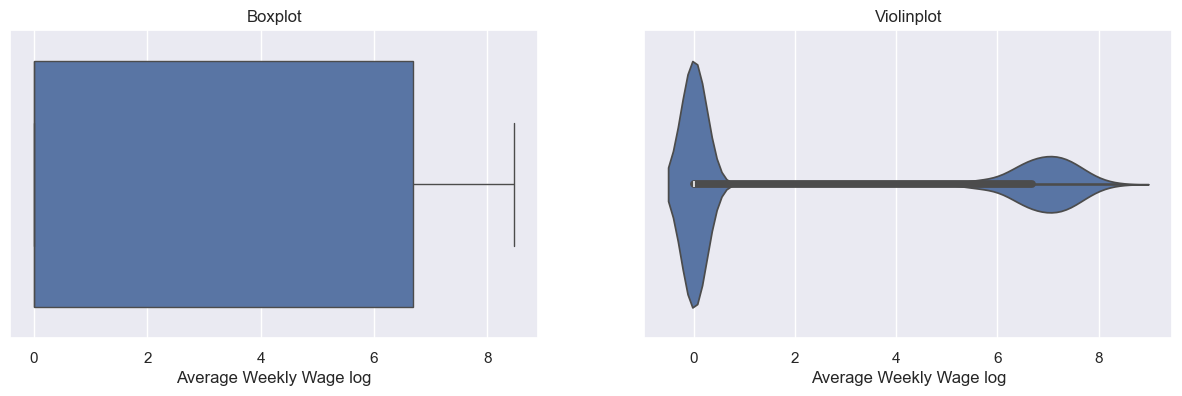

In [137]:
# Apply log transformation
fig, axes = plt.subplots(1,2, figsize=(15, 4))

sns.boxplot(x=X_train['Average Weekly Wage log'], ax=axes[0])
axes[0].set_title("Boxplot")


sns.violinplot(x=X_train['Average Weekly Wage log'],ax=axes[1])
axes[1].set_title("Violinplot")
plt.savefig('log_wage.png')
plt.show()

**Average Weekly Wage- Val Data**

In [138]:
X_val.loc[:,'Average Weekly Wage log'] = np.log1p(X_val['Average Weekly Wage'])

**Average Weekly Wage log- Test Data**

In [139]:
employees_test.loc[:,'Average Weekly Wage log'] = np.log1p(employees_test['Average Weekly Wage'])

### Average Weekly Wage categories


Discretisizing the Average Weekly Wage feature into Wage categories.

In [140]:

def aww_discret(df, column, bins, labels, new_column_name):
    df[new_column_name] = pd.cut(
        df[column],
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    return df

In [141]:
bins = [-0.1,0, 500, 1000, 2000, float('inf')]
labels = ["Zero",'Very Low', 'Low', 'Medium', 'High']

X_train = aww_discret(df=X_train, column='Average Weekly Wage', bins=bins, labels=labels, new_column_name='AWW_Category')

In [142]:
print(X_train['AWW_Category'].value_counts(dropna=False))

AWW_Category
Zero        254567
Medium       61181
Low          50273
High         17940
Very Low     17261
Name: count, dtype: int64


In [143]:
X_train['AWW_Category']= X_train['AWW_Category'].astype("object")

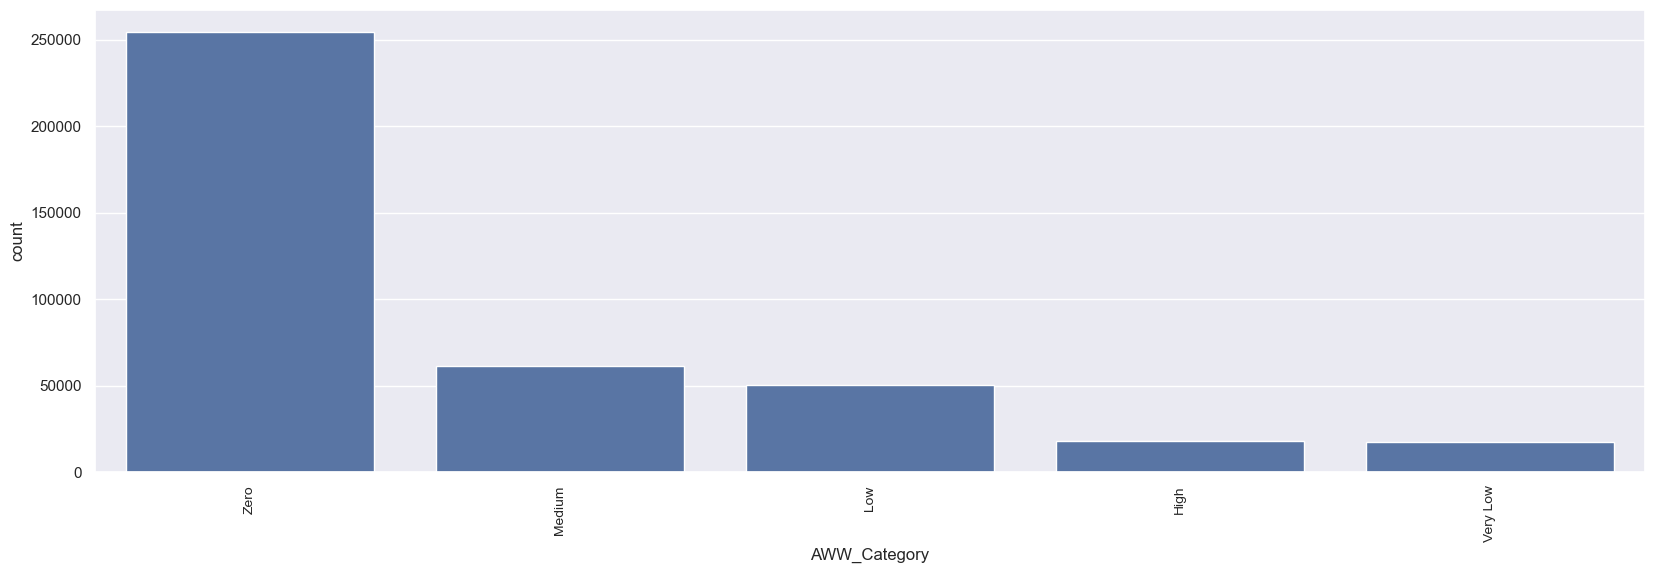

In [144]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=X_train, x="AWW_Category", ax=axes, 
              order=X_train["AWW_Category"].value_counts(ascending=False).index.unique())
plt.xticks(rotation=90, fontsize="small")
plt.savefig('aww_cat.png')
plt.show()

AWW_Category Zero has the most number of entries.

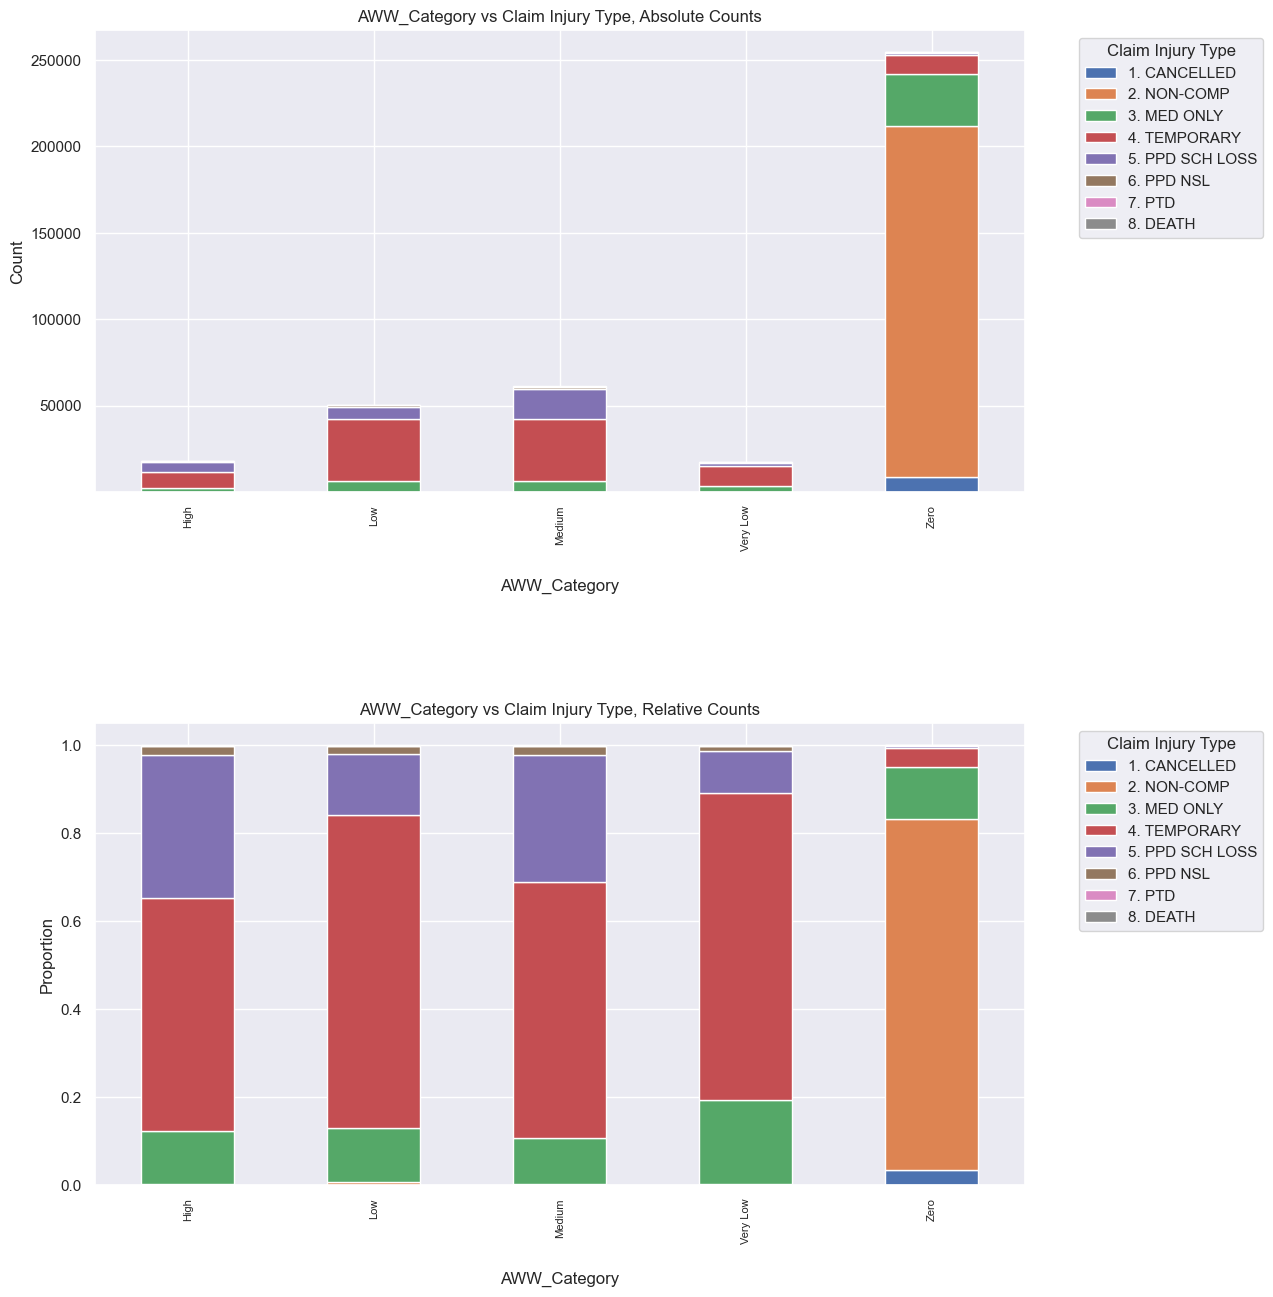

In [145]:

cat1 = 'AWW_Category' 
cat2 = 'Claim Injury Type'

absolute_counts = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()

relative_counts = absolute_counts.div(absolute_counts.sum(axis=1), axis=0)

fig, axes = plt.subplots(2, 1, figsize=(12, 15))

# Plot absolute counts
absolute_counts.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title(f'{cat1} vs {cat2}, Absolute Counts')
axes[0].set_xlabel(cat1, labelpad=20)
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[0].legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot relative counts
relative_counts.plot.bar(stacked=True, ax=axes[1])
axes[1].set_title(f'{cat1} vs {cat2}, Relative Counts')
axes[1].set_xlabel(cat1, labelpad=20)
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[1].legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('awwwcat_cit.png')

plt.subplots_adjust(hspace=0.5)
plt.show()



The "2. NON-COMP" Injury Type is the most dominant one in the AWWW_Category_ZERO, the AWW_Category with the most entries.

In [146]:
absolute_counts

Claim Injury Type,1. CANCELLED,2. NON-COMP,3. MED ONLY,4. TEMPORARY,5. PPD SCH LOSS,6. PPD NSL,7. PTD,8. DEATH
AWW_Category,,,,,,,,
High,1,45,2141,9516,5832,360,12,33
Low,34,300,6222,35707,6964,940,21,85
Medium,19,131,6433,35582,17609,1268,27,112
Very Low,11,48,3297,12012,1652,217,5,19
Zero,8652,203066,30035,10914,1666,155,3,76


**Validation data**

In [147]:
X_val = aww_discret(df=X_val, column='Average Weekly Wage', bins=bins, labels=labels, new_column_name='AWW_Category')

In [148]:
X_val['AWW_Category']= X_val['AWW_Category'].astype("object")

**Test Data**

In [149]:
employees_test = aww_discret(df=employees_test, column='Average Weekly Wage', bins=bins, labels=labels, new_column_name='AWW_Category')

In [150]:
employees_test['AWW_Category']= employees_test['AWW_Category'].astype("object")

### Age at Injury Categories

In [151]:
bins_age_injury = [0, 17, 24, 34, 44, 54, 64, float('inf')] 
labels_age_injury = ['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

X_train['age_injury_group'] = pd.cut(X_train['Age at Injury'], bins=bins_age_injury, labels=labels_age_injury, right=True)


In [152]:
X_train['age_injury_group'].value_counts()

age_injury_group
25-34    92320
45-54    87299
35-44    86907
55-64    76001
18-24    39622
65+      17529
< 18      1544
Name: count, dtype: int64

In [153]:
X_train['age_injury_group']= X_train['age_injury_group'].astype("object")

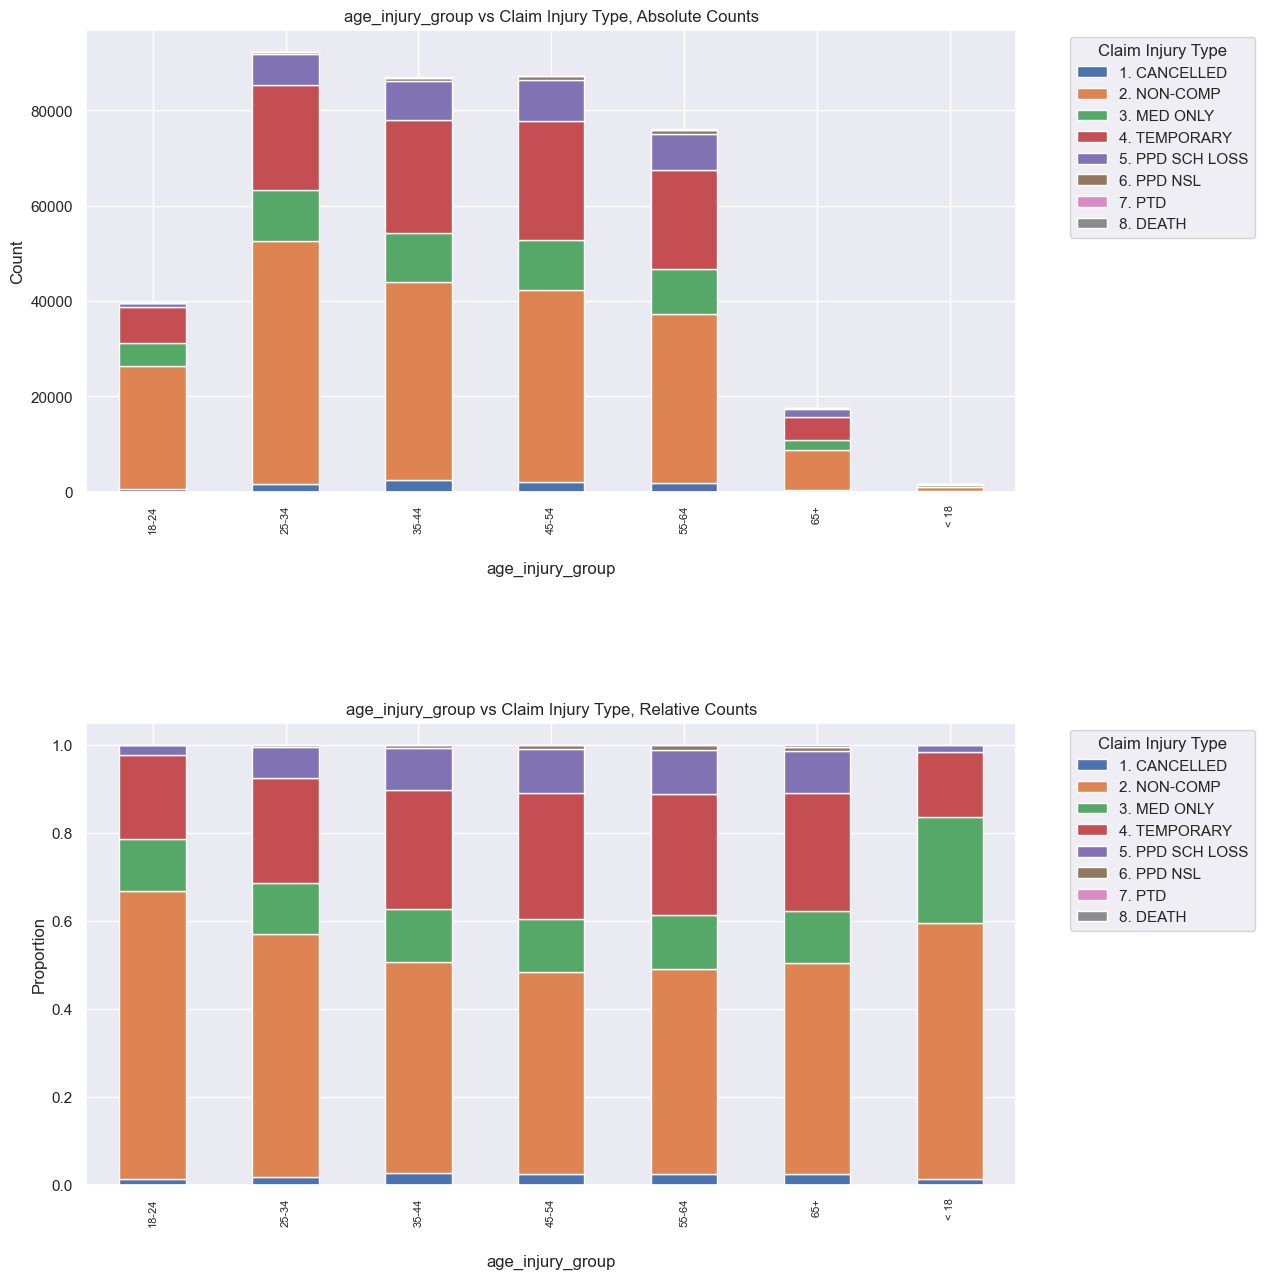

In [154]:
cat1 = 'age_injury_group' 
cat2 = 'Claim Injury Type'

absolute_counts = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()

relative_counts = absolute_counts.div(absolute_counts.sum(axis=1), axis=0)

fig, axes = plt.subplots(2, 1, figsize=(12, 15))

# Plot absolute counts
absolute_counts.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title(f'{cat1} vs {cat2}, Absolute Counts')
axes[0].set_xlabel(cat1, labelpad=20)
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[0].legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot relative counts
relative_counts.plot.bar(stacked=True, ax=axes[1])
axes[1].set_title(f'{cat1} vs {cat2}, Relative Counts')
axes[1].set_xlabel(cat1, labelpad=20)
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[1].legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('age_group_cit.png')

plt.subplots_adjust(hspace=0.5)
plt.show()

**Validation Data**

In [155]:
X_val['age_injury_group'] = pd.cut(X_val['Age at Injury'], bins=bins_age_injury, labels=labels_age_injury, right=True)


In [156]:
X_val['age_injury_group']= X_val['age_injury_group'].astype("object")

**Test Data**

In [157]:
employees_test['age_injury_group'] = pd.cut(employees_test['Age at Injury'], bins=bins_age_injury, labels=labels_age_injury, right=True)


In [158]:
employees_test['age_injury_group']= employees_test['age_injury_group'].astype("object")

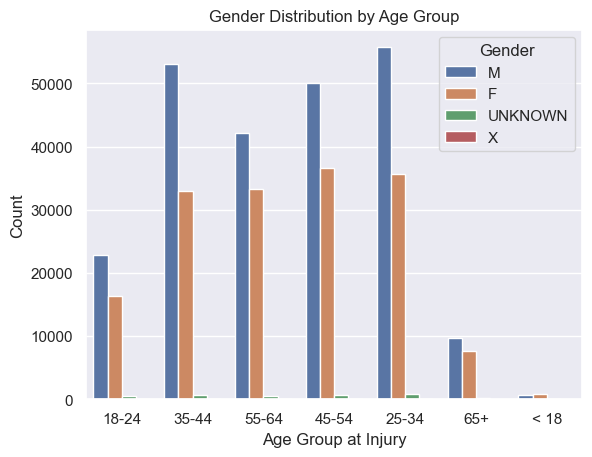

In [159]:
sns.countplot(data=X_train, x='age_injury_group', hue='Gender')
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group at Injury')
plt.ylabel('Count')
plt.savefig('gender_age.png')

plt.show()

### Zip Codes Aggregation

In [160]:
def zip_code_characteristic(zip_code):

    result = ""
    zip_code = str(zip_code).strip()

    if zip_code == "UNKNOWN":
        result= "UNKNOWN"
    
    elif zip_code.isalpha() :
        result= "ONLY_LETTERS"
        
    elif zip_code.isdigit():
        result= "ONLY_NUMBERS"
        
    elif '.' in zip_code and zip_code.replace('.', '').isdigit():
        result= "DECIMAL_POINT"
        
    elif zip_code.isalnum():
        result= "LETTERS_NUMBERS"

    elif any(c.isspace() for c in zip_code) and any(c.isalpha() for c in zip_code) and any(c.isdigit() for c in zip_code):
            result= "LETTERS_NUMBERS_WHITESPACE"
        
    else:
        result= "OTHER"
        
    return result
    

**`Classify the Zip Codes by their main charactheristic`**

In [161]:
X_train["Zip_Main_Characteristic"] = X_train["Zip Code"].apply(zip_code_characteristic)

In [162]:
X_train["Zip_Main_Characteristic"].value_counts(normalize=True)*100

Zip_Main_Characteristic
ONLY_NUMBERS                  92.354856
UNKNOWN                        4.971313
DECIMAL_POINT                  2.617005
LETTERS_NUMBERS                0.044614
LETTERS_NUMBERS_WHITESPACE     0.009970
ONLY_LETTERS                   0.001495
OTHER                          0.000748
Name: proportion, dtype: float64

**`Classify the Zip Codes of the test data by their main charactheristic`**

In [163]:
X_val["Zip_Main_Characteristic"] = X_val["Zip Code"].apply(zip_code_characteristic)

**`Classify the Zip Codes of the validation data by their main charactheristic`**

In [164]:
employees_test["Zip_Main_Characteristic"] = employees_test["Zip Code"].apply(zip_code_characteristic)

**`Classify the numeric Zip Codes by their first digit`**

In [165]:
def zip_classification_for_aggregation(zip_code, characteristic):

    result = ""
    if characteristic == "ONLY_NUMBERS":
        first_char = zip_code[0] 
        if first_char.isdigit():  
            result = first_char  
    elif characteristic == "UNKNOWN":
        result= "UNKNOWN" 
    else:
        result= "NON_NUMERIC"  
    return result

In [166]:
X_train['Classification_Zip_Code'] = X_train.apply(lambda row: zip_classification_for_aggregation(row['Zip Code'], row['Zip_Main_Characteristic']), axis=1)


In [167]:
X_train['Classification_Zip_Code'].value_counts(normalize=True)*100

Classification_Zip_Code
1              87.811486
UNKNOWN         4.971313
0               3.087817
NON_NUMERIC     2.673831
3               0.611631
2               0.348186
9               0.127112
7               0.124370
4               0.086984
8               0.082249
6               0.043118
5               0.031903
Name: proportion, dtype: float64

**`Classify the Numeric Zip Codes in the validation data by their main charactheristic`**

In [168]:
X_val['Classification_Zip_Code'] = X_val.apply(lambda row: zip_classification_for_aggregation(row['Zip Code'], row['Zip_Main_Characteristic']), axis=1)

**`Classify the Numeric Zip Codes in the test data by their main charactheristic`**

In [169]:
employees_test['Classification_Zip_Code'] = employees_test.apply(lambda row: zip_classification_for_aggregation(row['Zip Code'], row['Zip_Main_Characteristic']), axis=1)

## Accident Date and Assembly Date  into months and years

### Accident Year, Month and Weekday

**`Accident Year`**

In [170]:
X_train["Accident_Year"] = pd.to_numeric(X_train["Accident Date"].dt.year, errors="coerce").astype("Int64")

**Validation Data**

In [171]:
X_val["Accident_Year"] = pd.to_numeric(X_val["Accident Date"].dt.year, errors="coerce").astype("Int64")

**Test Data**

In [172]:
employees_test["Accident_Year"] = pd.to_numeric(employees_test["Accident Date"].dt.year, errors="coerce").astype("Int64")

In [173]:
pd.DataFrame(X_train["Accident_Year"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Accident_Year,401222.0,2020.829533,1.841825,1961.0,2020.0,2020.0,2021.0,2022.0,2022.0,2022.0,2023.0


In [174]:
X_train["Accident_Year"].value_counts(normalize=True, ascending=False).head(5)*100

Accident_Year
2021    33.275095
2022    32.574983
2020    30.500072
2019     2.508337
2018     0.209859
Name: proportion, dtype: Float64

**`Accident Month`**
- To analyse if there is particular months with more injuries, it would be interesting to observe if near Christmas or Summer we notice more injuries than the normal

In [175]:
X_train["Accident_Month"] = pd.to_numeric(X_train["Accident Date"].dt.month, errors="coerce").astype("Int64")

**Validation Data**

In [176]:
X_val["Accident_Month"] = pd.to_numeric(X_val["Accident Date"].dt.month, errors="coerce").astype("Int64")

**Test Data**

In [177]:
employees_test["Accident_Month"] = pd.to_numeric(employees_test["Accident Date"].dt.month, errors="coerce").astype("Int64")

In [178]:
X_train["Accident_Month"].value_counts()

Accident_Month
3     35834
10    34961
1     34760
7     34461
9     34454
8     34373
6     33765
2     33753
12    33555
11    31571
5     30214
4     29521
Name: count, dtype: Int64

In [179]:
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

In [180]:
pd.DataFrame(X_train["Accident_Month"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Accident_Month,401222.0,6.498547,3.465593,1.0,2.0,3.0,7.0,9.0,11.0,12.0,12.0


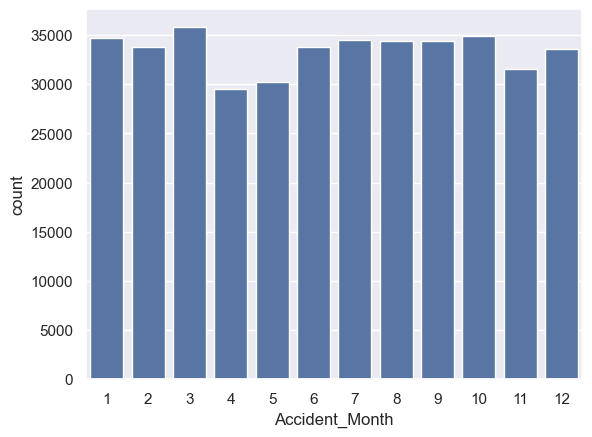

In [181]:
sns.countplot(data=X_train[X_train["Accident_Month"].notna()], x="Accident_Month")
plt.savefig('accident_month.png')

The distribution of accidents per month do not seem to differ much, having April is the month with the least accidents, besides not being so different from the other months.

`Accident Month VS Industry Code`

In [182]:
industry_month_counts = X_train.groupby(["Industry Code Description", "Accident_Month"]).size().reset_index(name="Accident_Month_Count")

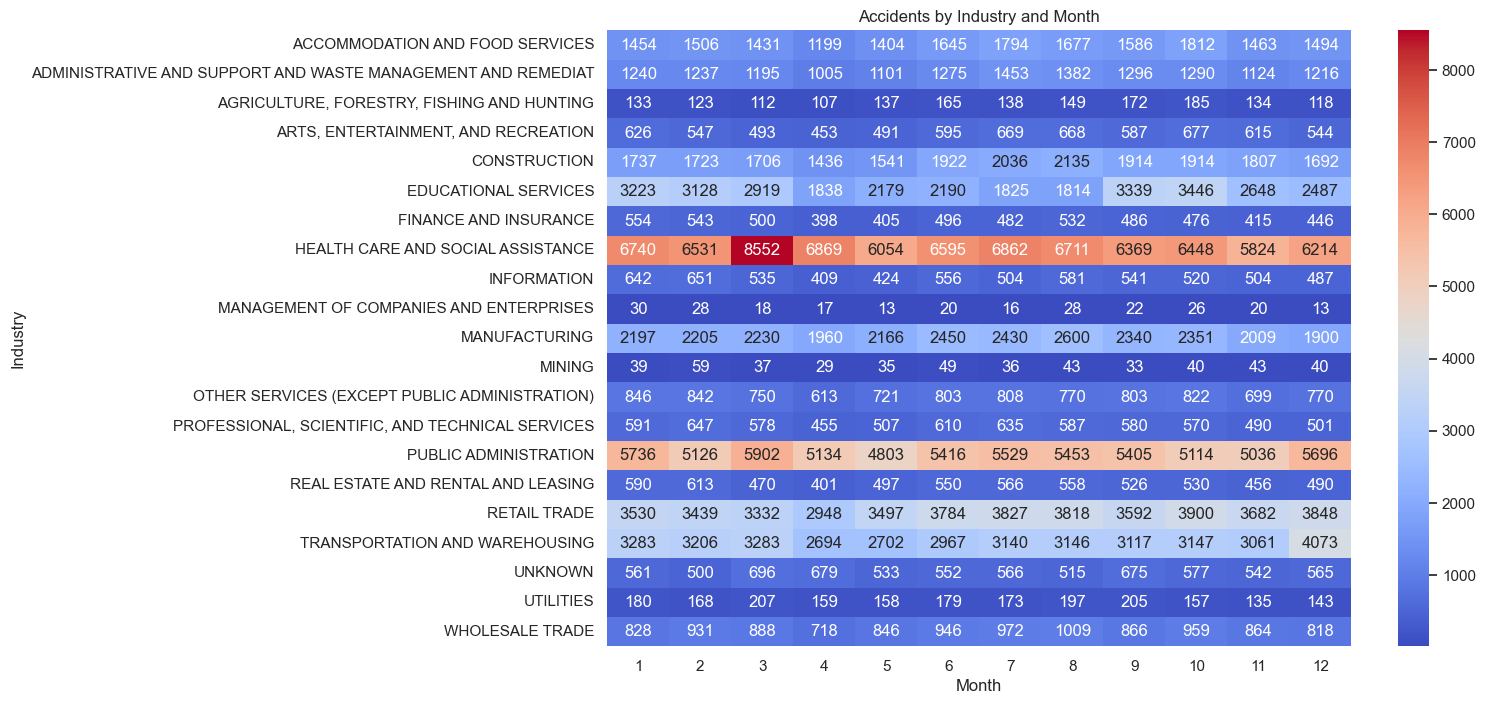

In [183]:
heatmap_industry_month_counts = industry_month_counts.pivot(index="Industry Code Description", columns="Accident_Month", values="Accident_Month_Count")


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_industry_month_counts, cmap="coolwarm", annot=True, fmt=".0f", cbar=True)
plt.title("Accidents by Industry and Month")
plt.xlabel("Month")
plt.ylabel("Industry")
plt.show()

- The month that appears to have the most accidents for the HEALTH CARE AND ENTERPRISES Industry, is March.

**`Accident Day of the week`**
- Analyse if at the end of the week with possible fatigue there are more injuries


In [184]:
X_train['Accident_Day_Of_Week'] = X_train['Accident Date'].dt.day_name()

**Validation Data**

In [185]:
X_val['Accident_Day_Of_Week'] = X_val['Accident Date'].dt.day_name()

**Test Data**

In [186]:
employees_test['Accident_Day_Of_Week'] = employees_test['Accident Date'].dt.day_name()

In [187]:
X_train['Accident_Day_Of_Week'].value_counts()

Accident_Day_Of_Week
Tuesday      70390
Wednesday    69481
Monday       68226
Thursday     67741
Friday       62842
Saturday     33493
Sunday       29049
Name: count, dtype: int64

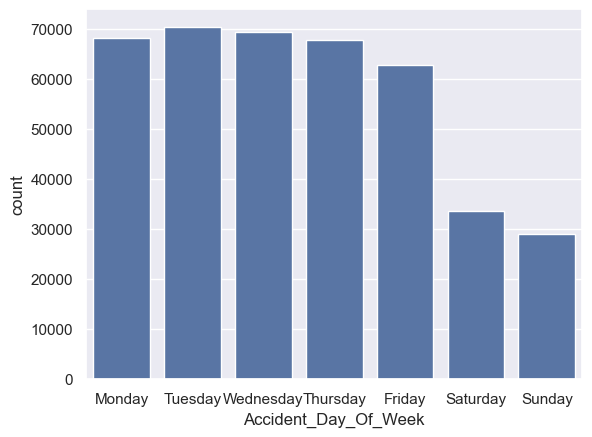

In [188]:
sns.countplot(data=X_train[X_train["Accident_Day_Of_Week"].notna()], x="Accident_Day_Of_Week", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.savefig('accidetn_day.png')


As most people work during the weekdays, it could only make sense that most of the accidents happen during those days.

### Assembly Year, Month and Weekday 

**`Assembly Year`**

In [189]:
X_train["Assembly_Year"] = pd.to_numeric(X_train["Assembly Date"].dt.year, errors="coerce").astype("Int64")

**Validation Data**

In [190]:
X_val["Assembly_Year"] = pd.to_numeric(X_val["Assembly Date"].dt.year, errors="coerce").astype("Int64")

**Test Data**

In [191]:
employees_test["Assembly_Year"] = pd.to_numeric(employees_test["Assembly Date"].dt.year, errors="coerce").astype("Int64")

In [192]:
pd.DataFrame(X_train["Assembly_Year"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Assembly_Year,401222.0,2021.052053,0.81014,2020.0,2020.0,2020.0,2021.0,2022.0,2022.0,2022.0,2022.0


In [193]:
X_train["Assembly_Year"].value_counts(normalize=True, ascending=False)*100

Assembly_Year
2022    35.554381
2021    34.096585
2020    30.349034
Name: proportion, dtype: Float64

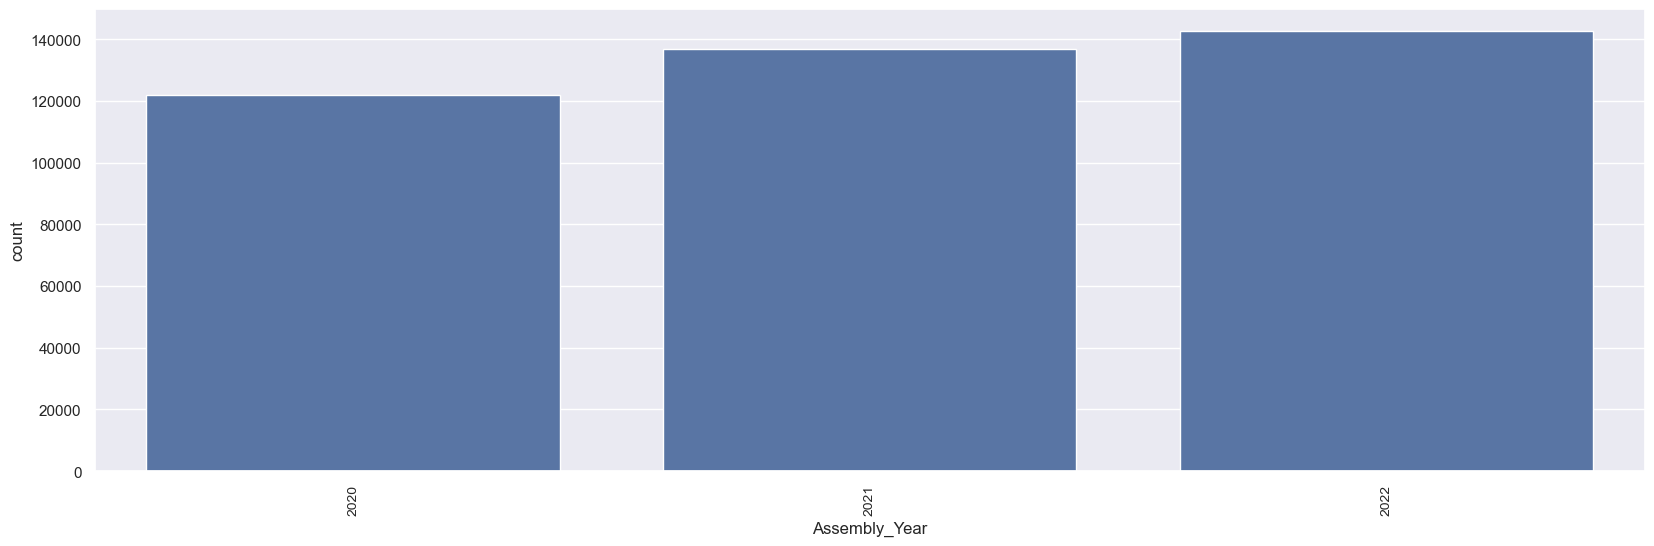

In [194]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.countplot(data=X_train[X_train["Assembly_Year"].notna()], x="Assembly_Year", ax=axes)
plt.xticks(rotation=90, fontsize="small")
plt.show()

**`Assembly Month`**
- To analyse if there is particular months with more injuries, it would be interesting to observe if near Christmas or Summer we notice more injuries than the normal

In [195]:
X_train["Assembly_Month"] = pd.to_numeric(X_train["Assembly Date"].dt.month, errors="coerce").astype("Int64")

**Validation Data**

In [196]:
X_val["Assembly_Month"] = pd.to_numeric(X_val["Assembly Date"].dt.month, errors="coerce").astype("Int64")

**Test Data**

In [197]:
employees_test["Assembly_Month"] = pd.to_numeric(employees_test["Assembly Date"].dt.month, errors="coerce").astype("Int64")

In [198]:
X_train["Assembly_Month"].value_counts()

Assembly_Month
8     35847
2     35073
3     34892
10    34754
9     34442
6     34107
7     33681
1     33238
12    32347
11    31573
5     31537
4     29731
Name: count, dtype: Int64

In [199]:
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

In [200]:
pd.DataFrame(X_train["Assembly_Month"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
Assembly_Month,401222.0,6.492264,3.443049,1.0,2.0,3.0,7.0,9.0,11.0,12.0,12.0


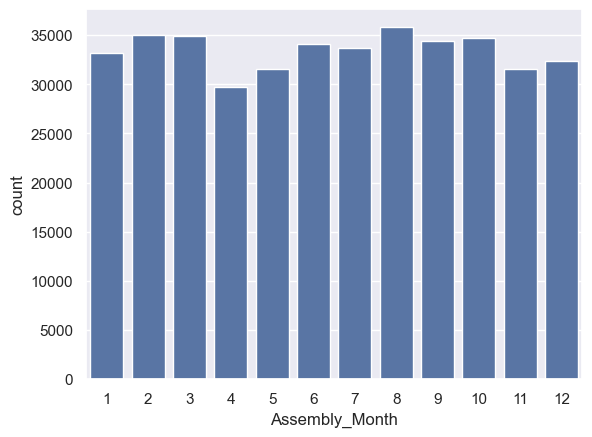

In [201]:
sns.countplot(data=X_train[X_train["Assembly_Month"].notna()], x="Assembly_Month")
plt.savefig('assembly_month.png')

`Assembly Month VS Industry Code`

In [202]:
industry_month_counts = X_train.groupby(["Industry Code Description", "Assembly_Month"]).size().reset_index(name="Assembly_Month_Count")

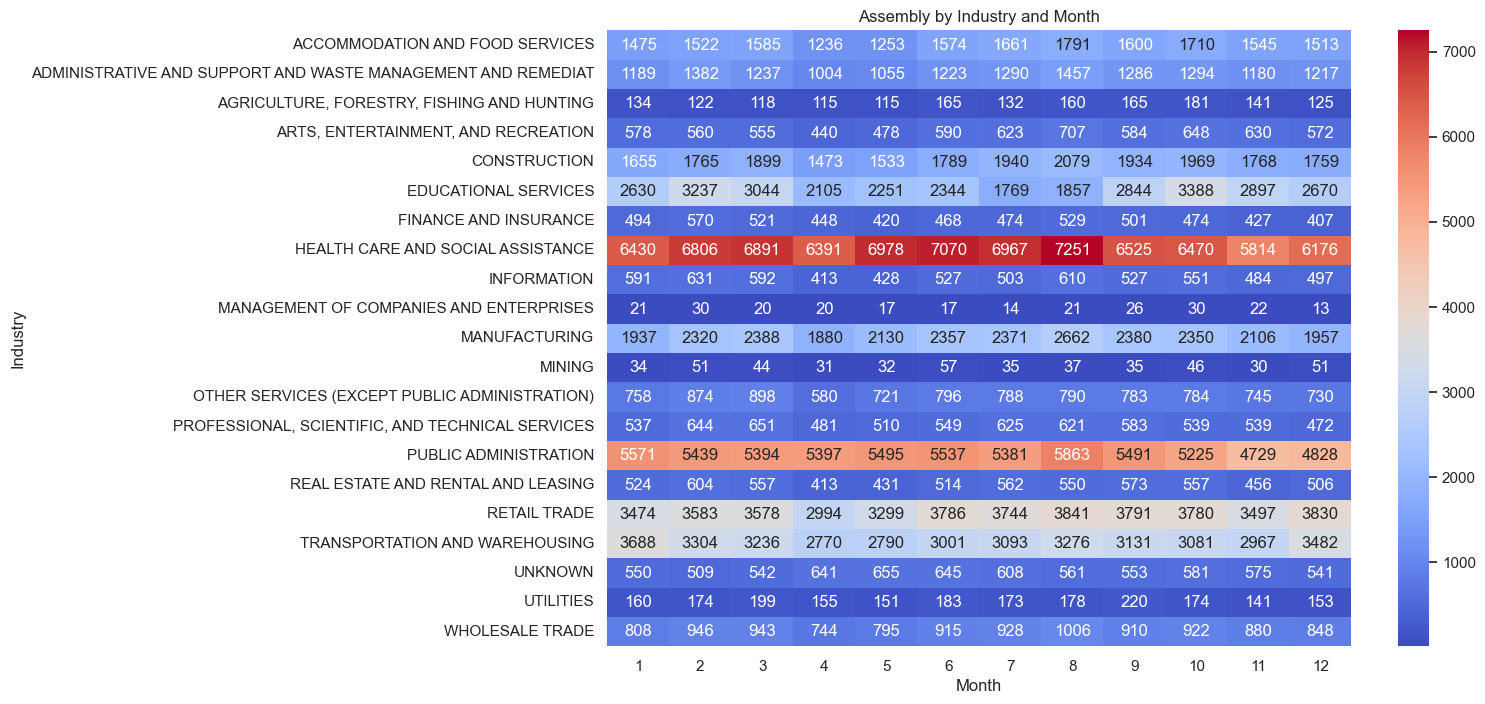

In [203]:
heatmap_industry_month_counts = industry_month_counts.pivot(index="Industry Code Description", columns="Assembly_Month", values="Assembly_Month_Count")

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_industry_month_counts, cmap="coolwarm", annot=True, fmt=".0f", cbar=True)
plt.title("Assembly by Industry and Month")
plt.xlabel("Month")
plt.ylabel("Industry")
plt.show()

**`Assembly Day of the week`**
- Analyse if at the end of the week with possible fatigue there are more injuries


In [204]:
X_train['Assembly_Day_Of_Week'] = X_train['Assembly Date'].dt.day_name()

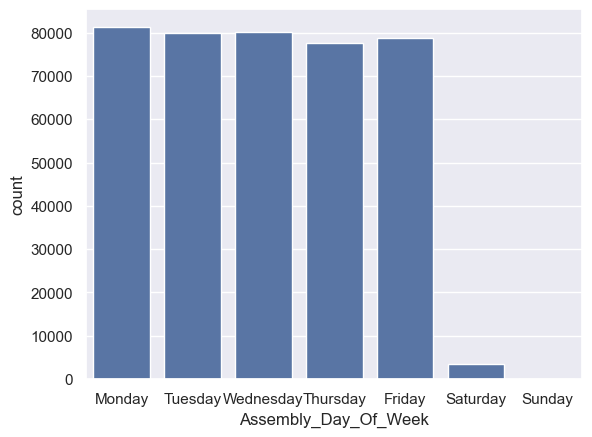

In [205]:
sns.countplot(data=X_train[X_train["Assembly_Day_Of_Week"].notna()], x="Assembly_Day_Of_Week", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.savefig('assembly_day.png')

**Validation Data**

In [206]:
X_val['Assembly_Day_Of_Week'] = X_val['Assembly Date'].dt.day_name()

**Test Data**

In [207]:
employees_test['Assembly_Day_Of_Week'] = employees_test['Assembly Date'].dt.day_name()

In [208]:
X_train['Assembly_Day_Of_Week'].value_counts()

Assembly_Day_Of_Week
Monday       81299
Wednesday    80136
Tuesday      79928
Friday       78724
Thursday     77645
Saturday      3414
Sunday          76
Name: count, dtype: int64

## C-2 Date

### Days Between C-2 Date and Accident Date

    Difference between C-2 Date and Accident Date

In [209]:
X_train['Diff_days_C2_Accident'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days

In [210]:
round(X_train[X_train['Diff_days_C2_Accident']<0].shape[0]/X_train.shape[0]*100, 2)

0.18

In [211]:
X_train['Diff_days_C2_Accident'].describe().round(2)

count    401222.00
mean         77.37
std         546.05
min       -8842.00
25%           5.00
50%          10.00
75%          28.00
max       21439.00
Name: Diff_days_C2_Accident, dtype: float64

- There are negative values, which does not make sense since the C-2 Date is the Date the Employer report of the Injury, which cannot happen without an Injury
- C-2 Date should not have a difference too high either

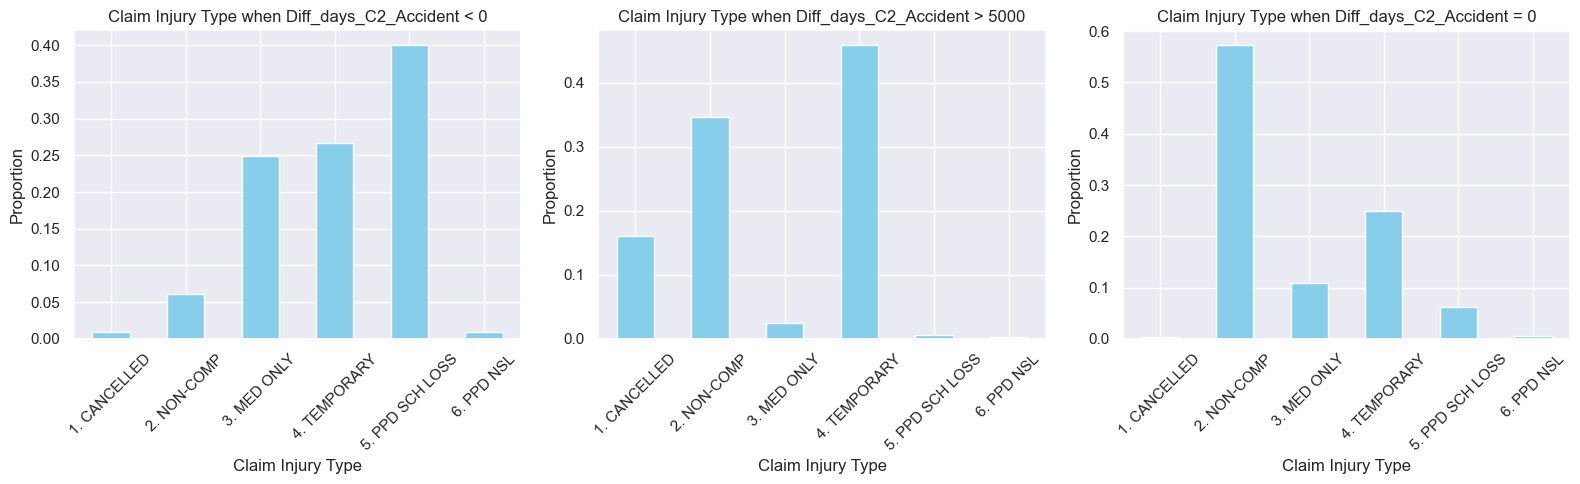

In [212]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True)

# Plot 1: Diff_days_C2_Accident < 0
diff_days_ = X_train.join(target_train)[X_train.join(target_train)['Diff_days_C2_Accident'] < 0]
size = diff_days_.groupby('Claim Injury Type').size()
diff_days_relative = size / size.sum()
diff_days_relative.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Claim Injury Type when Diff_days_C2_Accident < 0')
axes[0].set_ylabel('Proportion')
axes[0].tick_params(axis='x', labelrotation=45)

# Plot 2: Diff_days_C2_Accident > 5000
diff_days = X_train.join(target_train)[X_train.join(target_train)['Diff_days_C2_Accident'] > 5000]
size = diff_days.groupby('Claim Injury Type').size()
diff_days_relative = size / size.sum()
diff_days_relative.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Claim Injury Type when Diff_days_C2_Accident > 5000')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', labelrotation=45)

# Plot 3: Diff_days_C2_Accident == 0
diff_days = X_train.join(target_train)[X_train.join(target_train)['Diff_days_C2_Accident'] == 0]
size = diff_days.groupby('Claim Injury Type').size()
diff_days_relative = size / size.sum()
diff_days_relative.plot(kind='bar', color='skyblue', ax=axes[2])
axes[2].set_title('Claim Injury Type when Diff_days_C2_Accident = 0')
axes[2].set_xlabel('Claim Injury Type')
axes[2].set_ylabel('Proportion')
axes[2].tick_params(axis='x', labelrotation=45)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Diff_c2_subplots.png')
plt.show()


- The cases where the Difference was higher than 5000 days, was the case of the "4. TEMPORARY" claim injury type
- The cases where the Difference was 0, was the case of the "2. NON-COMP" claim injury type
- Claim Injury type "5. PPD SCH LOSS" has the most amount of entries when the difference between C-2 Date and Accident date is negative.

    Validation Data

In [213]:
X_val['Diff_days_C2_Accident'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days

    Test Data

In [214]:
employees_test['Diff_days_C2_Accident'] = (employees_test['C-2 Date'] - employees_test['Accident Date']).dt.days

### C-2 Year, Month and Weekday 

**`C-2 Year`**

In [215]:
X_train["C-2_Year"] = pd.to_numeric(X_train["C-2 Date"].dt.year, errors="coerce").astype("Int64")

**Validation Data**

In [216]:
X_val["C-2_Year"] = pd.to_numeric(X_val["C-2 Date"].dt.year, errors="coerce").astype("Int64")

**Test Data**

In [217]:
employees_test["C-2_Year"] = pd.to_numeric(employees_test["C-2 Date"].dt.year, errors="coerce").astype("Int64")

**`C-2 Month`**

In [218]:
X_train["C-2_Month"] = pd.to_numeric(X_train["C-2 Date"].dt.month, errors="coerce").astype("Int64")

**Validation Data**

In [219]:
X_val["C-2_Month"] = pd.to_numeric(X_val["C-2 Date"].dt.month, errors="coerce").astype("Int64")

**Test Data**

In [220]:
employees_test["C-2_Month"] = pd.to_numeric(employees_test["C-2 Date"].dt.month, errors="coerce").astype("Int64")

In [221]:
X_train["C-2_Month"].value_counts()

C-2_Month
8     36030
3     35684
10    35044
2     34926
9     34274
6     33858
1     33453
7     33271
12    32235
5     31933
11    31232
4     29282
Name: count, dtype: Int64

In [222]:
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

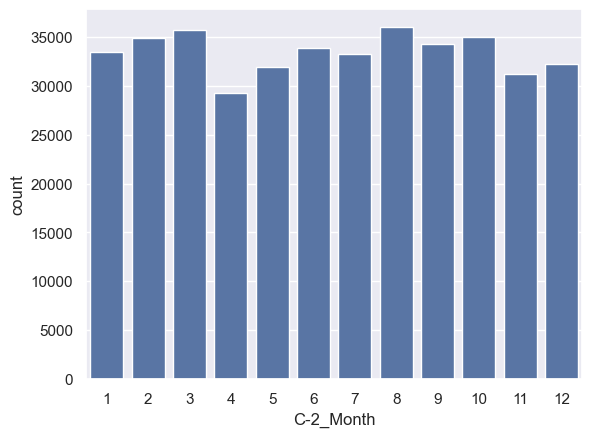

In [223]:
sns.countplot(data=X_train[X_train["C-2_Month"].notna()], x="C-2_Month")
plt.savefig('c2_.month.png')

**`C-2 Day of the week`**
- Analyse if at the end of the week with possible fatigue there are more injuries


In [224]:
X_train['C-2_Weekday'] = X_train['C-2 Date'].dt.day_name()

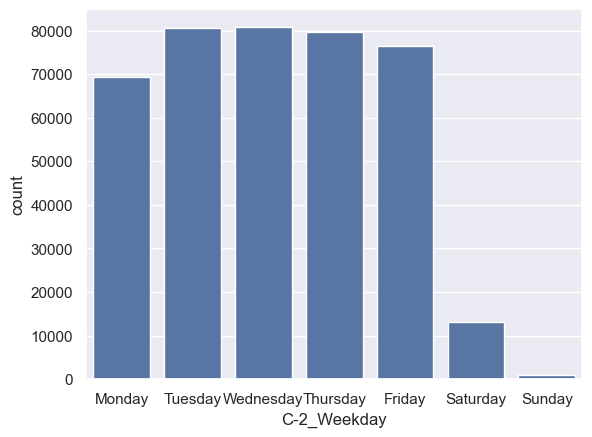

In [225]:
sns.countplot(data=X_train[X_train["C-2_Weekday"].notna()], x="C-2_Weekday", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.savefig('c2_day.png')


**Validation Data**

In [226]:
X_val['C-2_Weekday'] = X_val['C-2 Date'].dt.day_name()

**Test Data**

In [227]:
employees_test['C-2_Weekday'] = employees_test['C-2 Date'].dt.day_name()

In [228]:
X_train['C-2_Weekday'].value_counts()

C-2_Weekday
Wednesday    80870
Tuesday      80693
Thursday     79651
Friday       76541
Monday       69331
Saturday     13216
Sunday         920
Name: count, dtype: int64

# Encoding

Before proceeding to the encoding, it is import to highlight:
- We will drop the columns: C-2 Date, Accident Date, Assembly Date. This is becasue, the since we need the data to be numerical, we are going to use the new features from the these columns, that represent the year, month and weekday for each of these features.

- We are also dropping the columns with "CODE" in it becasue each of these columns have a "Description" column that represents the exact same data, hence, we are choosing to proceed with the "Description" columns.

In [229]:
#Dropping all columns with "Code" in their names
X_train = X_train.drop(columns=[col for col in X_train.columns if "Code" in col and col != "Industry Code Description"])
#Dropping the date columns
X_train = X_train.drop(columns=['C-2 Date', 'Accident Date', 'Assembly Date'])



**`Make a copy before doing the encoding`**

In [230]:
X_train_encoding = X_train.copy()

In [231]:
X_val_encoding= X_val.copy()

In [232]:
employees_test_encoding = employees_test.copy()

In [233]:
target_train_copy = target_train.copy()

In [234]:
target_val_copy = target_val.copy()

In [235]:
X_train_encoding.select_dtypes(include=['object']).columns

Index(['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description',
       'WCIO Part of Body Description Category',
       'WCIO Nature of Injury Description Category',
       'WCIO Cause of Injury Description Category', 'AWW_Category',
       'age_injury_group', 'Zip_Main_Characteristic', 'Accident_Day_Of_Week',
       'Assembly_Day_Of_Week', 'C-2_Weekday'],
      dtype='object')

In [236]:
X_train_encoding.select_dtypes(exclude=['object']).columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'has_c3_date', 'COVID-19 Indicator',
       'has_first_hearing_date', 'has_ime', 'Number of Dependents',
       'Diff_days_assembly_accident', 'Average Weekly Wage log',
       'Accident_Year', 'Accident_Month', 'Assembly_Year', 'Assembly_Month',
       'Diff_days_C2_Accident', 'C-2_Year', 'C-2_Month'],
      dtype='object')

**`these are the features that we are using for the frequency enconding`**

In [237]:
freq_features = ['Carrier Name',
                'County of Injury',
                "District Name",
                'Industry Code Description',
                "WCIO Part Of Body Description",
                "WCIO Nature of Injury Description",
                "WCIO Cause of Injury Description",
                "AWW_Category",
                "age_injury_group",
                'Zip_Main_Characteristic',
            'Accident_Day_Of_Week',
       'Assembly_Day_Of_Week',
        'Accident_Day_Of_Week',
       'Assembly_Day_Of_Week', 'C-2_Weekday']

**`these are the features that we are using for the one hot enconding`**

Explicar o porquê de não fazermos encoding das outras!!

For One Hot Encoding, we only considered for the categorical variables that have less than or equal to 11 unique values.

In [238]:
ohc_features_v2 = ['Alternative Dispute Resolution',
                   "Carrier Type", 
                   'Gender',
                    'Medical Fee Region',
                    'WCIO Part of Body Description Category',
                    'WCIO Nature of Injury Description Category',
                    'WCIO Cause of Injury Description Category',
                    'AWW_Category', 
                    'age_injury_group',
                   ]

In [239]:
def frequency_encoder(df, cat_cols):

    df_encoded = df.copy()
    for col in cat_cols:
        frequencies = df_encoded[col].value_counts(normalize=True)
        new_col_name = f"{col}_Frqc"
        df_encoded[new_col_name] = df_encoded[col].map(frequencies)
    return df_encoded


In [240]:
# Perform Frequency Encoding
X_freq_encoded = frequency_encoder(X_train_encoding, freq_features)


# Perform One-Hot Encoding
enc = OneHotEncoder(sparse_output=False, drop=None)
X_ohc_encoded = enc.fit_transform(X_train_encoding[ohc_features_v2])

# Convert one-hot encoding to DataFrame
encoded_columns = enc.get_feature_names_out(ohc_features_v2)
X_ohc_encoded_df = pd.DataFrame(X_ohc_encoded, columns=encoded_columns, index=X_train_encoding.index)


# Drop original frequency and OHC features from X
X_train_encoding = X_train_encoding.drop(columns=freq_features + ohc_features_v2, errors='ignore')

# Find the frequency-encoded columns in the DataFrame
freq_encoded_cols = [col for col in X_freq_encoded.columns if col.endswith('_Frqc')]


# Concatenate back to the DataFrame
X_train_encoding = pd.concat([X_train_encoding, X_freq_encoded[freq_encoded_cols], X_ohc_encoded_df], axis=1)

# Encode the target variable
enc2 = LabelEncoder()
target_train_encoding = enc2.fit_transform(target_train_copy)
df_target_train_encoding = pd.DataFrame(target_train_encoding, index=target_train_copy.index)
df_target_train_encoding.rename(columns={0: 'Claim Injury Type',}, inplace=True)

In [241]:
target_train

,Claim Injury Type
Claim Identifier,
5479022,2. NON-COMP
6023025,4. TEMPORARY
5851908,4. TEMPORARY
5913931,4. TEMPORARY
5845976,2. NON-COMP
...,...
5655355,2. NON-COMP
5940234,4. TEMPORARY
6073417,5. PPD SCH LOSS


In [242]:
df_target_train_encoding

,Claim Injury Type
Claim Identifier,
5479022,1
6023025,3
5851908,3
5913931,3
5845976,1
...,...
5655355,1
5940234,3
6073417,4


**`Enconding for Validation Data`**

In [243]:
# Perform Frequency Encoding for validation data
X_val_freq_encoded = frequency_encoder(X_val_encoding, freq_features)

# Perform One-Hot Encoding for validation data
X_val_ohc_encoded = enc.transform(X_val_encoding[ohc_features_v2])  

# Convert one-hot encoding to DataFrame
X_val_ohc_encoded_df = pd.DataFrame(X_val_ohc_encoded, columns=encoded_columns, index=X_val_encoding.index)

# Drop original frequency and OHC features from X_val_enconding
X_val_encoding = X_val_encoding.drop(columns=freq_features + ohc_features_v2, errors='ignore')

# Find the frequency-encoded columns in the DataFrame
freq_encoded_cols = [col for col in X_val_freq_encoded.columns if col.endswith('_Frqc')]

# Concatenate back to the DataFrame
X_val_encoding = pd.concat([X_val_encoding, X_val_freq_encoded[freq_encoded_cols], X_val_ohc_encoded_df], axis=1)


target_val_encoding = enc2.transform(target_val_copy)
df_target_val_encoding = pd.DataFrame(target_val_encoding, index=target_val_copy.index)
df_target_val_encoding.rename(columns={0: 'Claim Injury Type',}, inplace=True)

In [244]:
target_val

,Claim Injury Type
Claim Identifier,
5893917,3. MED ONLY
5978089,4. TEMPORARY
5622704,5. PPD SCH LOSS
5774156,4. TEMPORARY
6126437,2. NON-COMP
...,...
5933260,4. TEMPORARY
5969588,2. NON-COMP
6070626,2. NON-COMP


In [245]:
df_target_val_encoding

,Claim Injury Type
Claim Identifier,
5893917,2
5978089,3
5622704,4
5774156,3
6126437,1
...,...
5933260,3
5969588,1
6070626,1


**`Enconding for Test Data`**

In [246]:
# Perform Frequency Encoding for test data
employees_test_freq_encoded = frequency_encoder(employees_test_encoding, freq_features)

# Perform One-Hot Encoding for test data
employees_test_ohc_encoded = enc.transform(employees_test_encoding[ohc_features_v2])  

# Convert one-hot encoding to DataFrame
employees_test_ohc_encoded_df = pd.DataFrame(employees_test_ohc_encoded, columns=encoded_columns, index=employees_test_encoding.index)

# Drop original frequency and OHC features from employees_test_encoding
employees_test_encoding = employees_test_encoding.drop(columns=freq_features + ohc_features_v2, errors='ignore')

# Find the frequency-encoded columns in the DataFrame
freq_encoded_cols = [col for col in employees_test_freq_encoded.columns if col.endswith('_Frqc')]

# Concatenate back to the DataFrame
employees_test_encoding = pd.concat([employees_test_encoding, employees_test_freq_encoded[freq_encoded_cols], employees_test_ohc_encoded_df], axis=1)


In [247]:
X_train_encoding.shape

(401222, 85)

# Scaling

**`Get two dataframes already encoded, one for MinMaxScaler, the other for StandardScalerr`**

In [248]:
X_train_min_max = X_train_encoding.copy()

In [249]:
X_train_std_scaler = X_train_encoding.copy()

In [250]:
X_train_encoding.columns


Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'has_c3_date', 'COVID-19 Indicator',
       'has_first_hearing_date', 'has_ime', 'Number of Dependents',
       'Diff_days_assembly_accident', 'Average Weekly Wage log',
       'Accident_Year', 'Accident_Month', 'Assembly_Year', 'Assembly_Month',
       'Diff_days_C2_Accident', 'C-2_Year', 'C-2_Month', 'Carrier Name_Frqc',
       'County of Injury_Frqc', 'District Name_Frqc',
       'Industry Code Description_Frqc', 'WCIO Part Of Body Description_Frqc',
       'WCIO Nature of Injury Description_Frqc',
       'WCIO Cause of Injury Description_Frqc', 'AWW_Category_Frqc',
       'age_injury_group_Frqc', 'Zip_Main_Characteristic_Frqc',
       'Accident_Day_Of_Week_Frqc', 'Assembly_Day_Of_Week_Frqc',
       'C-2_Weekday_Frqc', 'Alternative Dispute Resolution_N',
       'Alternative Dispute Resolution_UNKNOWN',
       'Alternative Dispute Resolution_Y', 'Carrier Type_1A. PRIVATE',
       'Carrier T

In [251]:
metric_feats_v2 = ['Age at Injury',
                    'Average Weekly Wage',
                    'Birth Year', 
                    'Number of Dependents',
                    'Diff_days_assembly_accident', 
                    'Average Weekly Wage log',
                    'Carrier Name_Frqc', 
                    'County of Injury_Frqc',
                    'District Name_Frqc',
                    'Industry Code Description_Frqc',
                    'WCIO Part Of Body Description_Frqc',
                    'WCIO Nature of Injury Description_Frqc',
                    'WCIO Cause of Injury Description_Frqc', 
                    'AWW_Category_Frqc',
                    'age_injury_group_Frqc', 
                    'Zip_Main_Characteristic_Frqc',
                    'Accident_Day_Of_Week_Frqc', 'Assembly_Day_Of_Week_Frqc',
                     'Accident_Year', 'Accident_Month', 'Assembly_Year', 'Assembly_Month',
       'Diff_days_C2_Accident', 'C-2_Year', 'C-2_Month','C-2_Weekday_Frqc'
                    
]

In [252]:
categ_feats_v2 = ['Attorney/Representative',
                    'has_c3_date',
                    'COVID-19 Indicator',
                    'has_first_hearing_date', 
                    'has_ime', 
                    'Alternative Dispute Resolution_N',
       'Alternative Dispute Resolution_UNKNOWN',
       'Alternative Dispute Resolution_Y', 'Carrier Type_1A. PRIVATE',
       'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC',
       'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'Gender_F', 'Gender_M', 'Gender_UNKNOWN', 'Gender_X',
       'Medical Fee Region_I', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_IV',
       'Medical Fee Region_UNKNOWN',
       'WCIO Part of Body Description Category_Head',
       'WCIO Part of Body Description Category_Lower Extremities',
       'WCIO Part of Body Description Category_Multiple Body Parts',
       'WCIO Part of Body Description Category_Neck',
       'WCIO Part of Body Description Category_Trunk',
       'WCIO Part of Body Description Category_Unknown',
       'WCIO Part of Body Description Category_Upper Extremities',
       'WCIO Nature of Injury Description Category_Multiple Injuries',
       'WCIO Nature of Injury Description Category_Occupational Disease or Cumulative Injury',
       'WCIO Nature of Injury Description Category_Specific Injury',
       'WCIO Nature of Injury Description Category_Unknown',
       'WCIO Cause of Injury Description Category_Burn or Scald - Heat or Cold Exposures - Contact With',
       'WCIO Cause of Injury Description Category_Caught In, Under or Between ',
       'WCIO Cause of Injury Description Category_Cut, Puncture, Scrape Injured By',
       'WCIO Cause of Injury Description Category_Fall, Slip or Trip Injury',
       'WCIO Cause of Injury Description Category_Miscellaneous Causes',
       'WCIO Cause of Injury Description Category_Motor Vehicle',
       'WCIO Cause of Injury Description Category_Rubbed or Abraded By',
       'WCIO Cause of Injury Description Category_Strain or Injury By',
       'WCIO Cause of Injury Description Category_Striking Against or Stepping On',
       'WCIO Cause of Injury Description Category_Struck or Injured By',
       'WCIO Cause of Injury Description Category_Unknown',
       'AWW_Category_High', 'AWW_Category_Low', 'AWW_Category_Medium',
       'AWW_Category_Very Low', 'AWW_Category_Zero', 'age_injury_group_18-24',
       'age_injury_group_25-34', 'age_injury_group_35-44',
       'age_injury_group_45-54', 'age_injury_group_55-64',
       'age_injury_group_65+', 'age_injury_group_< 18']

**`Get a dataframe with metric/cat feats for the Min-Max scaler`**

In [253]:
X_train_num_min_max = X_train_min_max[metric_feats_v2]
X_train_cat_min_max = X_train_min_max[categ_feats_v2]

**`Get a dataframe with metric/cat feats for the Standard Scalling`**

In [254]:
X_train_num_std_scaler = X_train_std_scaler[metric_feats_v2]
X_train_std_scaler = X_train_std_scaler[categ_feats_v2]

## Try with MinMaxScaler

Data scaling on the training data

In [255]:
scaler = MinMaxScaler()

#Fitting to training data
scaler.fit(X_train_num_min_max)

#Transforming the data
X_train_num_scaled_min_max = scaler.transform(X_train_num_min_max) # this will return an array

In [256]:
# Converting the array to a pandas dataframe
X_train_num_scaled_min_max = pd.DataFrame(X_train_num_scaled_min_max, columns = X_train_num_min_max.columns).set_index(X_train_encoding.index)
X_train_num_scaled_min_max

,Age at Injury,Average Weekly Wage,Birth Year,Number of Dependents,Diff_days_assembly_accident,Average Weekly Wage log,Carrier Name_Frqc,County of Injury_Frqc,District Name_Frqc,Industry Code Description_Frqc,WCIO Part Of Body Description_Frqc,WCIO Nature of Injury Description_Frqc,WCIO Cause of Injury Description_Frqc,AWW_Category_Frqc,age_injury_group_Frqc,Zip_Main_Characteristic_Frqc,Accident_Day_Of_Week_Frqc,Assembly_Day_Of_Week_Frqc,Accident_Year,Accident_Month,Assembly_Year,Assembly_Month,Diff_days_C2_Accident,C-2_Year,C-2_Month,C-2_Weekday_Frqc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,0.252874,0.000000,0.813559,0.500000,0.050075,0.000000,1.000000,0.074114,0.152256,0.017883,0.481285,1.000000,0.254545,1.000000,0.419472,1.0,1.000000,0.968297,0.951613,0.363636,0.0,0.363636,0.292097,0.857143,0.363636,0.945854
6023025,0.390805,0.228558,0.728814,0.333333,0.051981,0.825959,0.003730,0.966476,1.000000,0.334352,0.101565,0.721349,0.679369,0.185077,0.940370,1.0,1.000000,0.041097,0.983871,0.363636,1.0,0.454545,0.294145,0.928571,0.545455,0.984753
5851908,0.459770,0.129874,0.677966,0.500000,0.057609,0.759359,0.130254,0.395622,0.135545,0.334352,0.728866,1.000000,1.000000,0.139112,0.940370,1.0,0.978012,1.000000,0.967742,0.363636,0.5,0.909091,0.297711,0.892857,0.909091,0.855672
5913931,0.655172,0.217126,0.533898,0.166667,0.049987,0.819911,0.130254,0.226053,0.306721,0.334352,0.190275,0.362786,0.257943,0.185077,0.820228,1.0,0.935923,0.968297,0.983871,0.090909,1.0,0.090909,0.292031,0.928571,0.090909,0.945854
5845976,0.655172,0.000000,0.533898,0.833333,0.051626,0.000000,0.026766,0.886034,1.000000,1.000000,0.436833,0.083072,0.624702,1.000000,0.820228,1.0,1.000000,0.968297,0.967742,0.727273,0.5,0.818182,0.293253,0.892857,0.818182,0.945854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655355,0.735632,0.000000,0.466102,0.500000,0.050607,0.000000,0.115529,1.000000,0.210886,0.540079,0.269696,0.167282,0.534160,1.000000,0.176093,1.0,0.978012,0.955013,0.967742,0.000000,0.5,0.090909,0.292295,0.892857,0.090909,0.945854
5940234,0.379310,0.420101,0.737288,0.500000,0.050607,0.897721,1.000000,0.083084,0.306721,0.806094,0.808232,0.721349,0.794552,0.002861,1.000000,1.0,0.935923,0.968297,0.983871,0.090909,1.0,0.181818,0.292890,0.928571,0.181818,1.000000
6073417,0.620690,0.465236,0.559322,0.000000,0.050563,0.909754,0.082194,0.256769,0.152256,0.334352,0.928954,0.362786,1.000000,0.002861,0.820228,1.0,1.000000,0.983121,0.983871,0.636364,1.0,0.636364,0.292461,0.928571,0.636364,0.997786


Data scaling on the validation data

## Try with Standard Scaling

In [257]:
ss_scaler = StandardScaler()

#data scaling on training data
ss_scaler.fit(X_train_num_std_scaler) 
X_train_num_scaled_std_scaler = ss_scaler.transform(X_train_num_std_scaler) 

X_train_num_scaled_std_scaler = pd.DataFrame(X_train_num_scaled_std_scaler, columns=X_train_num_std_scaler.columns).set_index(X_train.index)

In [258]:

X_train_num_scaled_std_scaler


,Age at Injury,Average Weekly Wage,Birth Year,Number of Dependents,Diff_days_assembly_accident,Average Weekly Wage log,Carrier Name_Frqc,County of Injury_Frqc,District Name_Frqc,Industry Code Description_Frqc,WCIO Part Of Body Description_Frqc,WCIO Nature of Injury Description_Frqc,WCIO Cause of Injury Description_Frqc,AWW_Category_Frqc,age_injury_group_Frqc,Zip_Main_Characteristic_Frqc,Accident_Day_Of_Week_Frqc,Assembly_Day_Of_Week_Frqc,Accident_Year,Accident_Month,Assembly_Year,Assembly_Month,Diff_days_C2_Accident,C-2_Year,C-2_Month,C-2_Weekday_Frqc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,-1.429522,-0.615337,1.316743,-0.003262,-0.131253,-0.754441,2.024143,-1.288586,-1.050170,-1.585312,-0.046755,1.330288,-0.679295,0.754948,-1.898650,0.287688,0.612042,-0.024922,-0.450387,-0.432408,-1.298609,-0.433414,-0.136200,-0.971572,-0.430261,0.092736
6023025,-0.551383,0.912863,0.590385,-0.503124,-0.059091,1.331037,-0.617796,1.279855,1.045372,-0.603251,-1.269464,0.576833,0.842516,-1.169189,0.431975,0.287688,0.612042,-10.503350,0.635494,-0.432408,1.170104,-0.142973,-0.022658,0.892591,0.150396,0.337114
5851908,-0.112314,0.253035,0.154569,-0.003262,0.154041,1.162878,-0.282275,-0.363205,-1.091478,-0.603251,0.750462,1.330288,1.991084,-1.277720,0.431975,0.287688,0.544427,0.333357,0.092553,-0.432408,-0.064253,1.309230,0.175125,-0.039490,1.311711,-0.473812
5913931,1.131716,0.836426,-1.080240,-1.002986,-0.134610,1.315767,-0.282275,-0.851268,-0.668346,-0.603251,-0.983815,-0.392697,-0.667124,-1.169189,-0.105569,0.287688,0.414997,-0.024922,0.635494,-1.298061,1.170104,-1.304736,-0.139862,0.892591,-1.301248,0.092736
5845976,1.131716,-0.615337,-1.080240,0.996463,-0.072516,-0.754441,-0.556708,1.048322,1.045372,1.462374,-0.189891,-1.149025,0.646684,0.754948,-0.105569,0.287688,0.612042,-0.024922,0.092553,0.721797,-0.064253,1.018789,-0.072103,-0.039490,1.021383,0.092736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655355,1.643963,-0.615337,-1.661327,-0.003262,-0.111115,-0.754441,-0.321323,1.376345,-0.905242,0.035157,-0.728075,-0.921327,0.322344,0.754948,-2.987589,0.287688,0.544427,-0.175051,0.092553,-1.586613,-0.064253,-1.304736,-0.125212,-0.039490,-1.301248,0.092736
5940234,-0.624562,2.193571,0.663020,-0.003262,-0.111115,1.512230,2.024143,-1.262769,-0.668346,0.860650,1.006024,0.576833,1.255123,-1.599425,0.698776,0.287688,0.414997,-0.024922,0.635494,-1.298061,1.170104,-1.014295,-0.092248,0.892591,-1.010919,0.432901
6073417,0.912181,2.495352,-0.862333,-1.502848,-0.112793,1.542613,-0.409721,-0.762859,-1.050170,-0.603251,1.394752,-0.392697,1.991084,-1.599425,-0.105569,0.287688,0.612042,0.142599,0.635494,0.433246,1.170104,0.437908,-0.116055,0.892591,0.440725,0.418993


## Compare MinMaxScaler VS StandardScaler VS Data

In [259]:
metric_feats

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Number of Dependents']

#### Boxplots

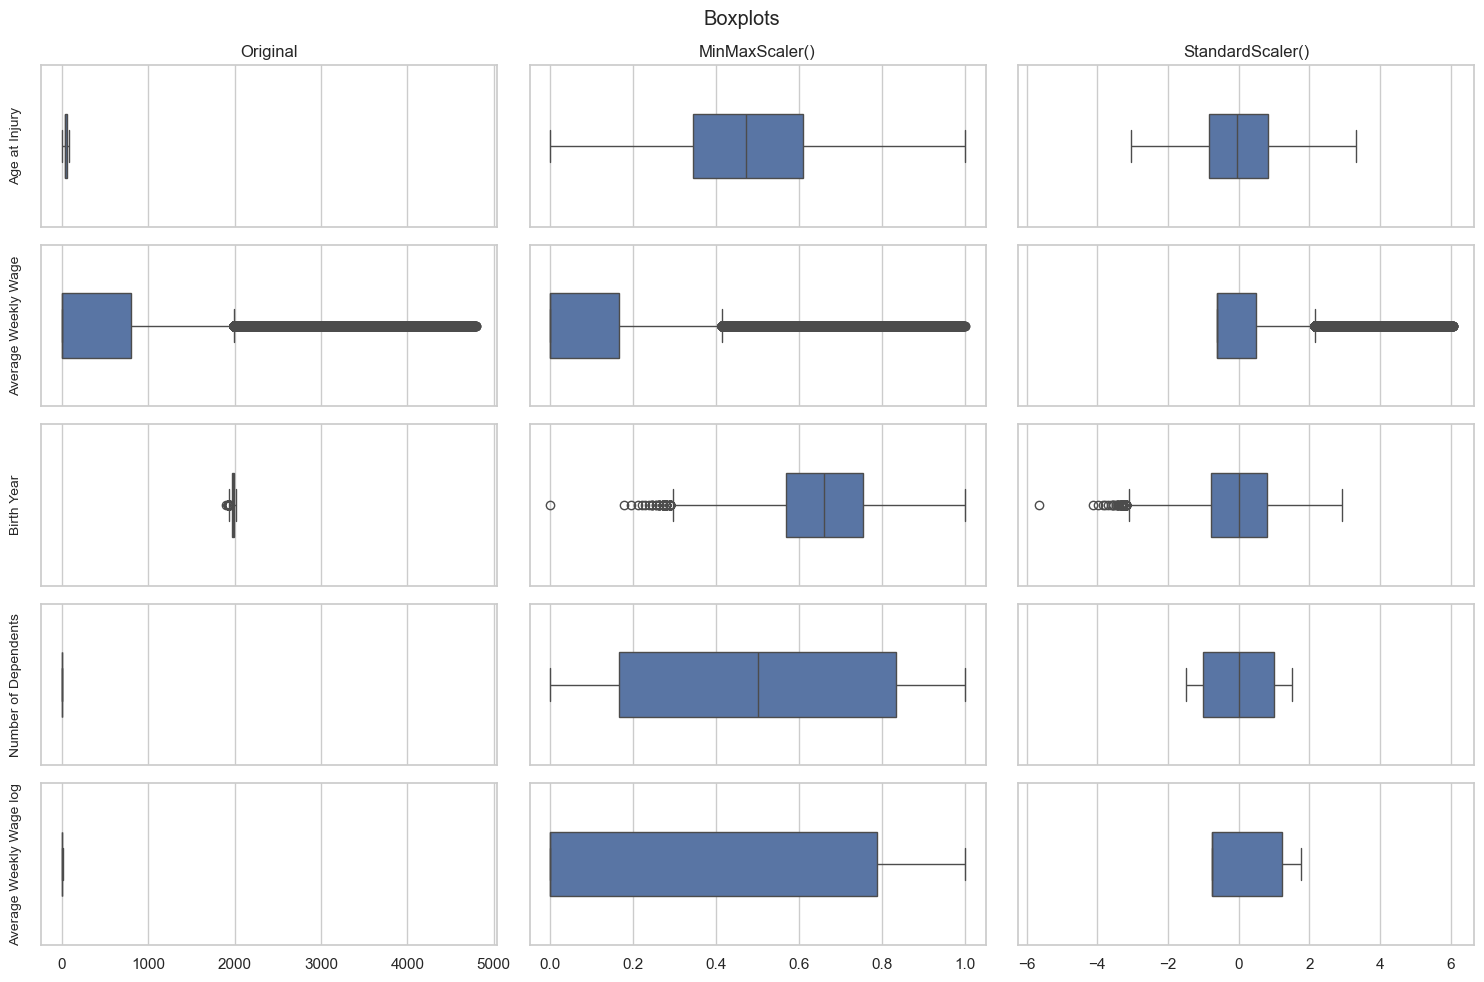

In [260]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(5,3, figsize=(15,10), tight_layout=True, sharex='col', sharey='row')

bp_feat_age = 'Age at Injury'

sns.boxplot(X_train, x=bp_feat_age, ax=axes[0][0], width=.4)
axes[0][0].set_title('Original')
axes[0][0].set_ylabel(bp_feat_age, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_age, ax=axes[0][1], width=.4)
axes[0][1].set_title('MinMaxScaler()')

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_age, ax=axes[0][2], width=.4)
axes[0][2].set_title('StandardScaler()')


bp_feat_aww = 'Average Weekly Wage'

sns.boxplot(X_train, x=bp_feat_aww, ax=axes[1][0], width=.4)
axes[1][0].set_ylabel(bp_feat_aww, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_aww, ax=axes[1][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_aww, ax=axes[1][2], width=.4)


bp_feat_by = 'Birth Year'

sns.boxplot(X_train, x=bp_feat_by, ax=axes[2][0], width=.4)
axes[2][0].set_ylabel(bp_feat_by, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_by, ax=axes[2][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_by, ax=axes[2][2], width=.4)


bp_feat_nd = 'Number of Dependents'

sns.boxplot(X_train, x=bp_feat_nd, ax=axes[3][0], width=.4)
axes[3][0].set_ylabel(bp_feat_nd, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_nd, ax=axes[3][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_nd, ax=axes[3][2], width=.4)

bp_feat_aww_log = 'Average Weekly Wage log'
sns.boxplot(X_train, x=bp_feat_aww_log, ax=axes[4][0], width=.4)
axes[4][0].set_ylabel(bp_feat_aww_log, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_aww_log, ax=axes[4][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_aww_log, ax=axes[4][2], width=.4)



for i in range(5):  # Loop over the rows
    for j in range(3):  # Loop over the columns
        axes[i][j].set_xlabel('')  # Remove the x-axis label

fig.suptitle('Boxplots')
plt.show()

We are going to use the MinMax Scaller, since it does not assume a normal distribution, diferently from StandartScaler.

**`Apply the MinMax Scaler for the validation and the test dataset`**

In [261]:
#Repeating for Validation

X_val_num = X_val_encoding[metric_feats_v2]
X_val_cat = X_val_encoding[categ_feats_v2]

In [262]:
X_val_num_scaled_min_max = scaler.transform(X_val_num) 
X_val_num_scaled_min_max = pd.DataFrame(X_val_num_scaled_min_max, columns = X_val_num.columns).set_index(X_val_encoding.index) 

In [263]:
#Repeating for employees test
employees_test_num = employees_test_encoding[metric_feats_v2]
employees_test_cat = employees_test_encoding[categ_feats_v2]

In [264]:
employees_test_num_scaled_min_max = scaler.transform(employees_test_num) 
employees_test_num_scaled_min_max = pd.DataFrame(employees_test_num_scaled_min_max, columns = employees_test_num.columns).set_index(employees_test_encoding.index) 

# Data Exporting

**Training Data**

In [265]:
df_target_train_encoding.to_csv('../Data/copy_target_train.csv', index=True)
X_train_num_scaled_min_max.to_csv('../Data/copy_X_train_num.csv', index=True)
X_train_cat_min_max.to_csv('../Data/copy_X_train_cat.csv', index=True)

**Validation Data**

In [266]:
df_target_val_encoding.to_csv('../Data/copy_target_val.csv', index=True)
X_val_num_scaled_min_max.to_csv('../Data/copy_X_val_num.csv', index=True)
X_val_cat.to_csv('../Data/copy_X_val_cat.csv', index=True)

**Test Data**

In [267]:
employees_test_num_scaled_min_max.to_csv("../Data/copy_employees_test_num.csv", index=True)
employees_test_cat.to_csv("../Data/copy_employees_test_cat.csv", index=True)